In [1]:
# Question-1 : Year-wise, identify the top-selling vehicle for each manufacturer

import pandas as pd
import time

# Record the current time before execution
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by year, make, and model, then count the total sales for each group
sales_counts = df.groupby(['year', 'make', 'model']).size().reset_index(name='TotalSales')

# Display the top-selling vehicles for each manufacturer year-wise in the desired format
print("Top-selling vehicles for each manufacturer year-wise:")
print(sales_counts)

# Record the current time after execution
end_time = time.time()

# Calculate the time taken for execution
execution_time = end_time - start_time

# Print the timestamps
print("\nExecution started at:", time.ctime(start_time))
print("Execution ended at:", time.ctime(end_time))
print("Processing time:", execution_time, "seconds")

# Save the result to a CSV file
sales_counts.to_csv('Q1.csv', index=False)



Top-selling vehicles for each manufacturer year-wise:
      year       make     model  TotalSales
0     1982       Ford    Altima           2
1     1983       Ford    Altima           1
2     1984       Ford    Altima           4
3     1984  chevrolet  corvette           1
4     1985       Ford    Altima           8
...    ...        ...       ...         ...
5608  2015      Volvo       V60          83
5609  2015      Volvo      XC60          78
5610  2015      Volvo      XC70          25
5611  2015  chevrolet      capt           3
5612  2015      smart    fortwo           3

[5613 rows x 4 columns]

Execution started at: Wed Apr 24 20:21:01 2024
Execution ended at: Wed Apr 24 20:21:06 2024
Execution time: 4.463165044784546 seconds


Matplotlib is building the font cache; this may take a moment.
C:\Users\S560220\AppData\Local\Temp\ipykernel_7840\4279106703.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_selling_vehicles = df.groupby(['year', 'make']).apply(lambda x: x.loc[x['sellingprice'].idxmax()]).reset_index(drop=True)
C:\Users\S560220\AppData\Local\Temp\ipykernel_7840\4279106703.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


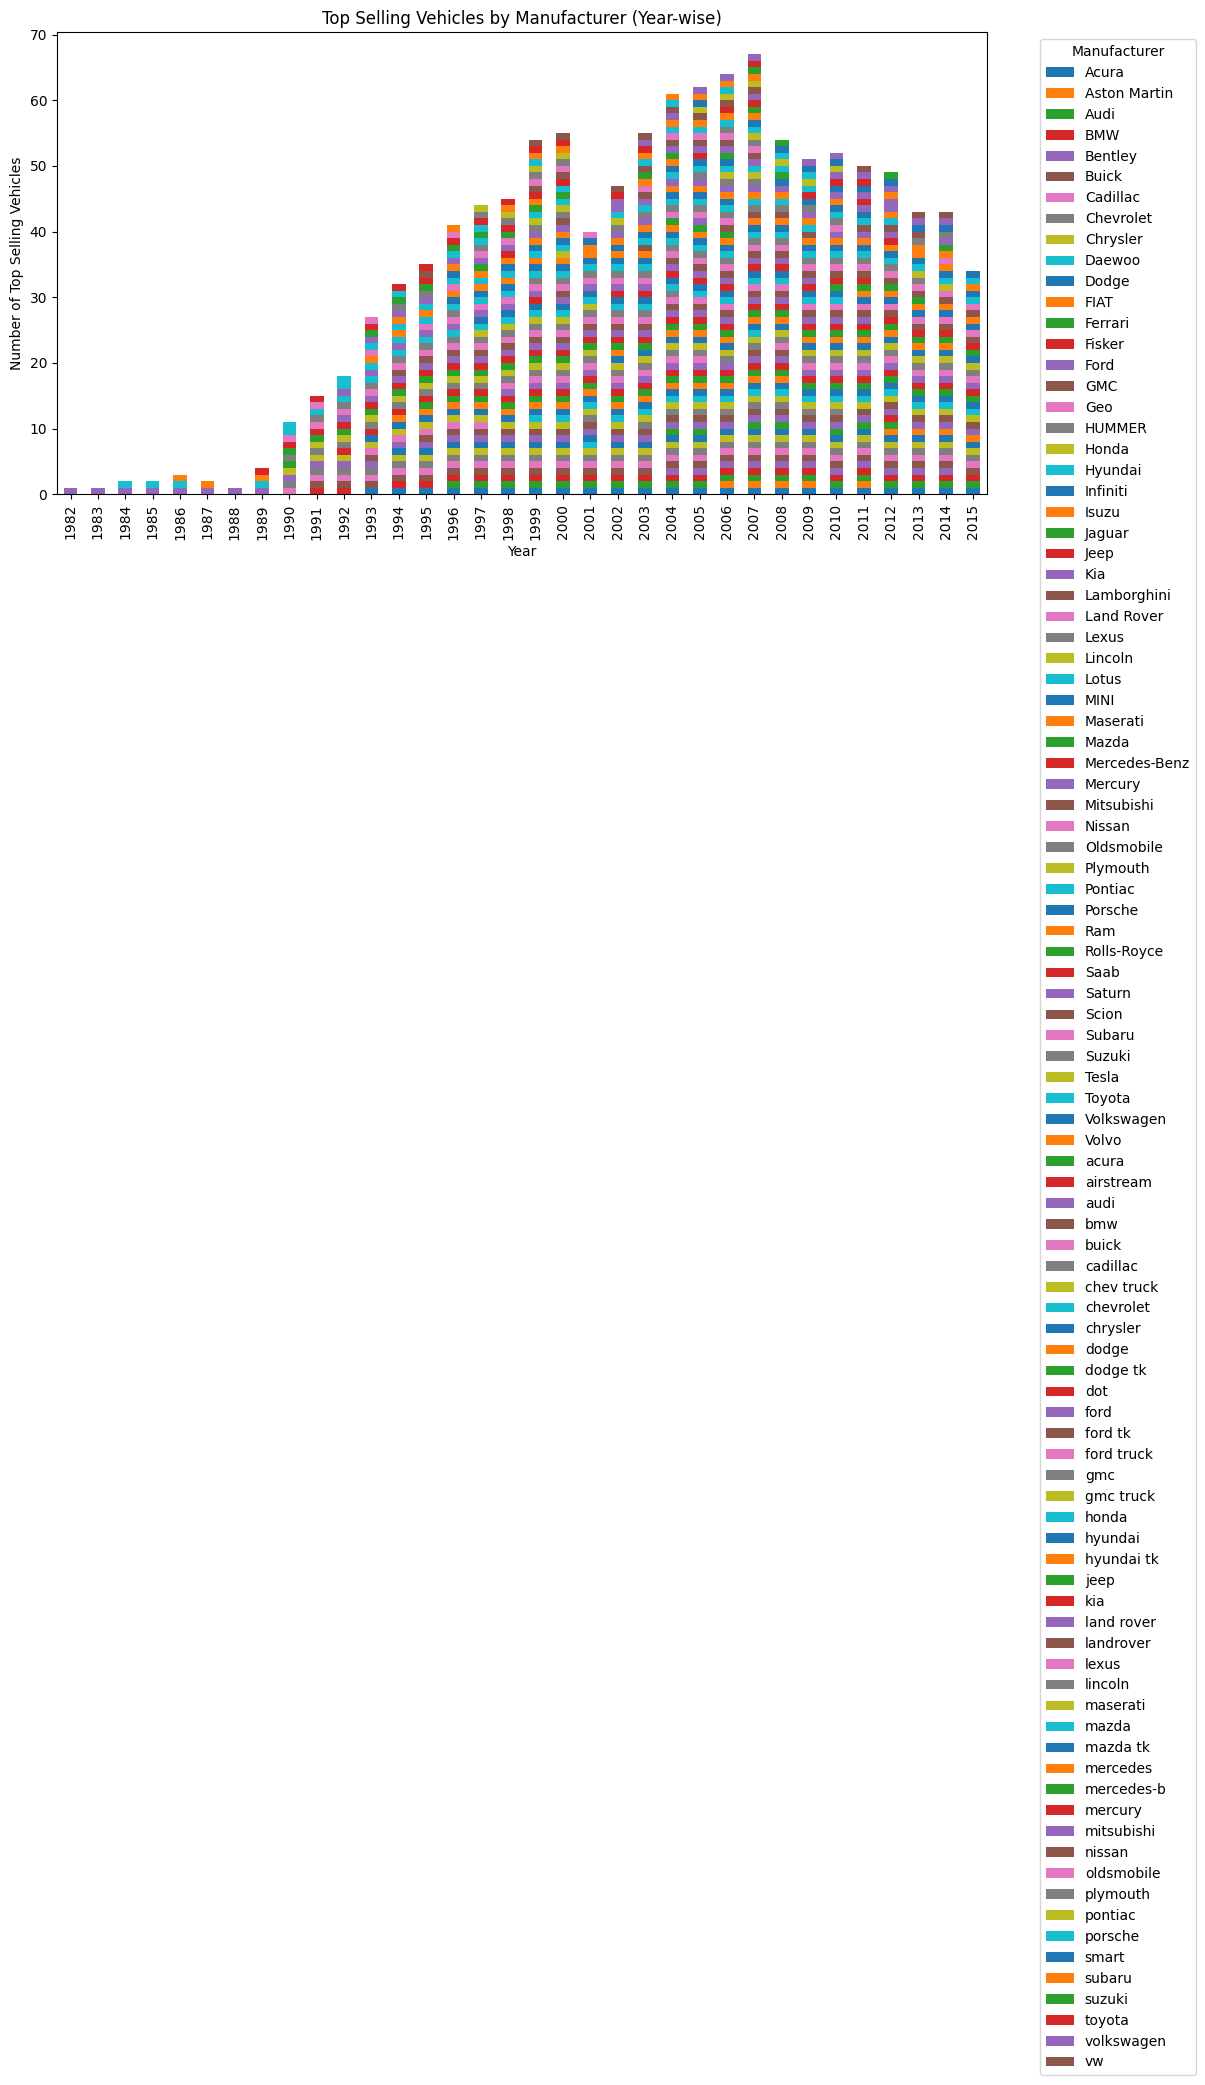

In [2]:
# Graph Code for 1st Question


import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Reset index to avoid ambiguity
top_selling_vehicles = df.groupby(['year', 'make']).apply(lambda x: x.loc[x['sellingprice'].idxmax()]).reset_index(drop=True)

# Count the number of top-selling vehicles for each manufacturer year-wise
top_selling_counts = top_selling_vehicles.groupby(['year', 'make']).size().unstack(fill_value=0)

# Plotting
top_selling_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top Selling Vehicles by Manufacturer (Year-wise)')
plt.xlabel('Year')
plt.ylabel('Number of Top Selling Vehicles')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
# Question-2: Calculate the average selling price for each car type or manufacturer

import pandas as pd
import time

# Record the start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by car type (model) and calculate the average selling price
average_price_by_model = df.groupby('model')['sellingprice'].mean()

# Group the data by manufacturer (make) and calculate the average selling price
average_price_by_manufacturer = df.groupby('make')['sellingprice'].mean()

# Record the end time
end_time = time.time()

# Calculate latency



print("Average Selling Price by Car Type (Model):")
print(average_price_by_model)

print("\nAverage Selling Price by Manufacturer (Make):")
print(average_price_by_manufacturer)
Procesing = end_time - start_time
print("Processing time: {:.4f} seconds".format(Procesing))
average_price_by_model.to_csv('Q2.csv', index=False)



Average Selling Price by Car Type (Model):
model
1            54400.000000
1 Series     19255.493827
1500         22588.608537
190-Class      708.333333
2 Series     38490.625000
                 ...     
xA            2881.034483
xB            7692.361111
xD            9256.395349
yaris         4100.000000
yukon         1100.000000
Name: sellingprice, Length: 973, dtype: float64

Average Selling Price by Manufacturer (Make):
make
Acura           14017.268260
Aston Martin    54812.000000
Audi            19915.432782
BMW             21441.895748
Bentley         74367.672414
                    ...     
subaru           3710.416667
suzuki           4810.000000
toyota           7339.105263
volkswagen       6145.833333
vw              13672.916667
Name: sellingprice, Length: 96, dtype: float64
Processing time: 5.1454 seconds


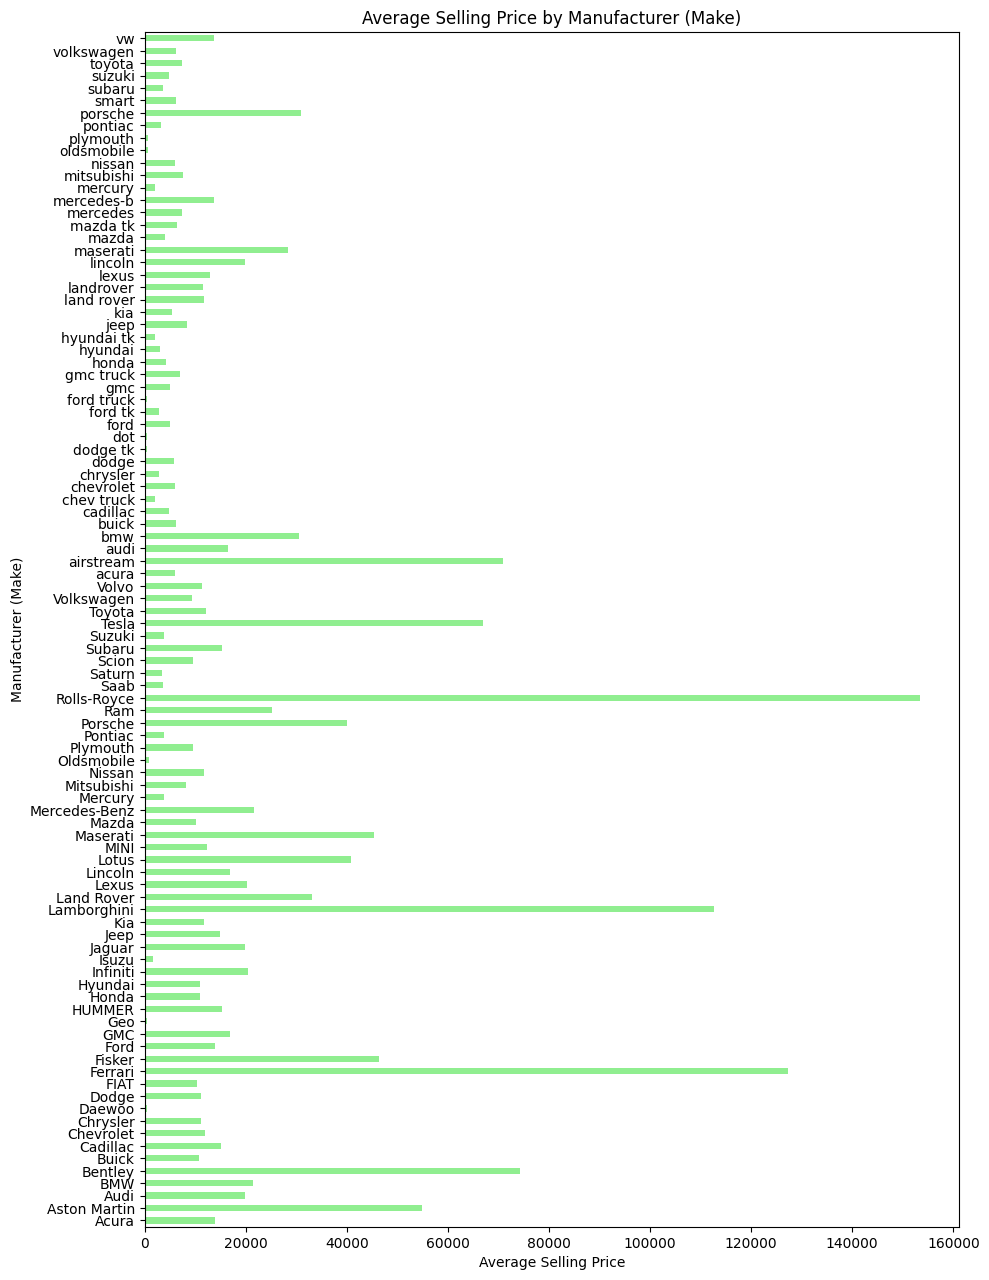

In [10]:
# Graph Code for 2nd Question

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by car type (model) and calculate the average selling price
average_price_by_model = df.groupby('model')['sellingprice'].mean()

# Group the data by manufacturer (make) and calculate the average selling price
average_price_by_manufacturer = df.groupby('make')['sellingprice'].mean()

# Plotting
plt.figure(figsize=(10, 25))

# Plotting average selling price by manufacturer (make)
plt.subplot(2, 1, 1)
average_price_by_manufacturer.plot(kind='barh', color='lightgreen')  # Use 'barh' for horizontal bar plot
plt.title('Average Selling Price by Manufacturer (Make)')
plt.xlabel('Average Selling Price')
plt.ylabel('Manufacturer (Make)')
plt.tight_layout()

plt.show()


In [11]:
# Question-3: Determine the total revenue generated for each make over the years.

import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Determine the total revenue generated for each make over the years
total_revenue_by_make_year = df.groupby(['make'])['sellingprice'].sum()

# Convert the Series to a DataFrame, reset the index, and rename the columns
total_revenue_by_make = total_revenue_by_make_year.reset_index()
total_revenue_by_make.columns = ['Make', 'TotalRevenue']

# Print the formatted DataFrame
print(total_revenue_by_make)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

total_revenue_by_make.to_csv('Q3.csv', index=False)


            Make  TotalRevenue
0          Acura    82715900.0
1   Aston Martin     1370300.0
2           Audi   116883675.0
3            BMW   444254638.0
4        Bentley     8626650.0
..           ...           ...
91        subaru      222625.0
92        suzuki       24050.0
93        toyota      697215.0
94    volkswagen      147500.0
95            vw      328150.0

[96 rows x 2 columns]
Start Time: 2024-04-24 20:29:44
End Time: 2024-04-24 20:29:48
Processing Time: 4.183418035507202 seconds


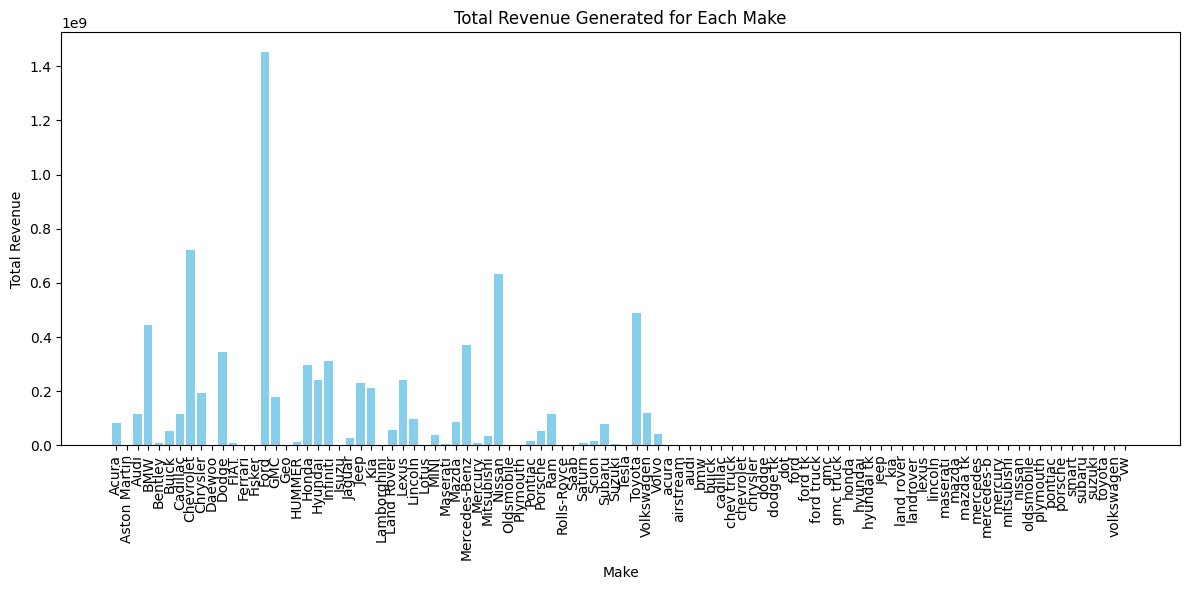

In [12]:
# Graph Code for 3rd Question

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Determine the total revenue generated for each make over the years
total_revenue_by_make_year = df.groupby(['make'])['sellingprice'].sum()

# Convert the Series to a DataFrame, reset the index, and rename the columns
total_revenue_by_make = total_revenue_by_make_year.reset_index()
total_revenue_by_make.columns = ['Make', 'TotalRevenue']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(total_revenue_by_make['Make'], total_revenue_by_make['TotalRevenue'], color='skyblue')
plt.xlabel('Make')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated for Each Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
# Question-4: Count the number of vehicles each seller sells in various states.
import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by body type and count the number of vehicles sold for each body type
vehicles_sold_by_body_type = df.groupby('body')['model'].count().reset_index(name='TotalVehiclesSold')

print(vehicles_sold_by_body_type)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

vehicles_sold_by_body_type.to_csv('Q4.csv', index=False)


                  body  TotalVehiclesSold
0           Access Cab                232
1   Beetle Convertible                 52
2            CTS Coupe                129
3            CTS Wagon                 13
4          CTS-V Coupe                 28
..                 ...                ...
82         transit van                  7
83     tsx sport wagon                  8
84                 van                570
85               wagon               2499
86             xtracab                  4

[87 rows x 2 columns]
Start Time: 2024-04-24 20:30:35
End Time: 2024-04-24 20:30:40
Processing Time: 4.804032802581787 seconds


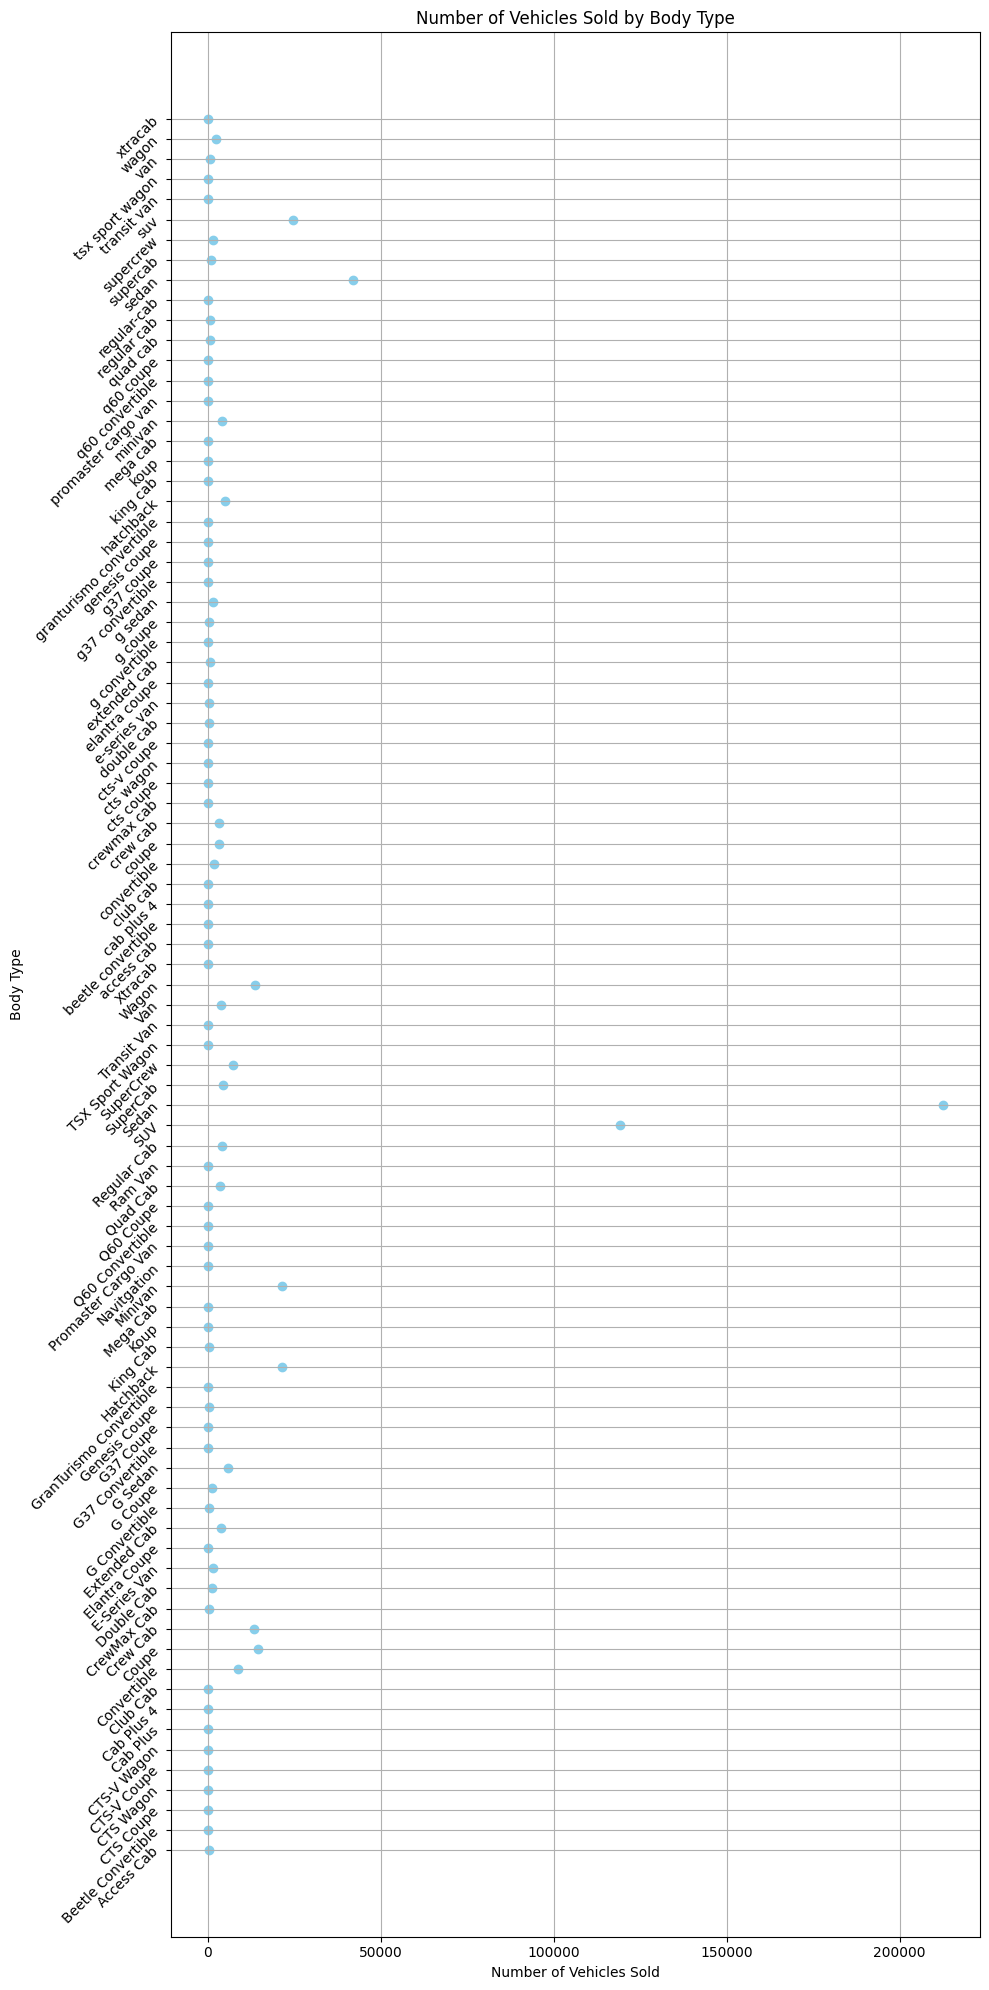

In [14]:
# Graph code for Question-4

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by body type and count the number of vehicles sold for each body type
vehicles_sold_by_body_type = df.groupby('body')['model'].count().reset_index(name='TotalVehiclesSold')

# Plotting
plt.figure(figsize=(10, 20))
plt.scatter(vehicles_sold_by_body_type['TotalVehiclesSold'], vehicles_sold_by_body_type['body'], color='skyblue')  # Reverse x and y
plt.title('Number of Vehicles Sold by Body Type')
plt.xlabel('Number of Vehicles Sold')
plt.ylabel('Body Type')
plt.yticks(rotation=45, ha='right')  # Rotate y-axis labels
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Question-5: Average Odometer Reading by Vehicle Make and Year.

import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by vehicle make and calculate the average odometer reading
average_odometer_by_make = df.groupby('make')['odometer'].mean()

# Convert the Series to a DataFrame, reset the index, and rename the columns
average_odometer_by_make_df = average_odometer_by_make.reset_index()
average_odometer_by_make_df.columns = ['Make', 'AverageOdometer']

# Print the formatted DataFrame
print("Average Odometer Reading by Vehicle Make:")
print(average_odometer_by_make_df)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

# Write the output to a CSV file
average_odometer_by_make_df.to_csv('Q5.csv', index=False)



Average Odometer Reading by Vehicle Make:
            Make  AverageOdometer
0          Acura     85829.219285
1   Aston Martin     26603.640000
2           Audi     66040.140913
3            BMW     64298.103096
4        Bentley     39239.698276
..           ...              ...
91        subaru    134812.600000
92        suzuki     80901.400000
93        toyota    145414.336842
94    volkswagen    103235.083333
95            vw     67813.583333

[96 rows x 2 columns]
Start Time: 2024-04-24 20:36:17
End Time: 2024-04-24 20:36:23
Processing Time: 5.734189033508301 seconds


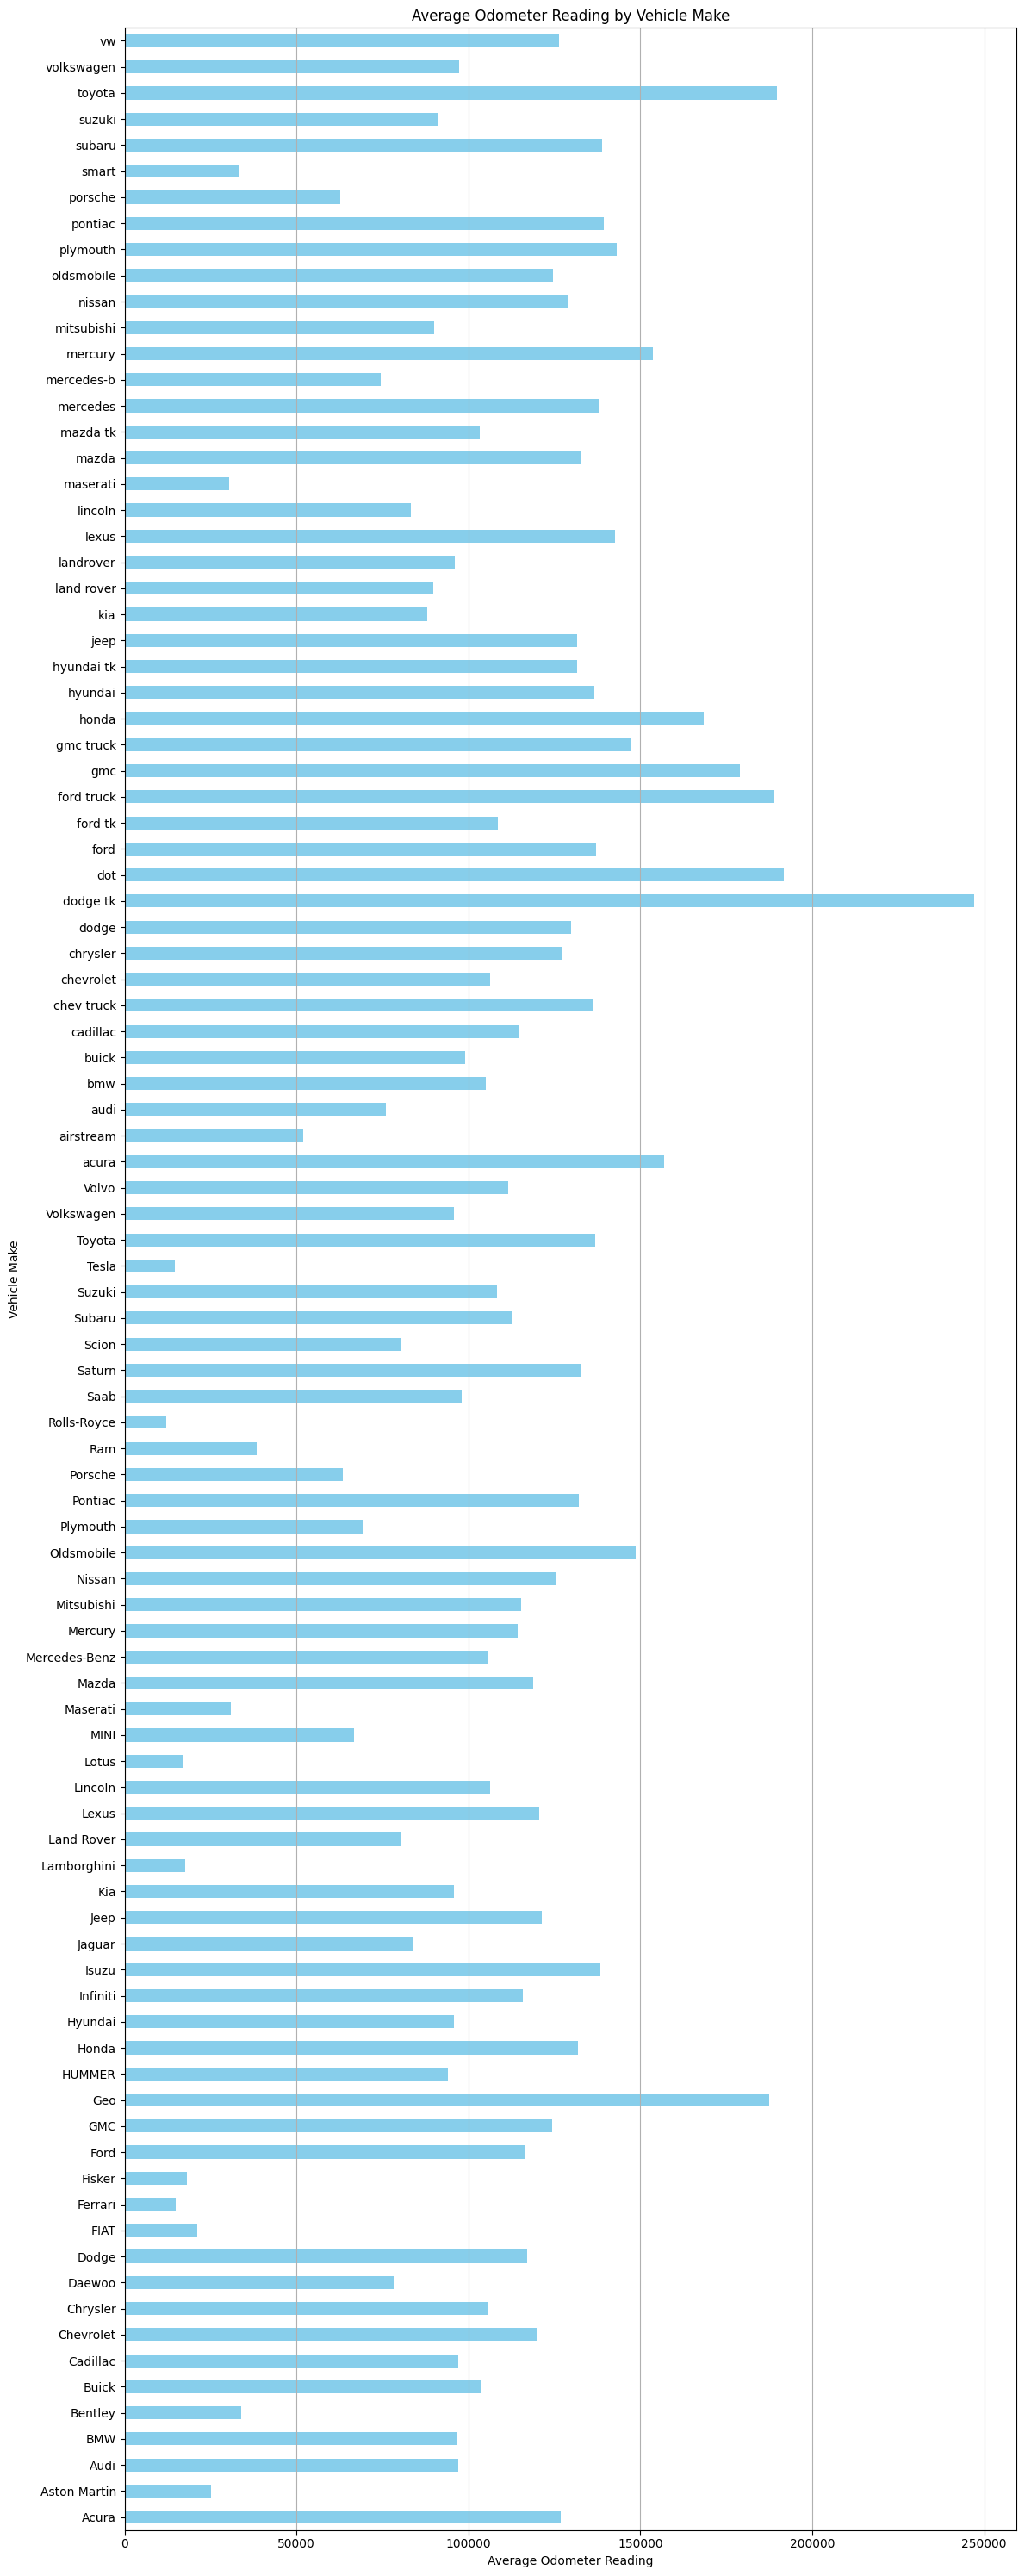

In [16]:
# Graph code for Question-5

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by vehicle make and year, then calculate the average odometer reading
average_odometer_by_make_year = df.groupby(['make', 'year'])['odometer'].mean()

# Convert the Series to a DataFrame, reset the index
average_odometer_by_make_year_df = average_odometer_by_make_year.reset_index()

# Aggregate the average odometer readings by vehicle make
average_odometer_by_make = average_odometer_by_make_year_df.groupby('make')['odometer'].mean()

# Plotting
plt.figure(figsize=(12, 30))
average_odometer_by_make.plot(kind='barh', color='skyblue')  # Change kind to 'barh' for horizontal bar plot
plt.title('Average Odometer Reading by Vehicle Make')
plt.xlabel('Average Odometer Reading')
plt.ylabel('Vehicle Make')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



In [21]:
# Question-6: Top Selling models for each make/manufacturer

import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by make and model, then count the total sales for each group
top_selling_models = df.groupby(['make', 'model']).size().reset_index(name='TotalSales')

# Sort the data by make and total sales in descending order
top_selling_models = top_selling_models.sort_values(by=['make', 'TotalSales'], ascending=[True, False])

# Print the formatted DataFrame
print('+------------+---------------+----------+')
print('|        Make|          Model|TotalSales|')
print('+------------+---------------+----------+')

for index, row in top_selling_models.iterrows():
    print('|{:12}|{:15}|{:10}|'.format(row['make'], row['model'], row['TotalSales']))

print('+------------+---------------+----------+')

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")
top_selling_models.to_csv('Q6.csv', index=False)


+------------+---------------+----------+
|        Make|          Model|TotalSales|
+------------+---------------+----------+
|Acura       |TL             |      2135|
|Acura       |MDX            |      1581|
|Acura       |TSX            |      1119|
|Acura       |RDX            |       420|
|Acura       |RSX            |       151|
|Acura       |ILX            |       140|
|Acura       |RL             |       108|
|Acura       |CL             |        97|
|Acura       |Integra        |        44|
|Acura       |ZDX            |        39|
|Acura       |TSX Sport Wagon|        36|
|Acura       |RLX            |        17|
|Acura       |Legend         |         9|
|Acura       |mdx            |         4|
|Acura       |TLX            |         1|
|Aston Martin|V8 Vantage     |        17|
|Aston Martin|DB9            |         6|
|Aston Martin|Rapide         |         2|
|Audi        |A4             |      2261|
|Audi        |A6             |       831|
|Audi        |Q5             |    

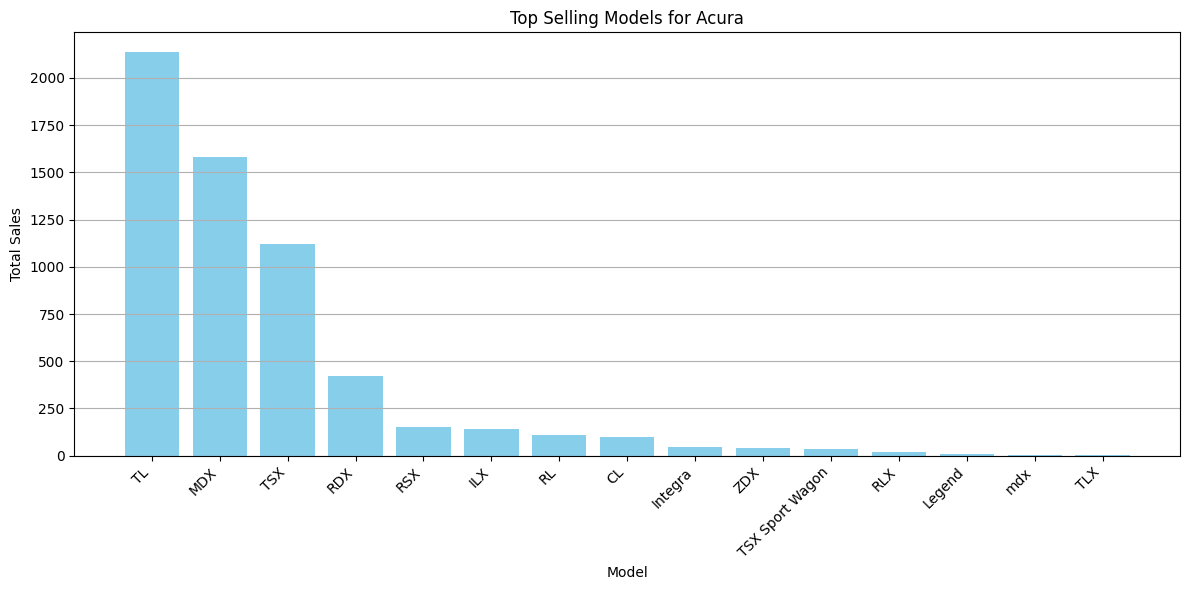

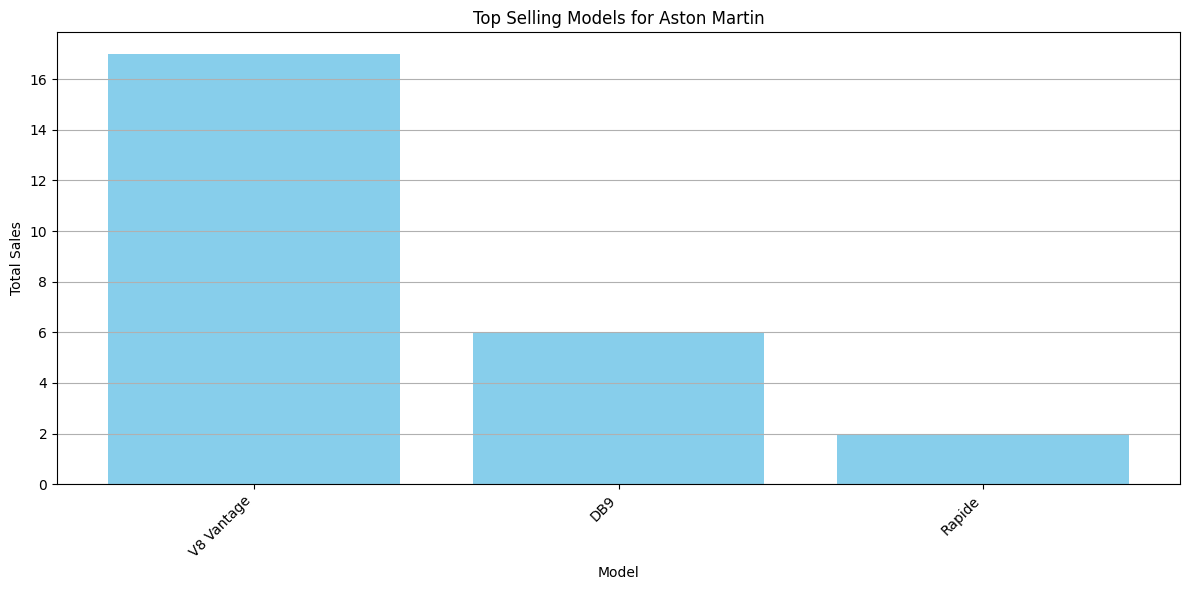

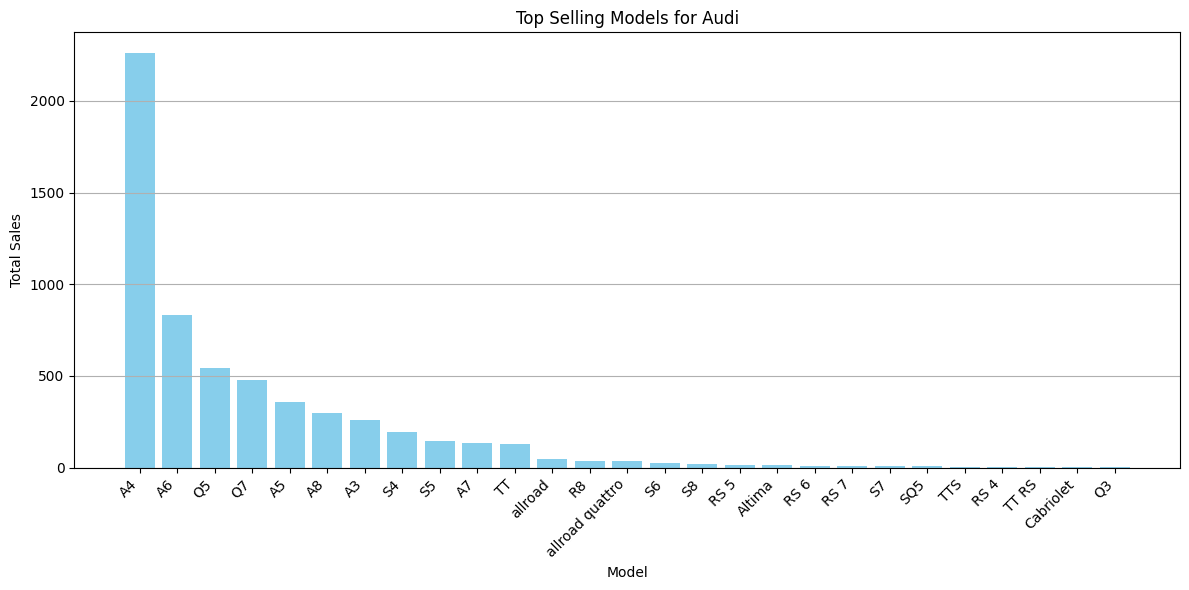

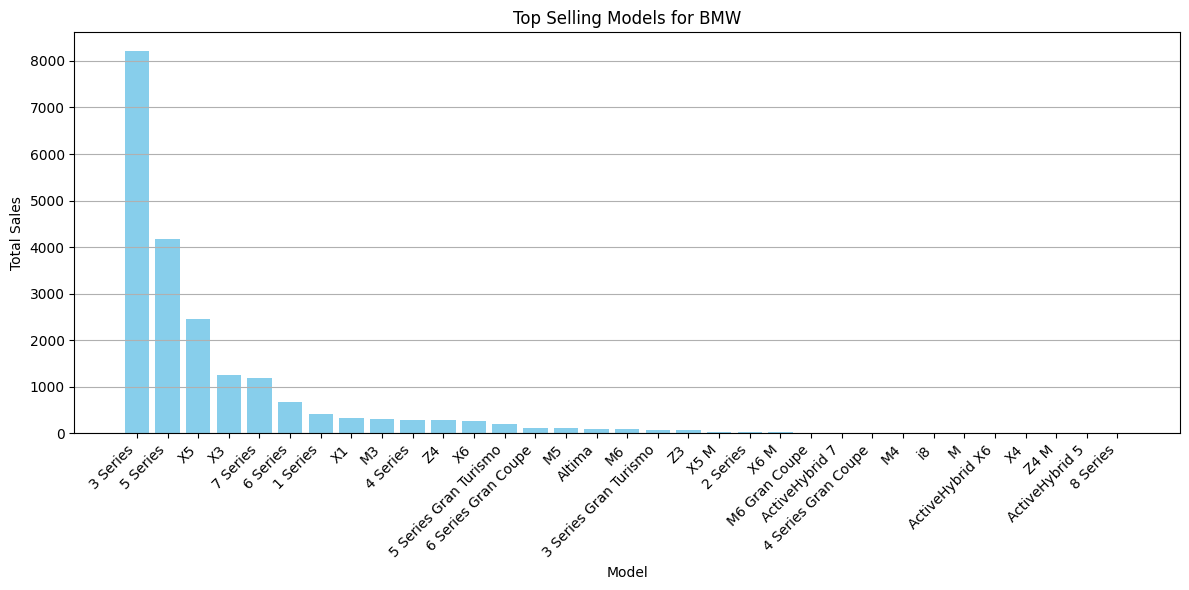

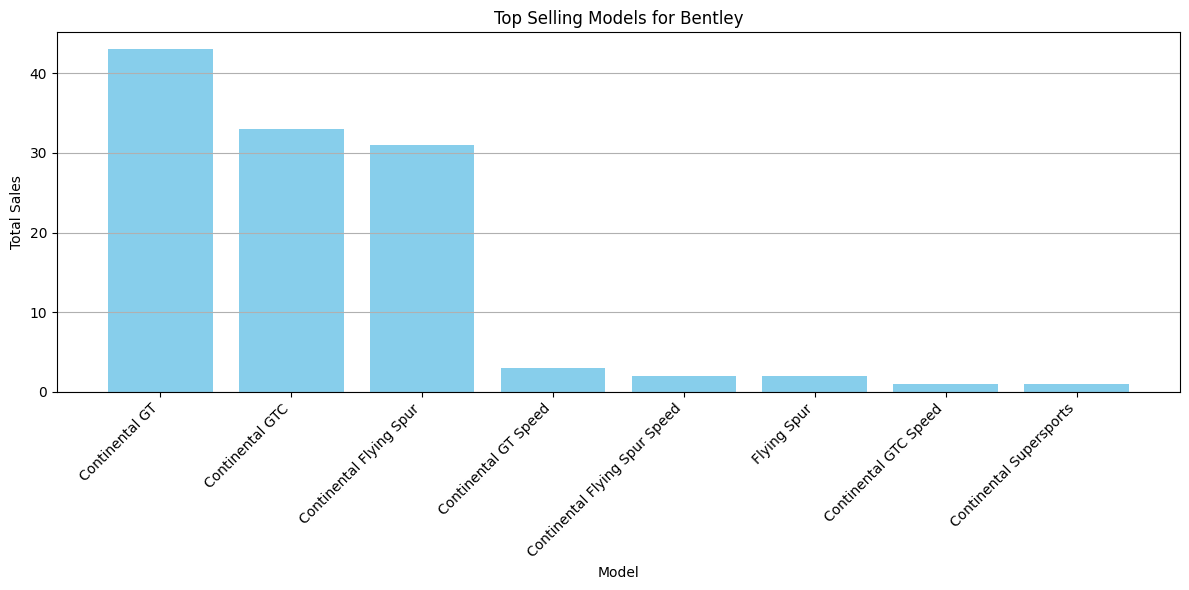

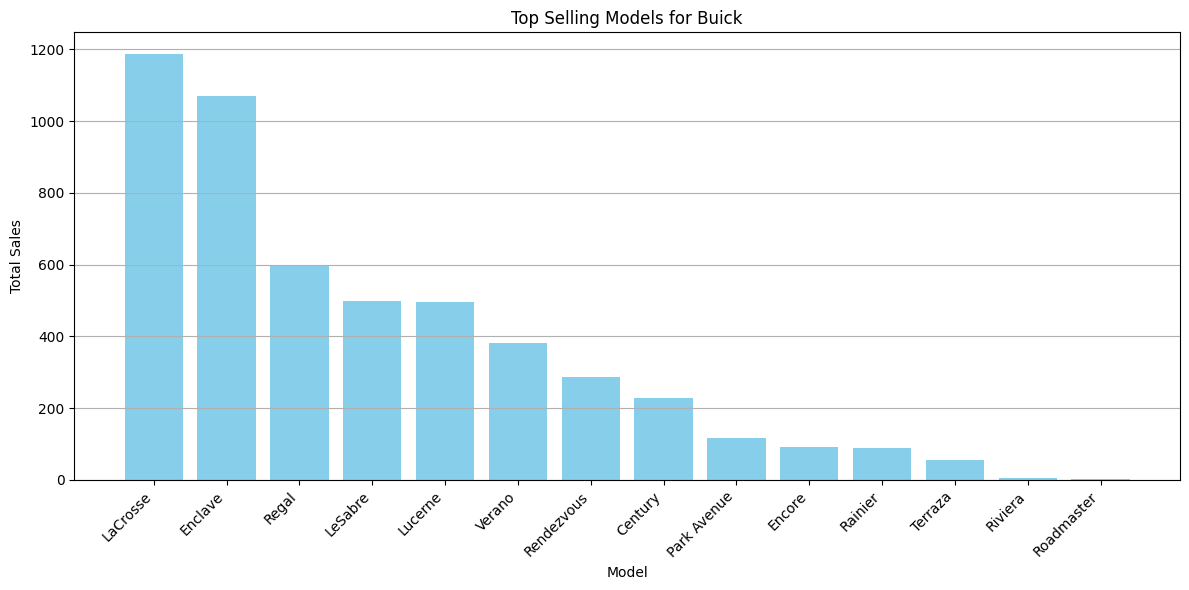

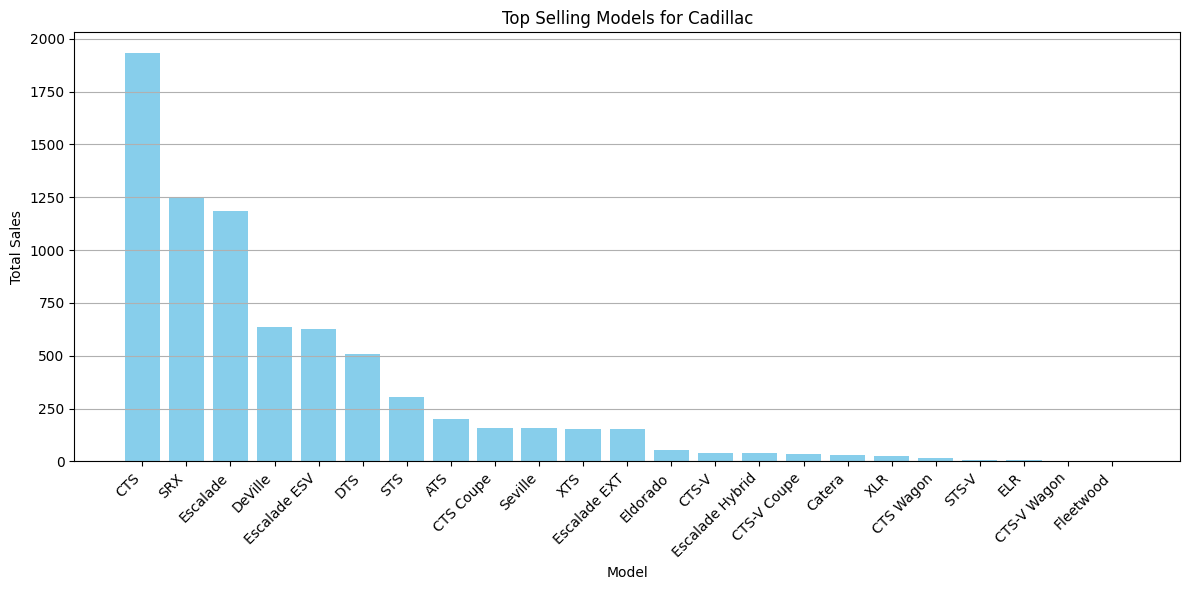

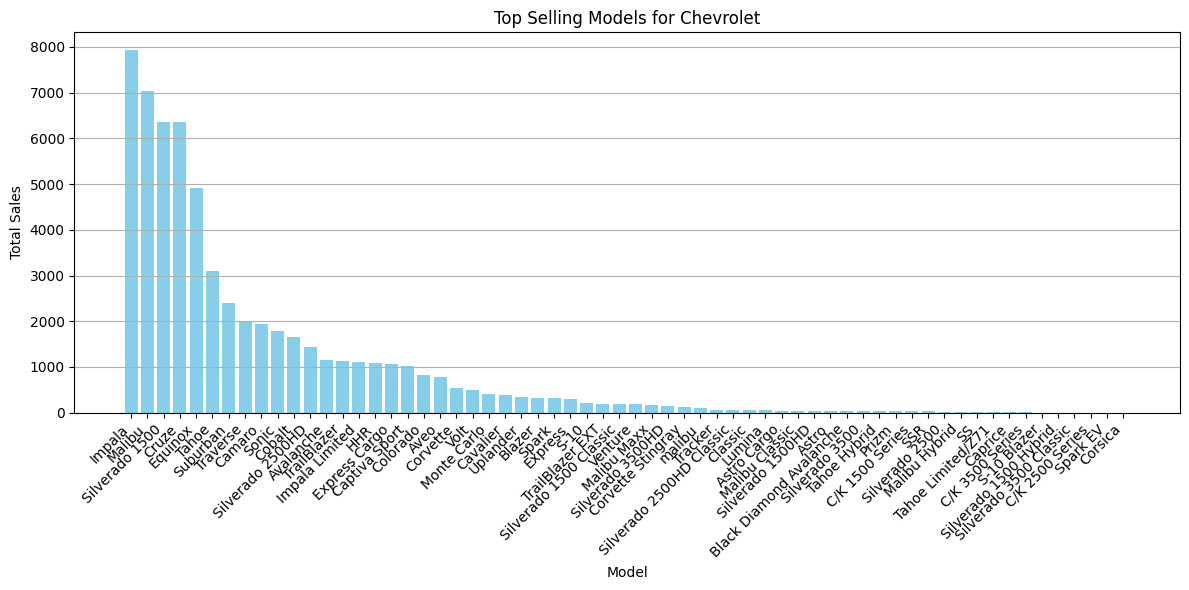

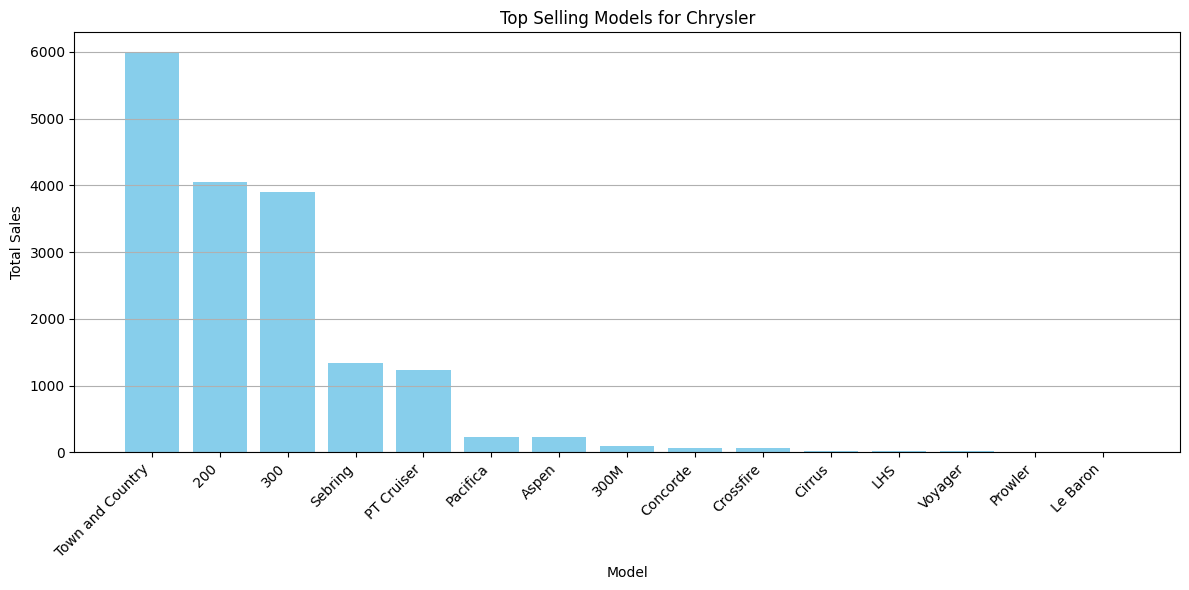

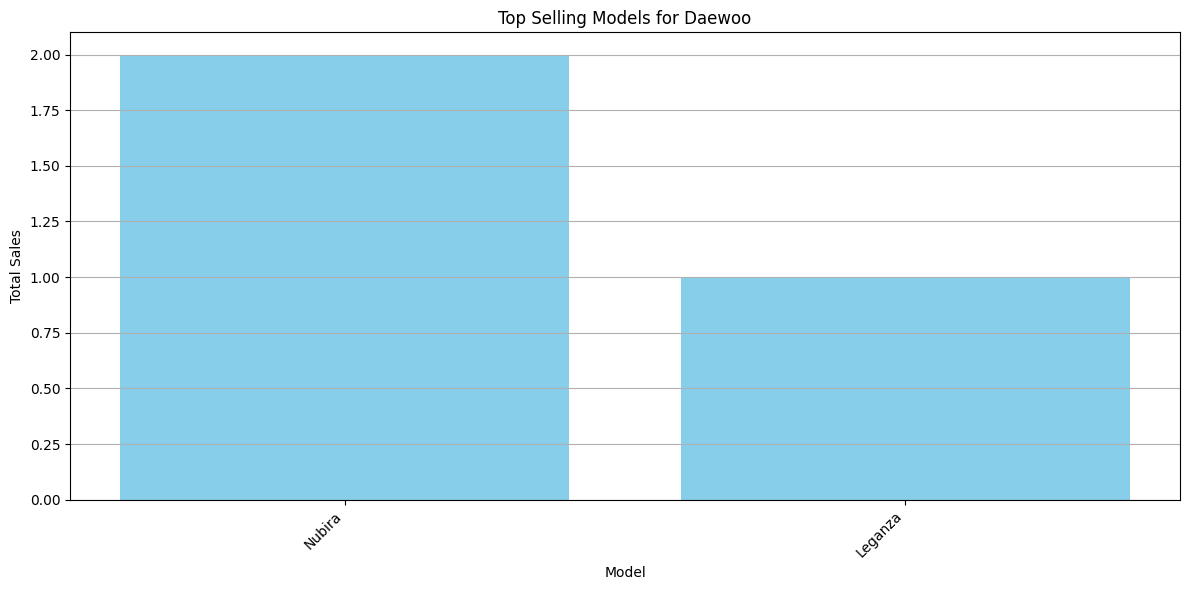

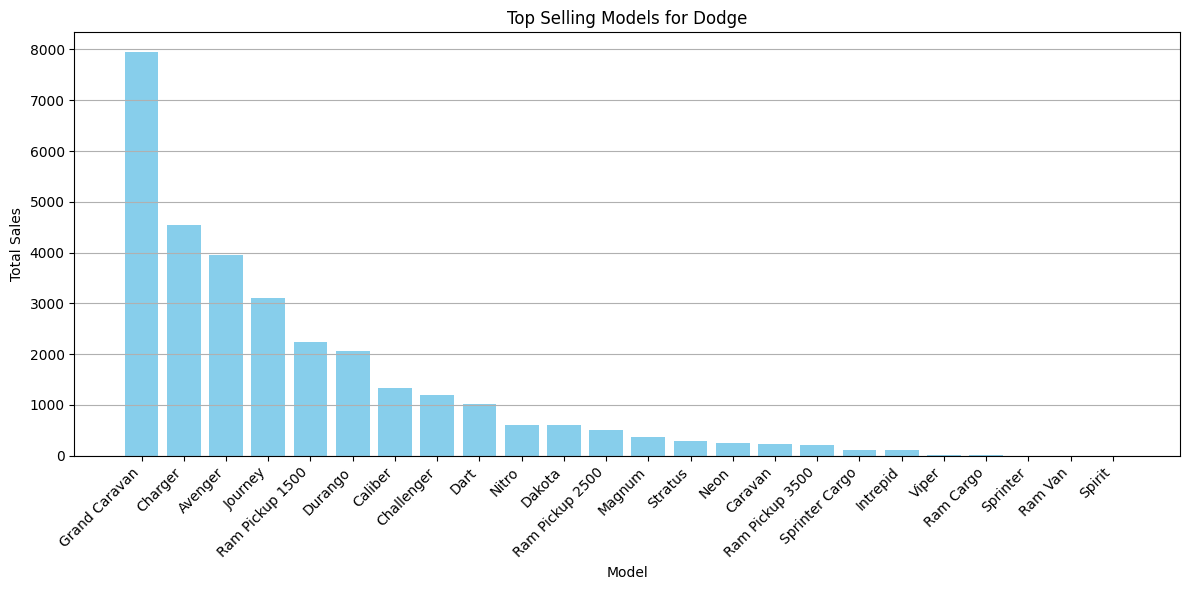

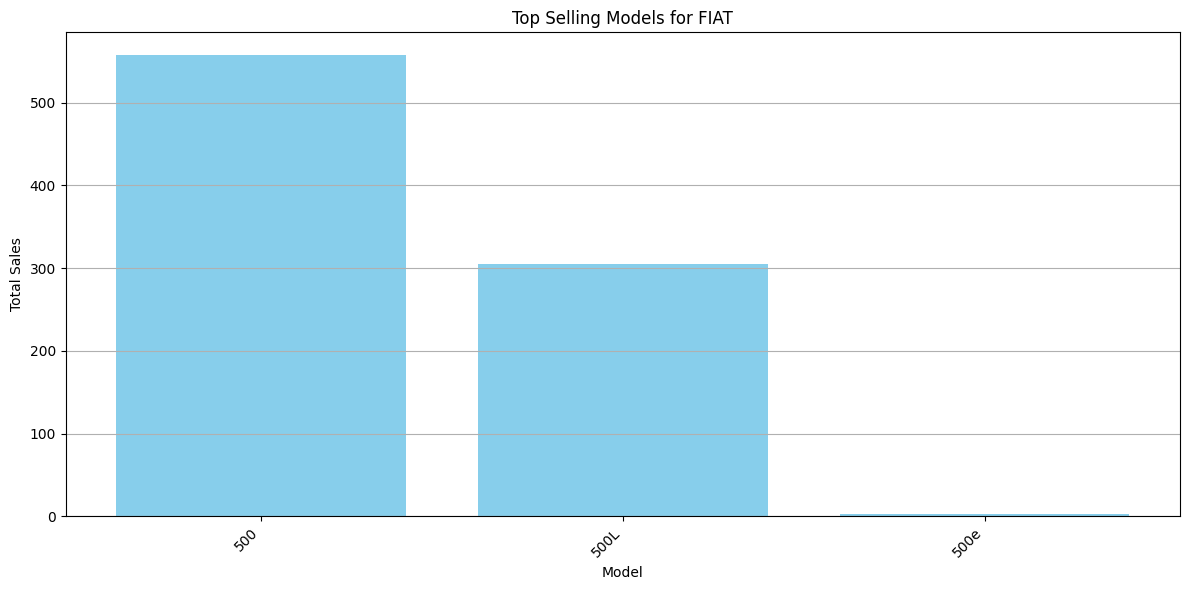

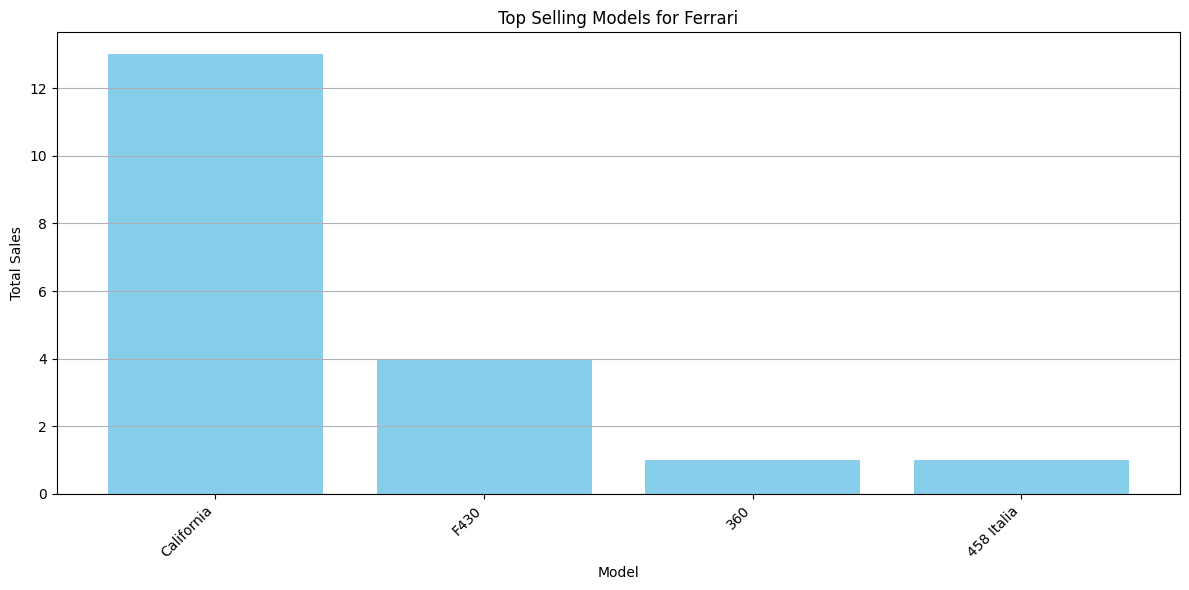

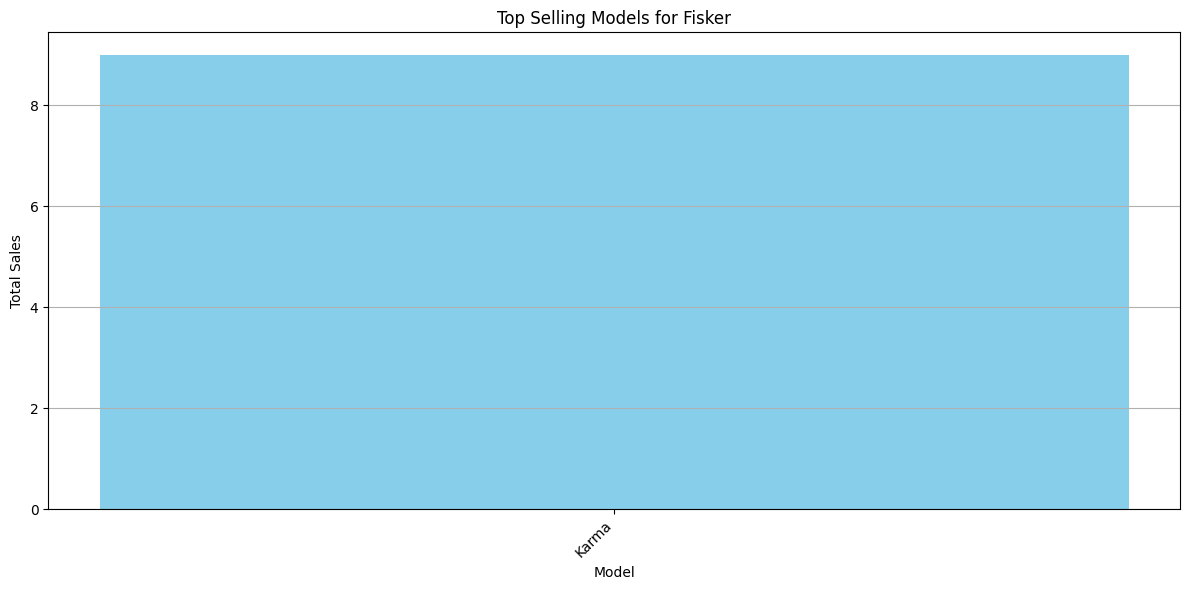

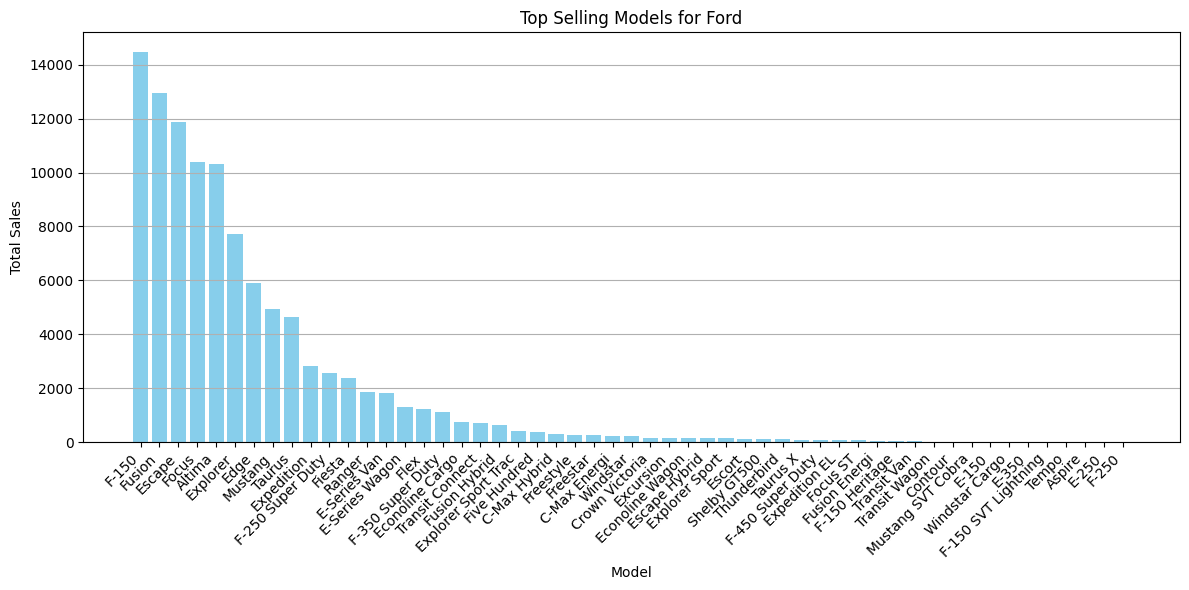

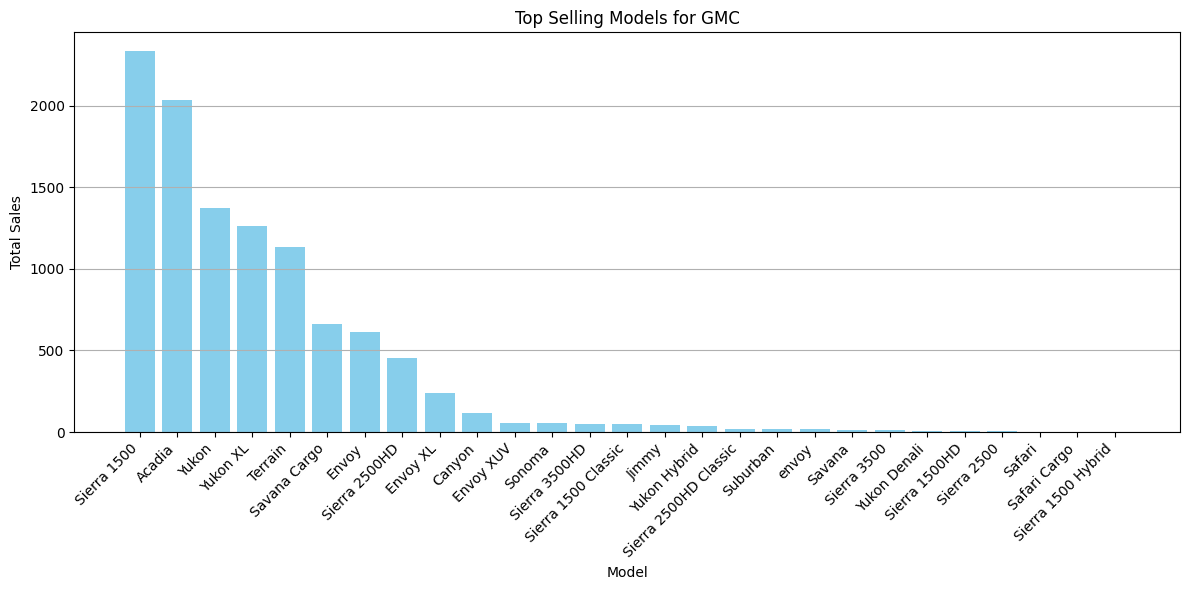

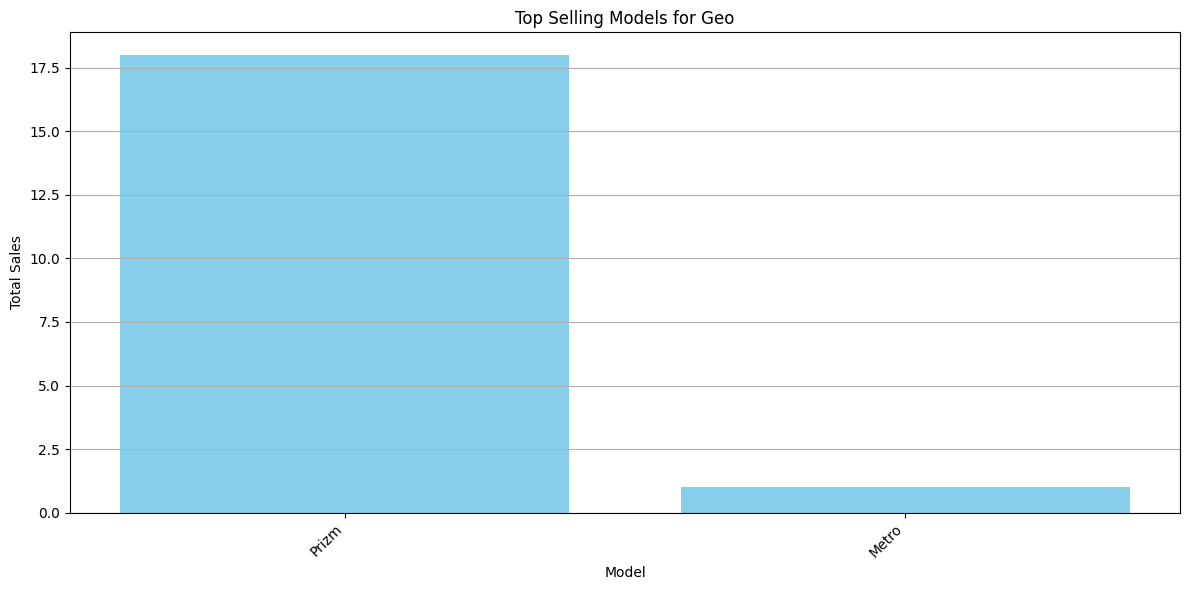

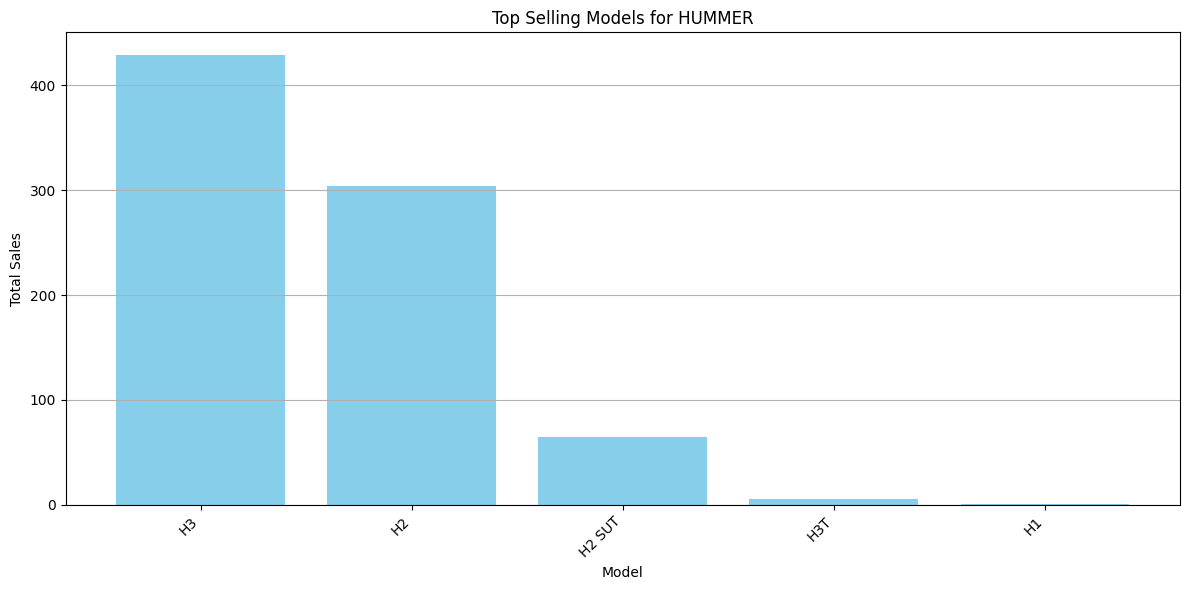

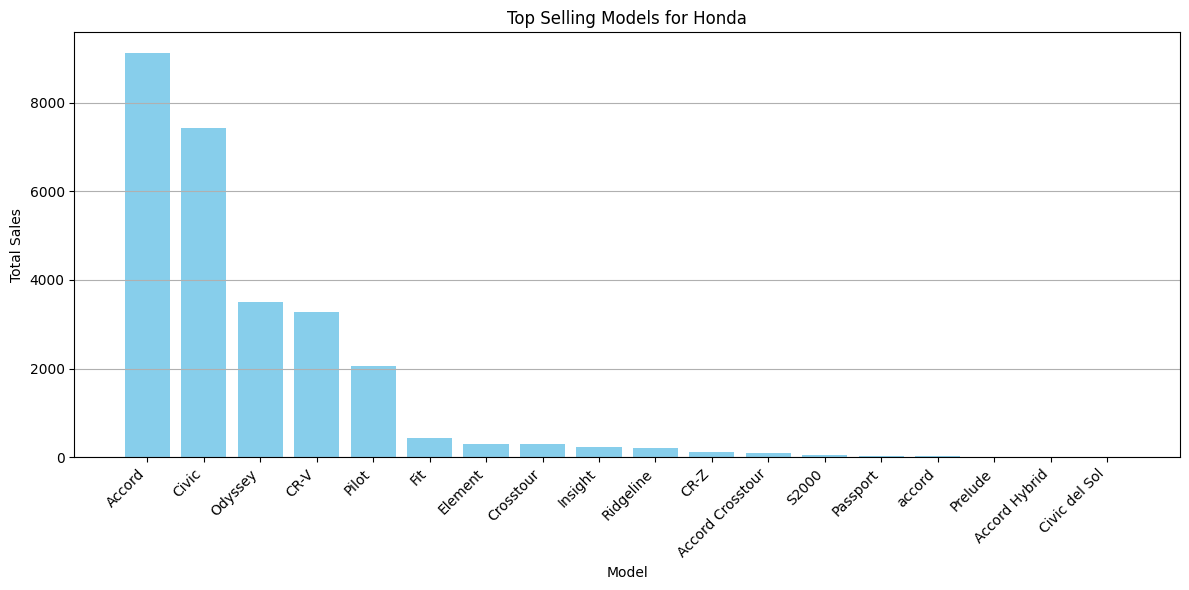

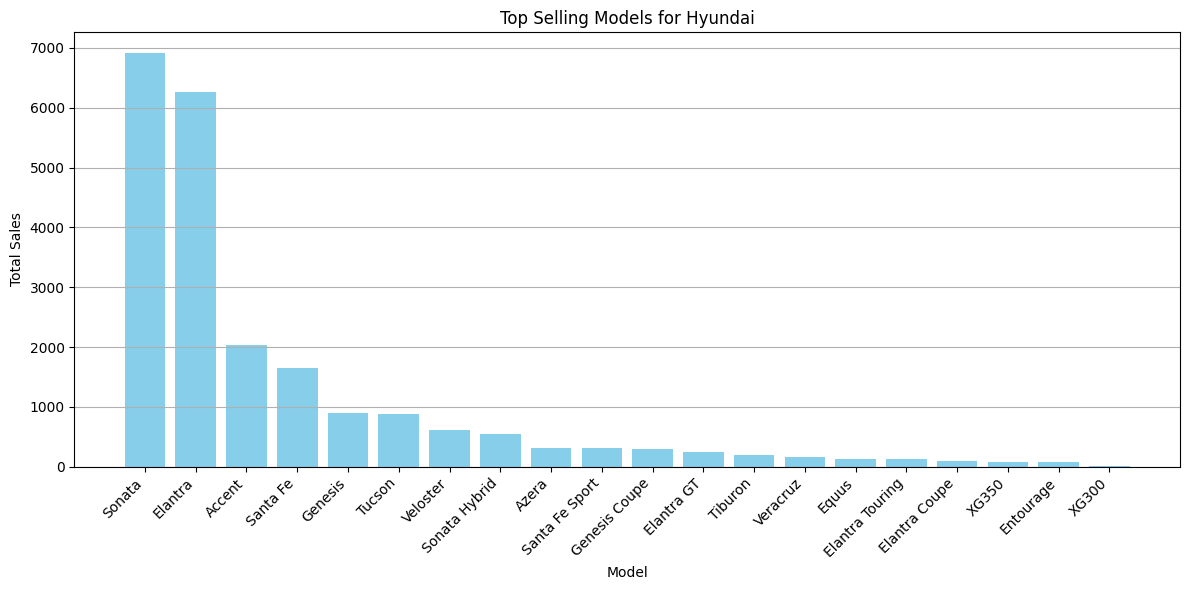

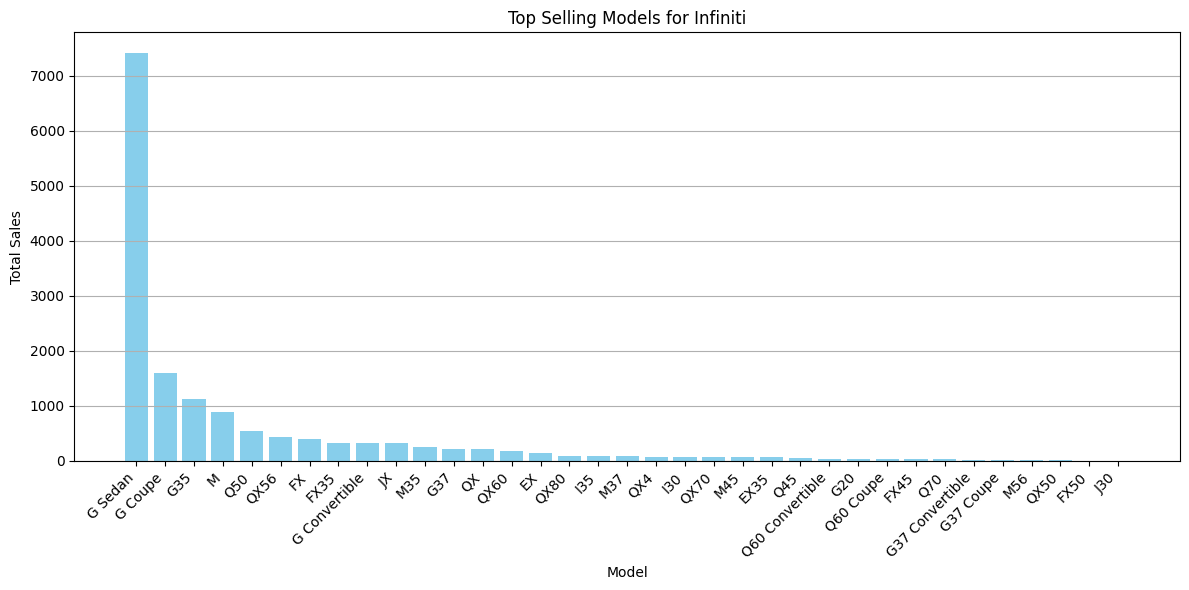

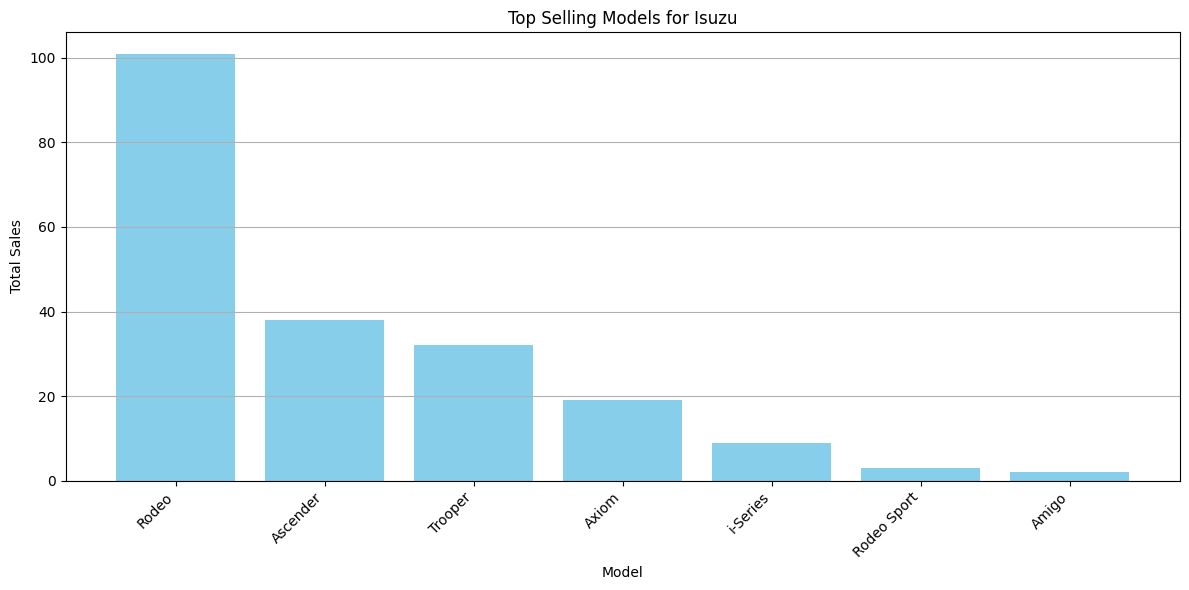

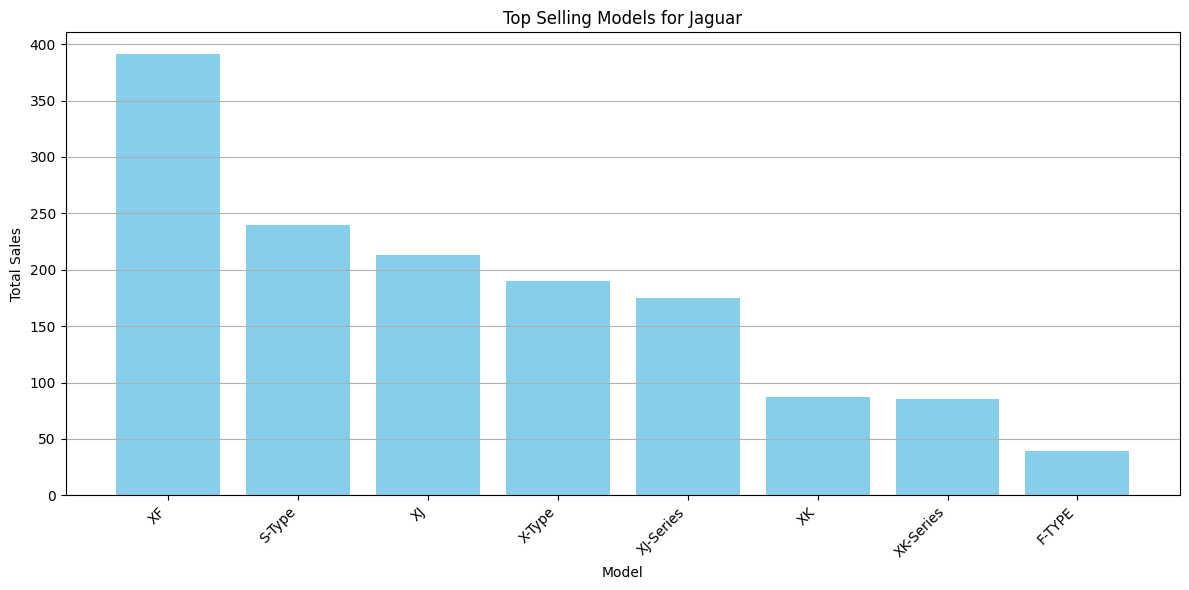

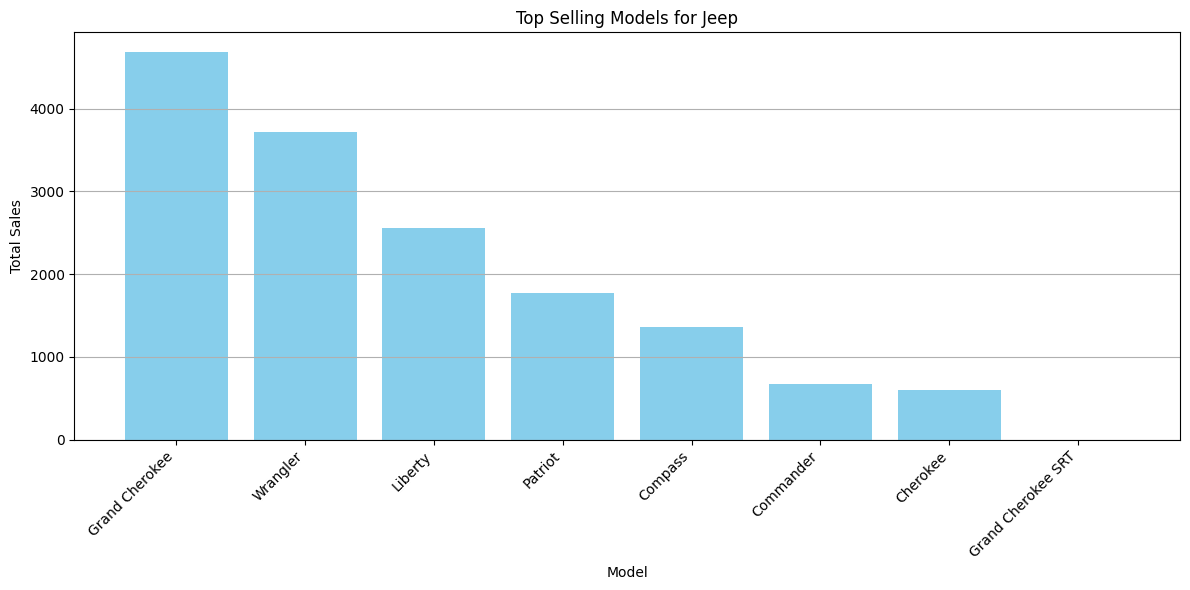

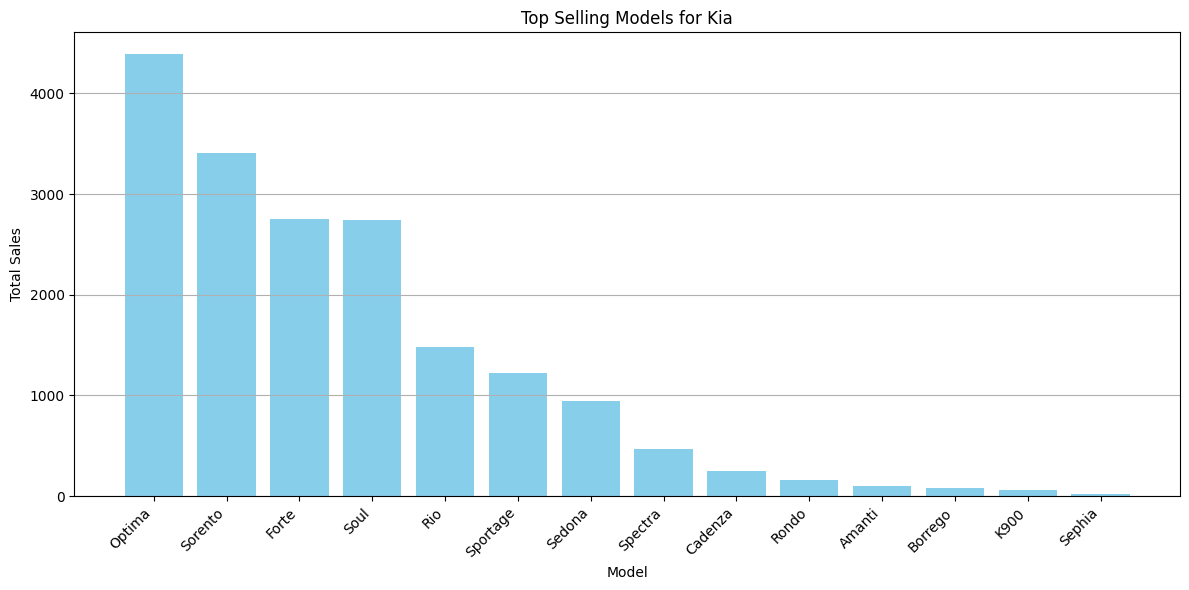

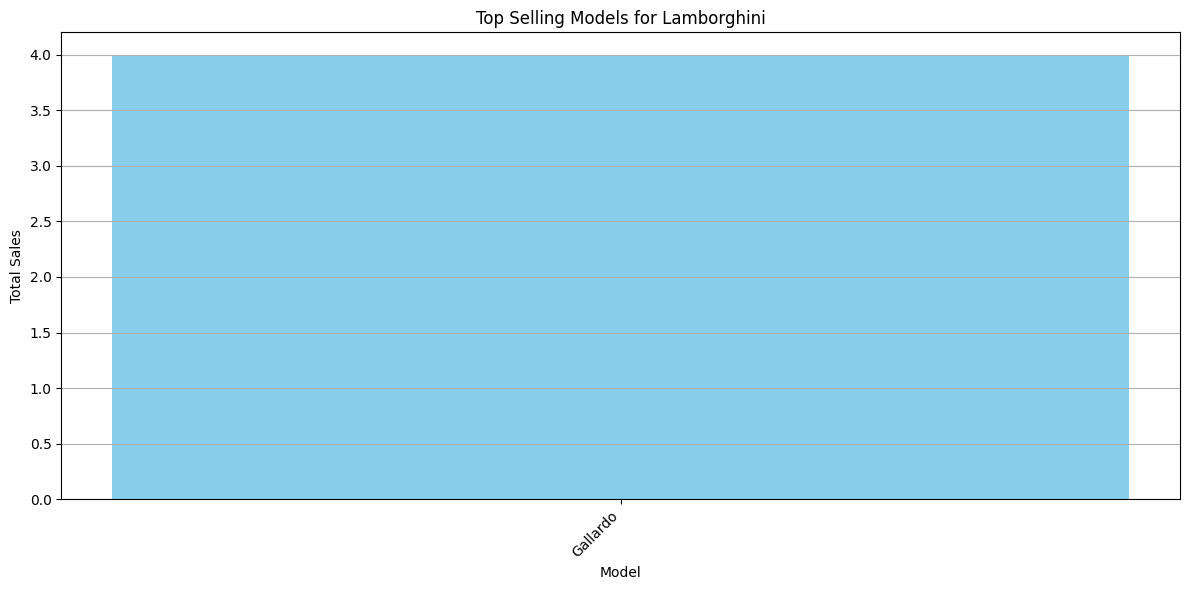

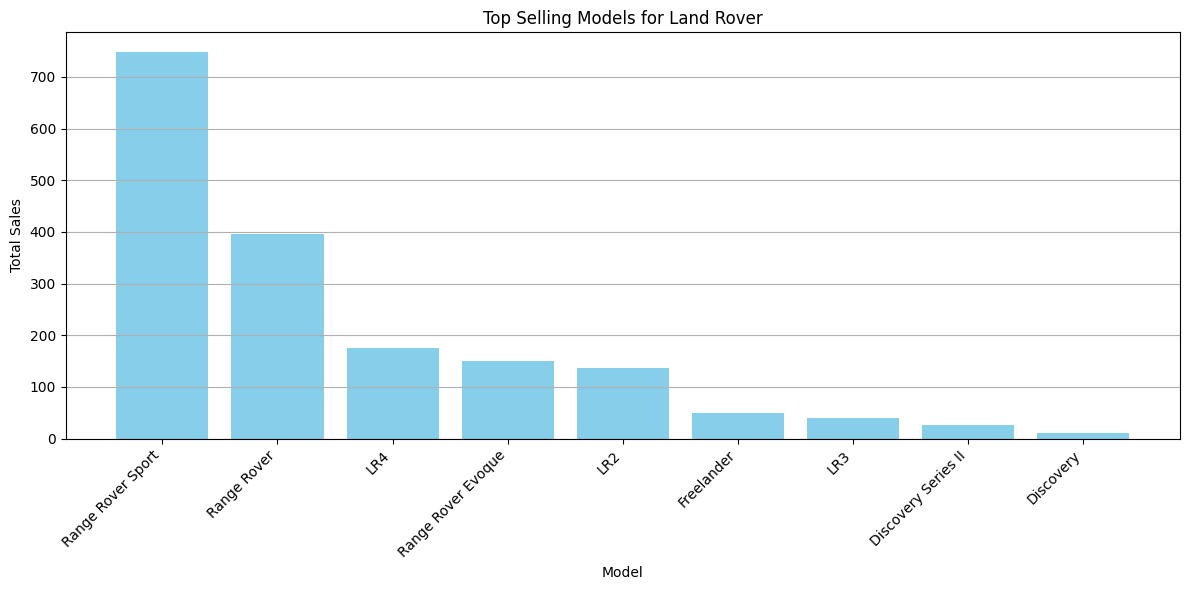

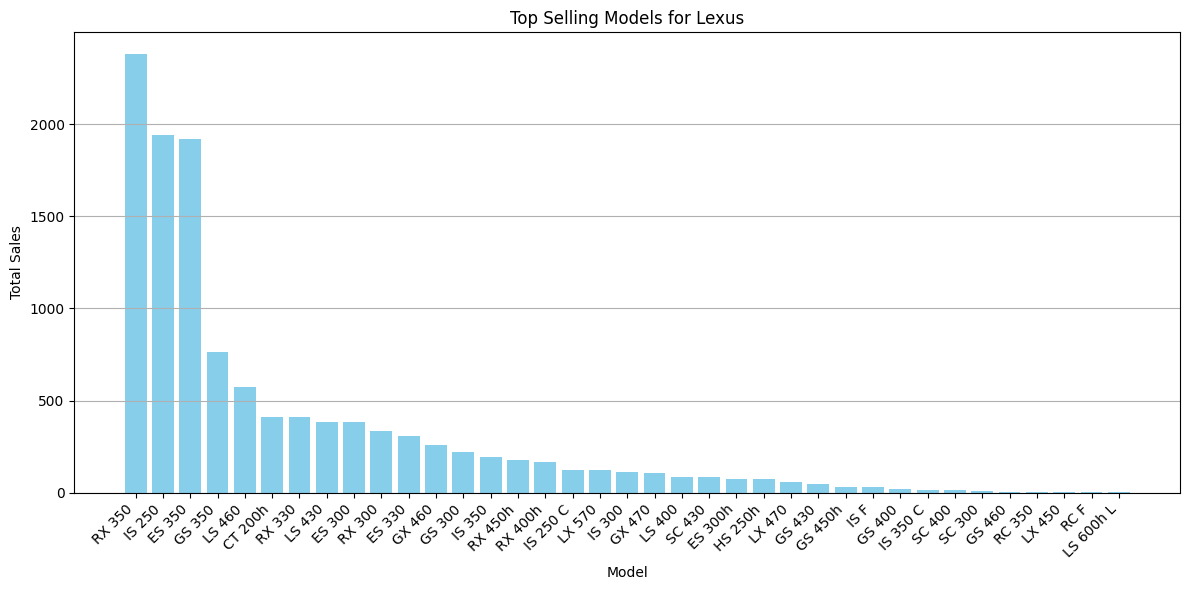

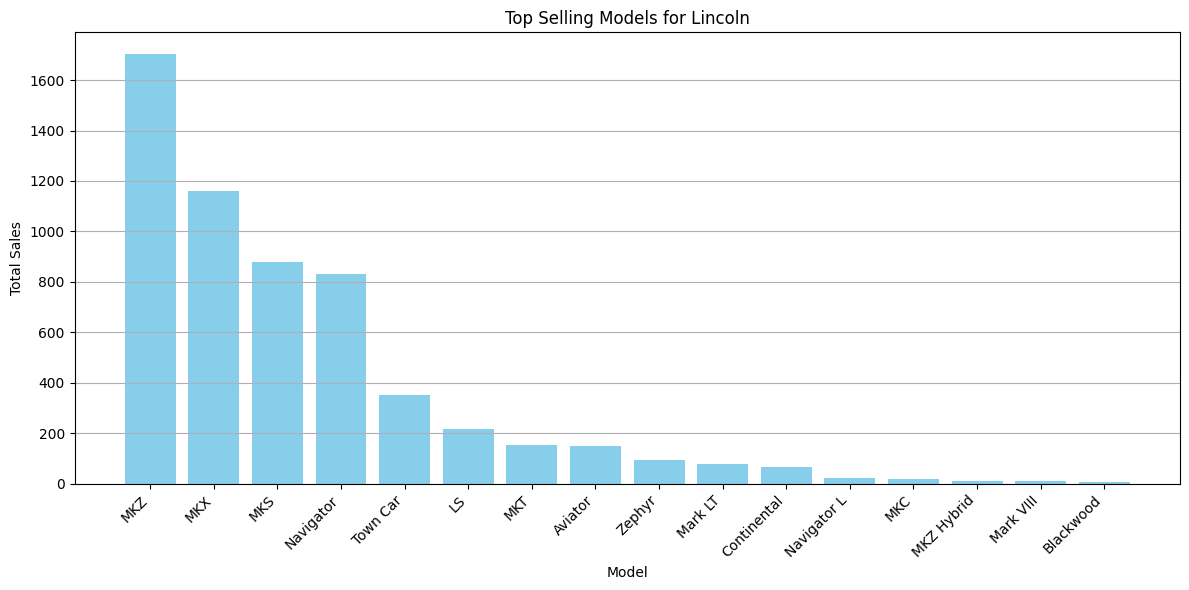

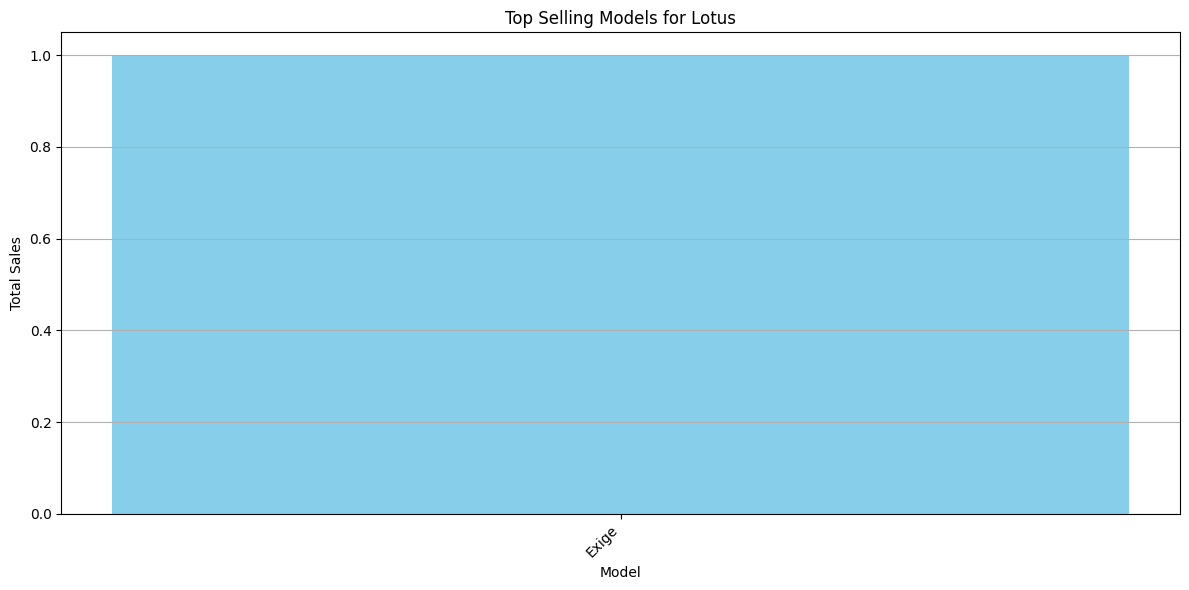

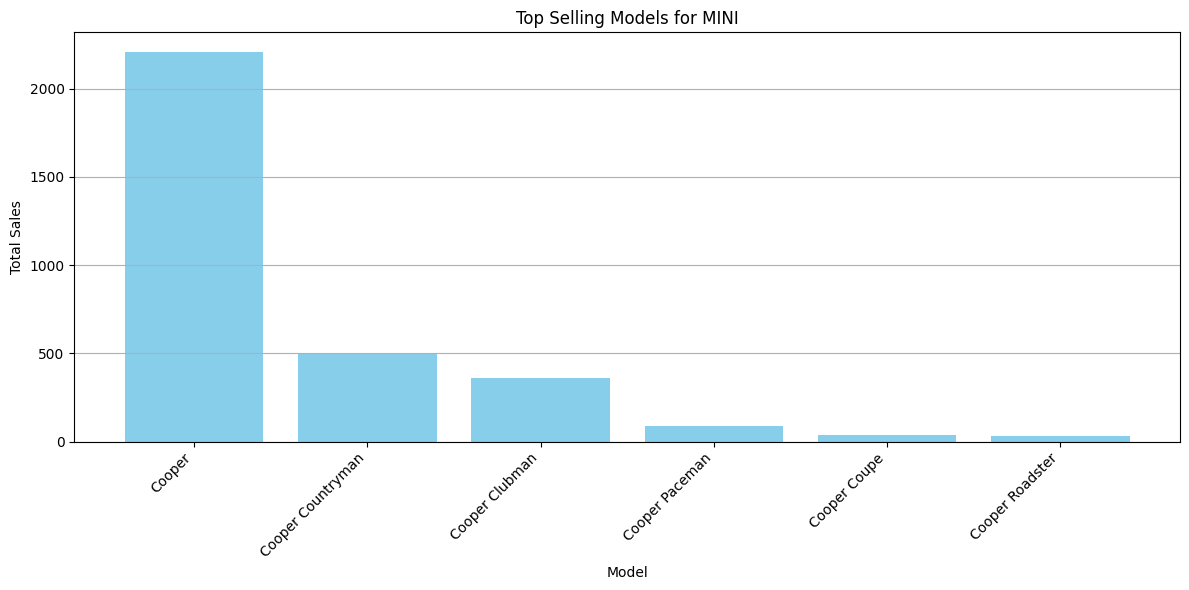

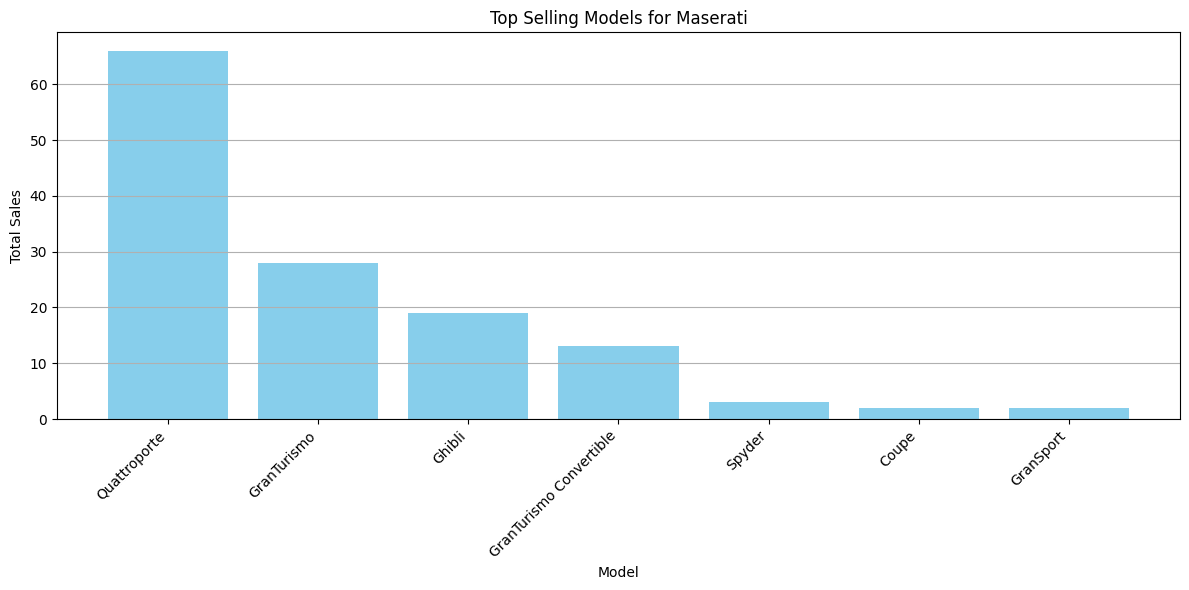

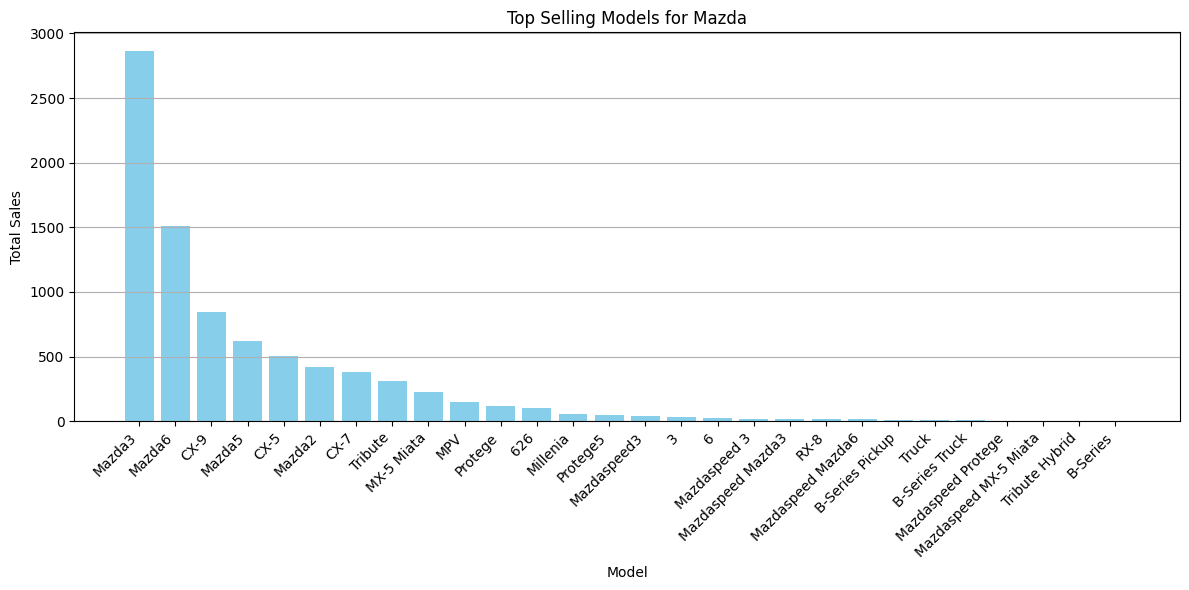

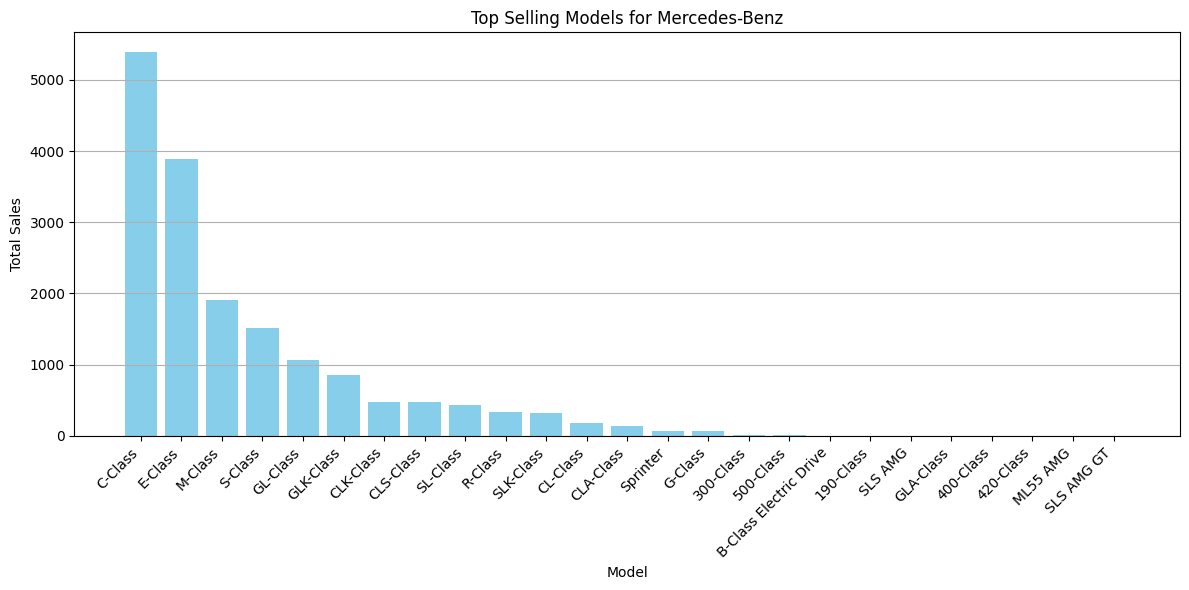

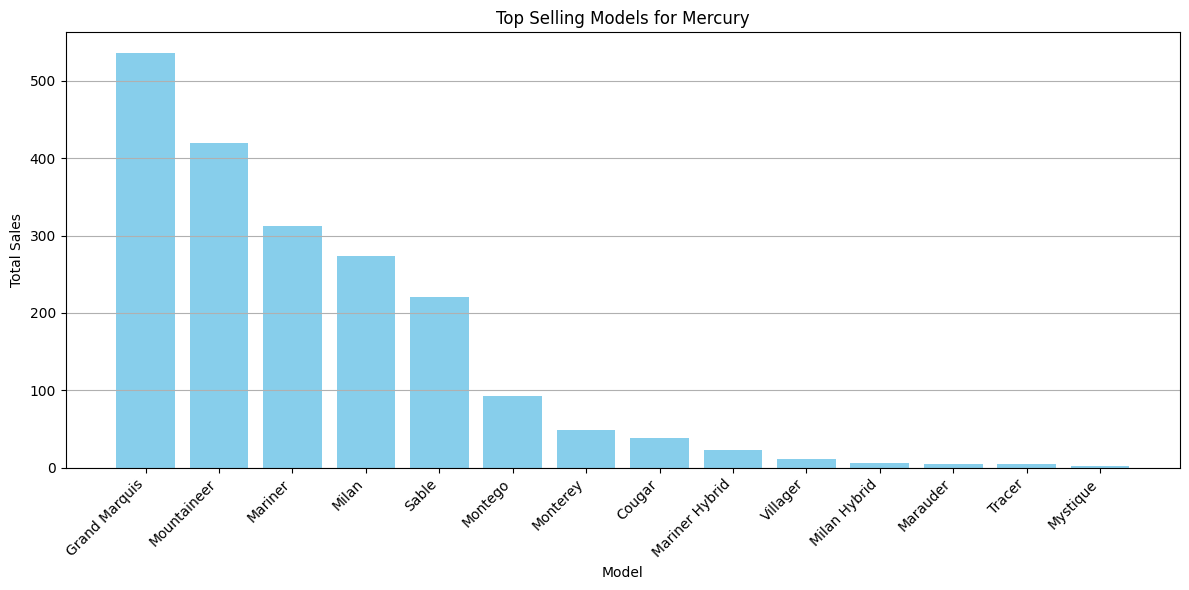

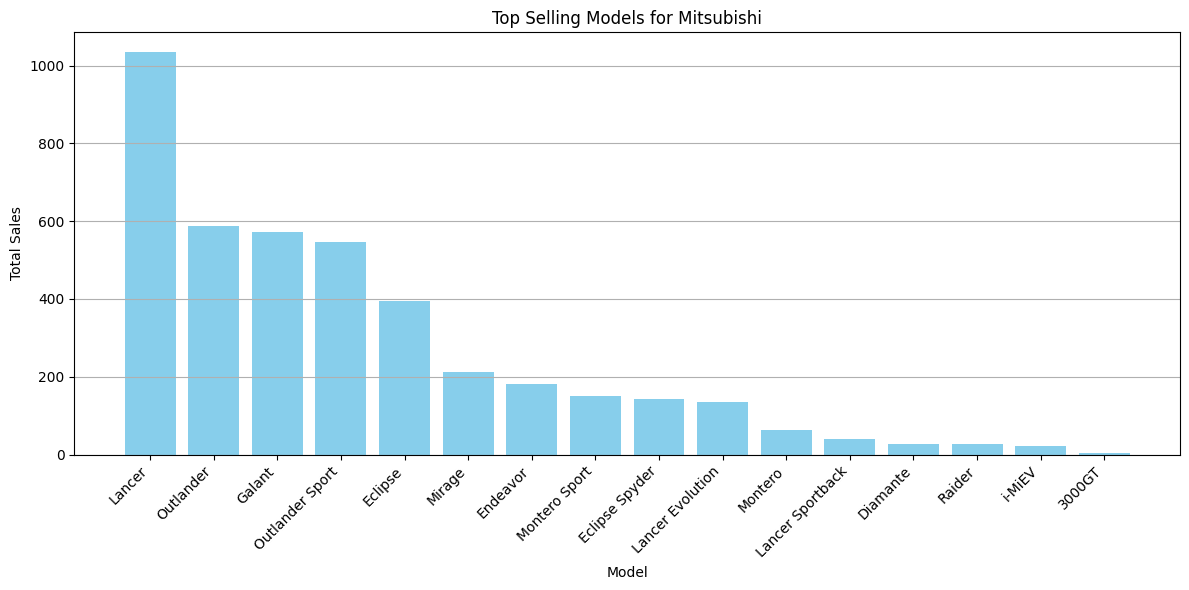

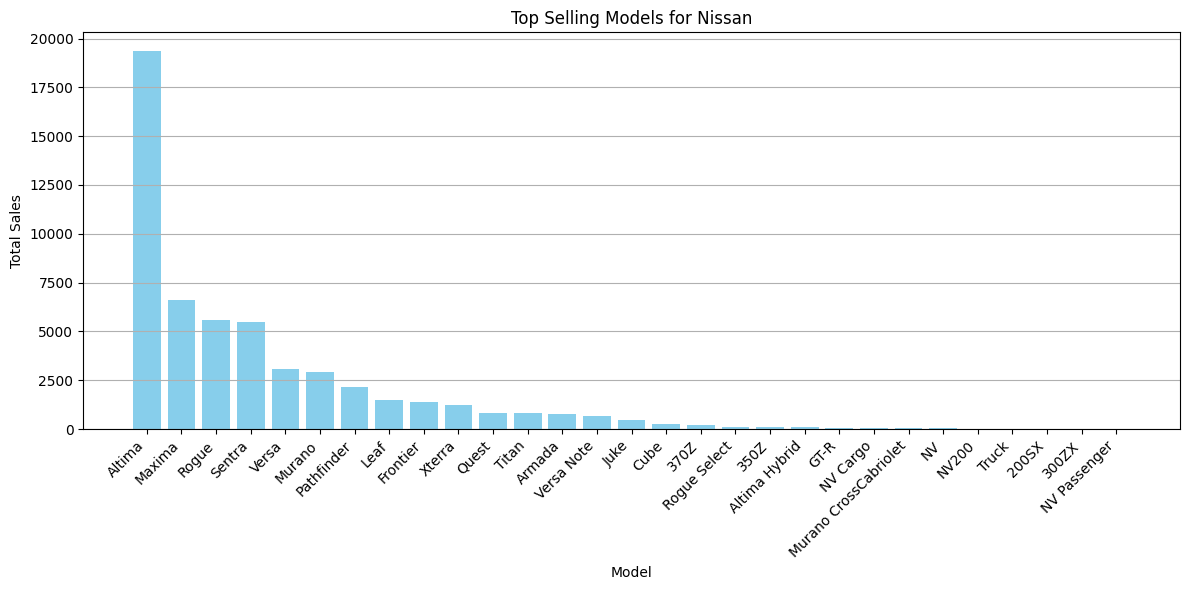

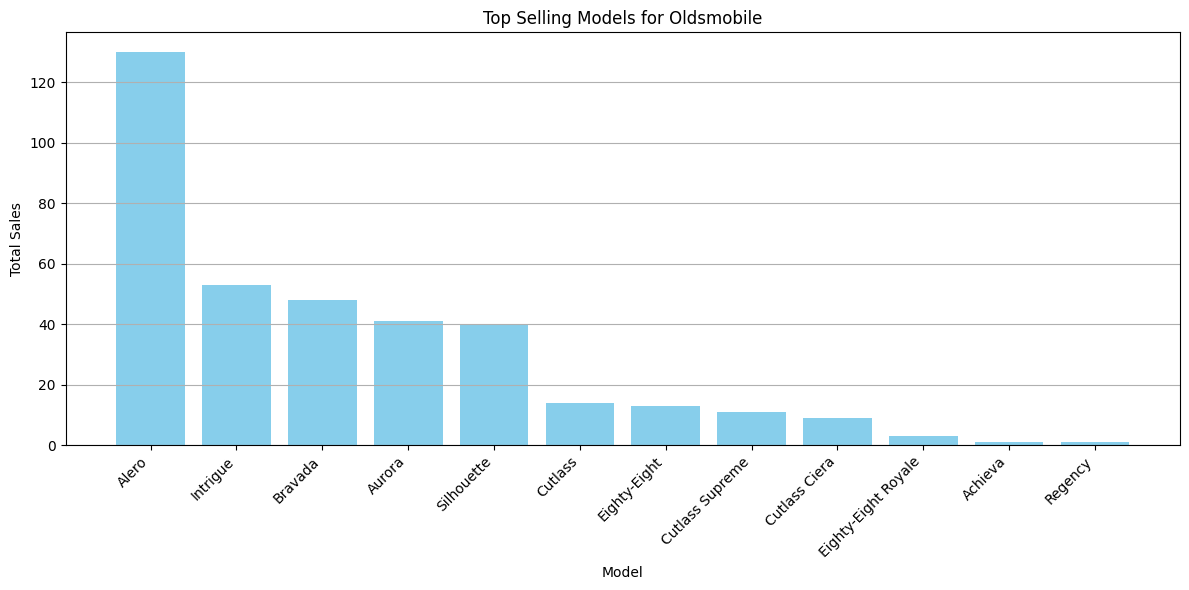

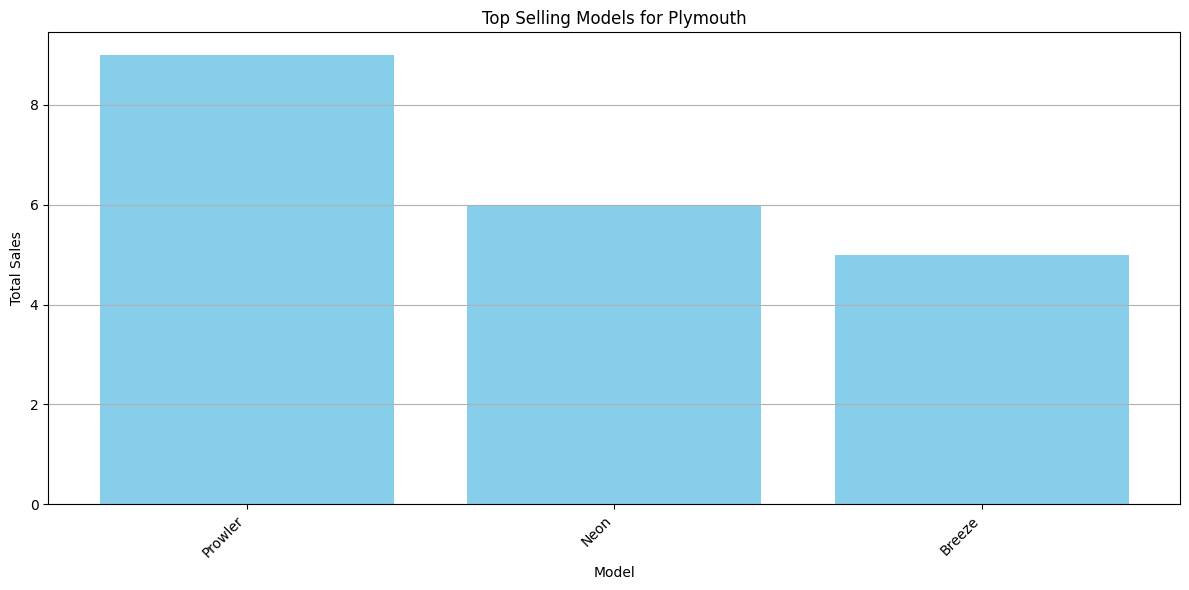

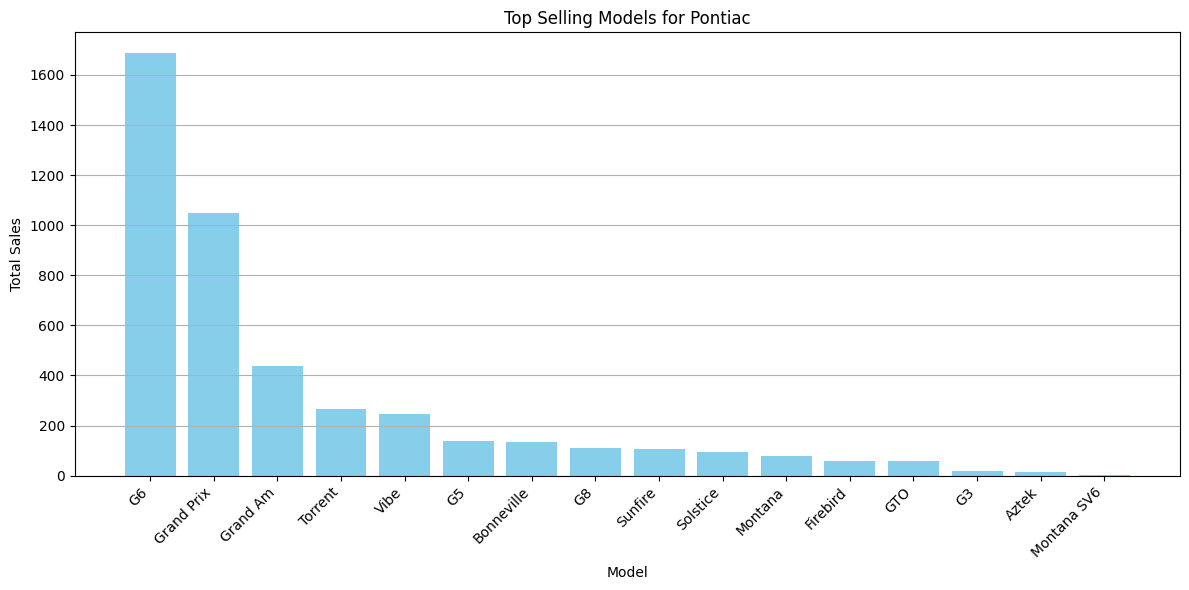

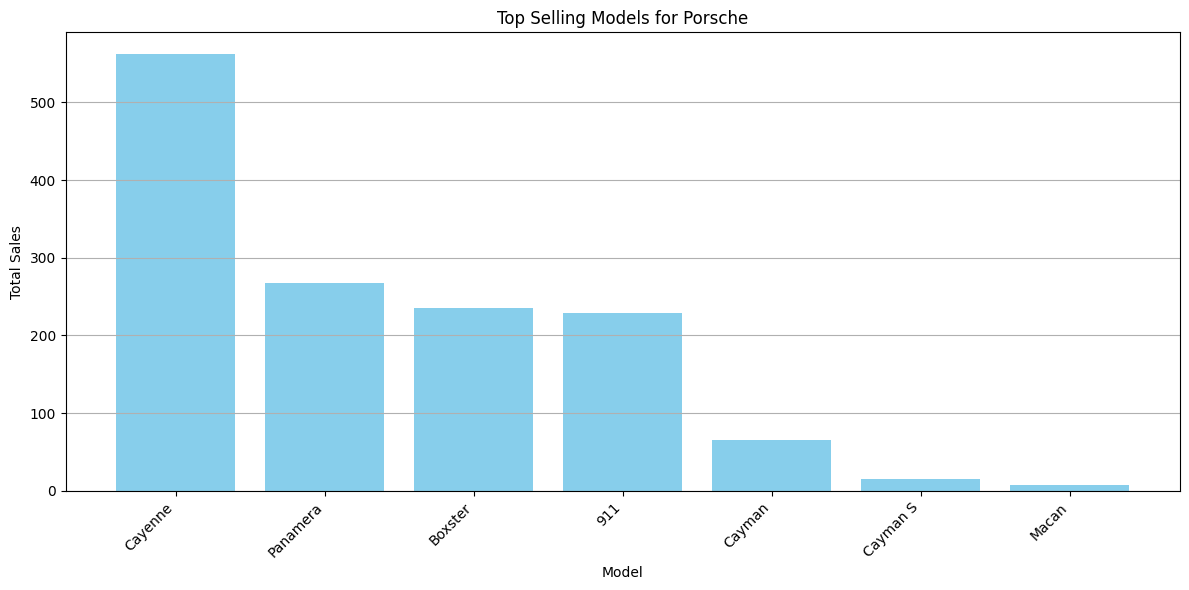

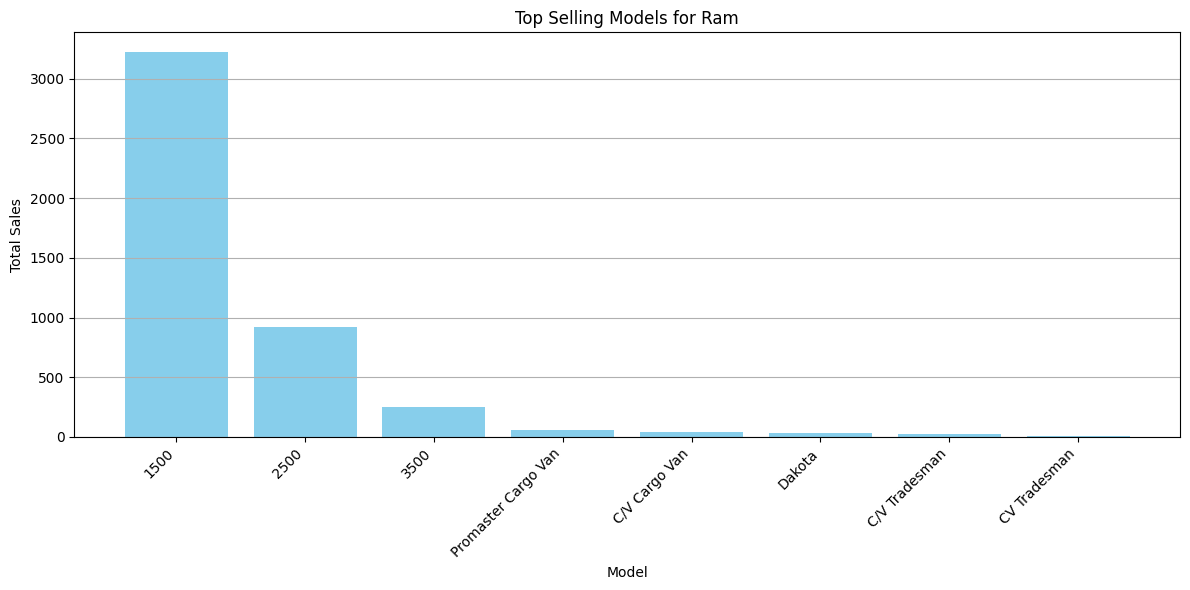

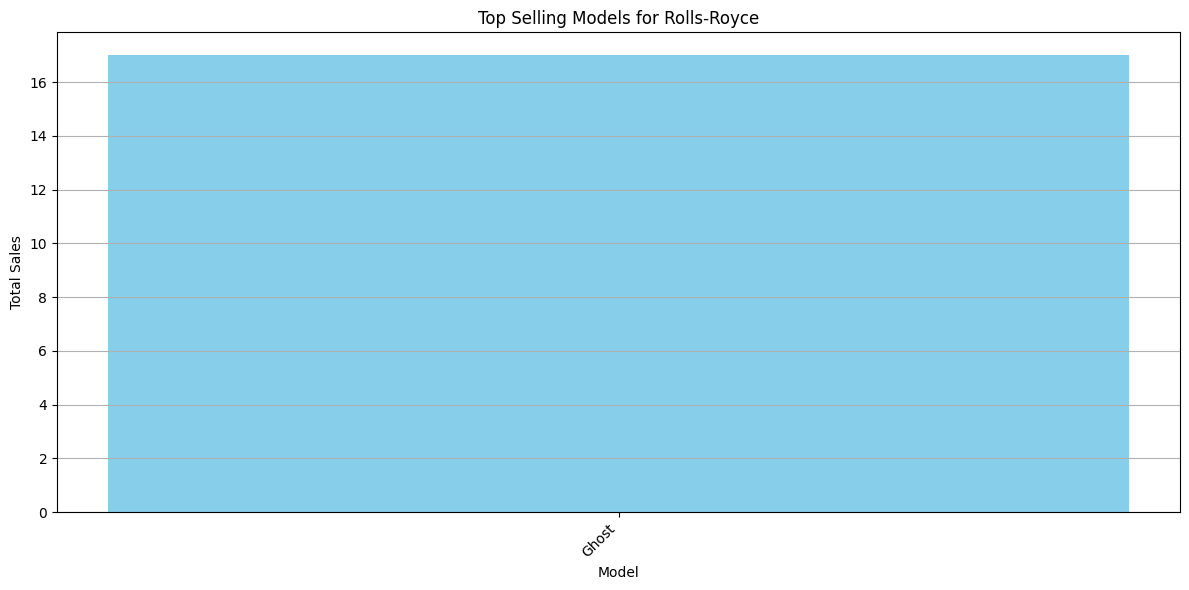

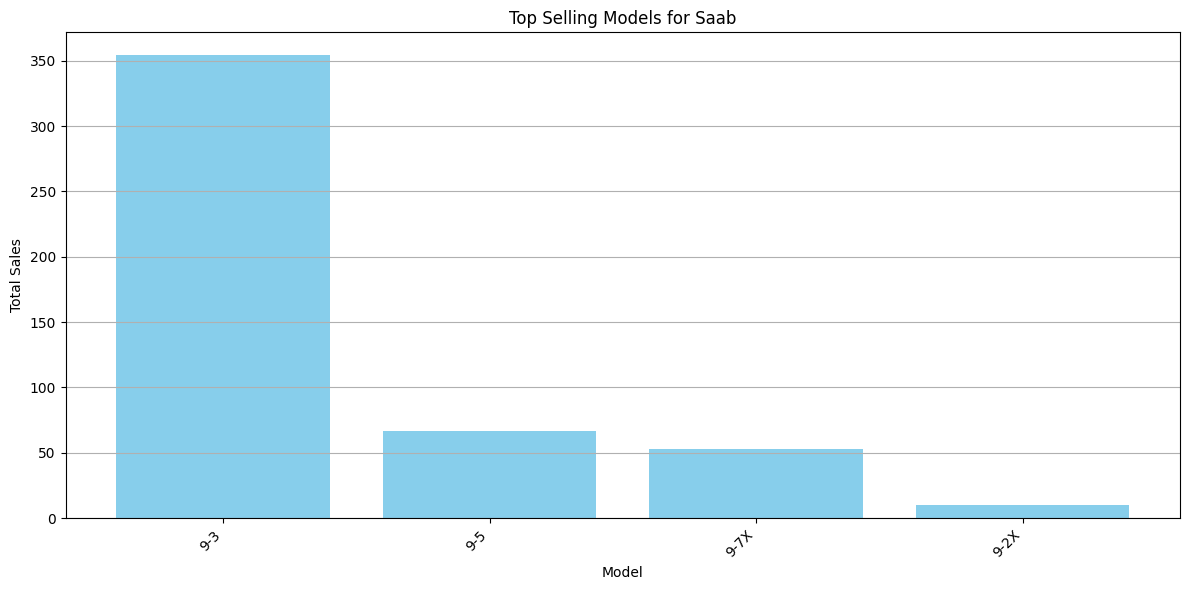

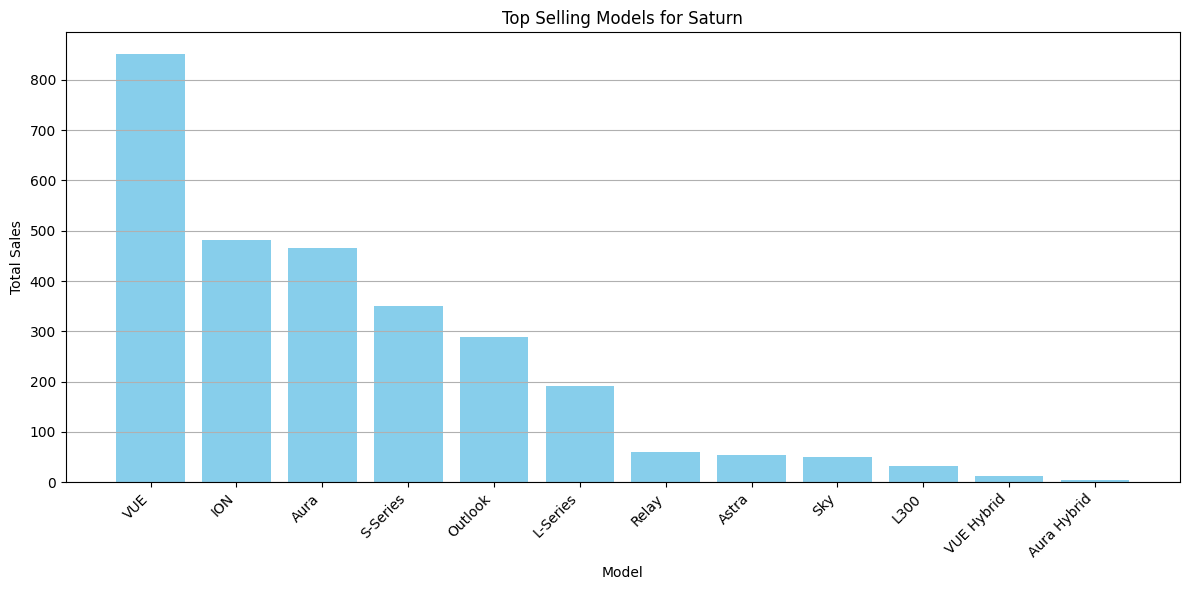

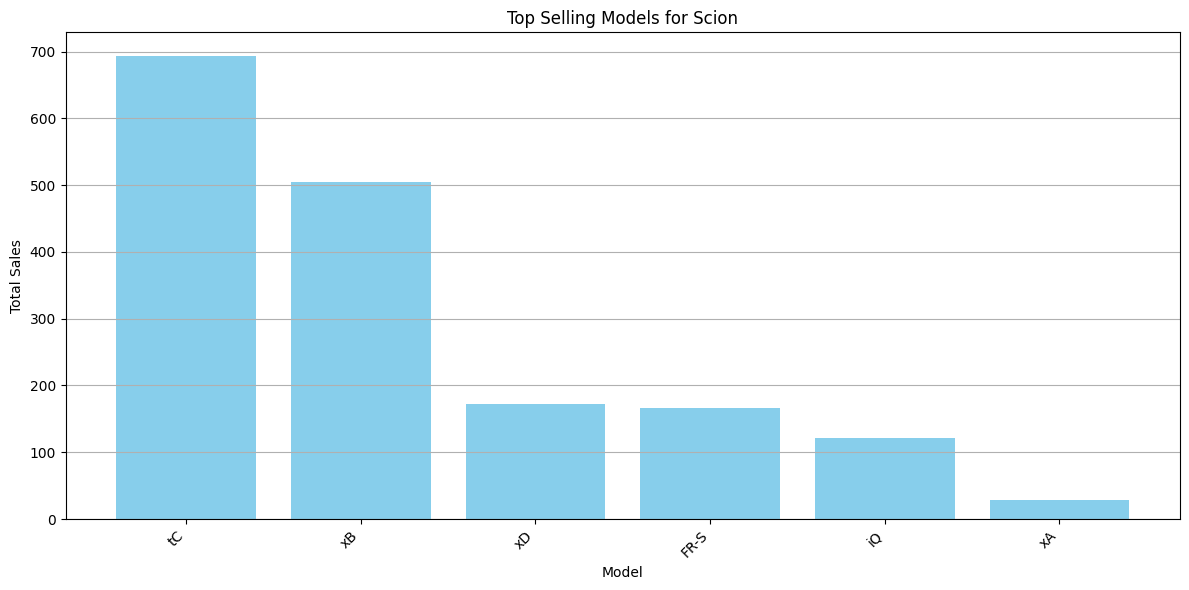

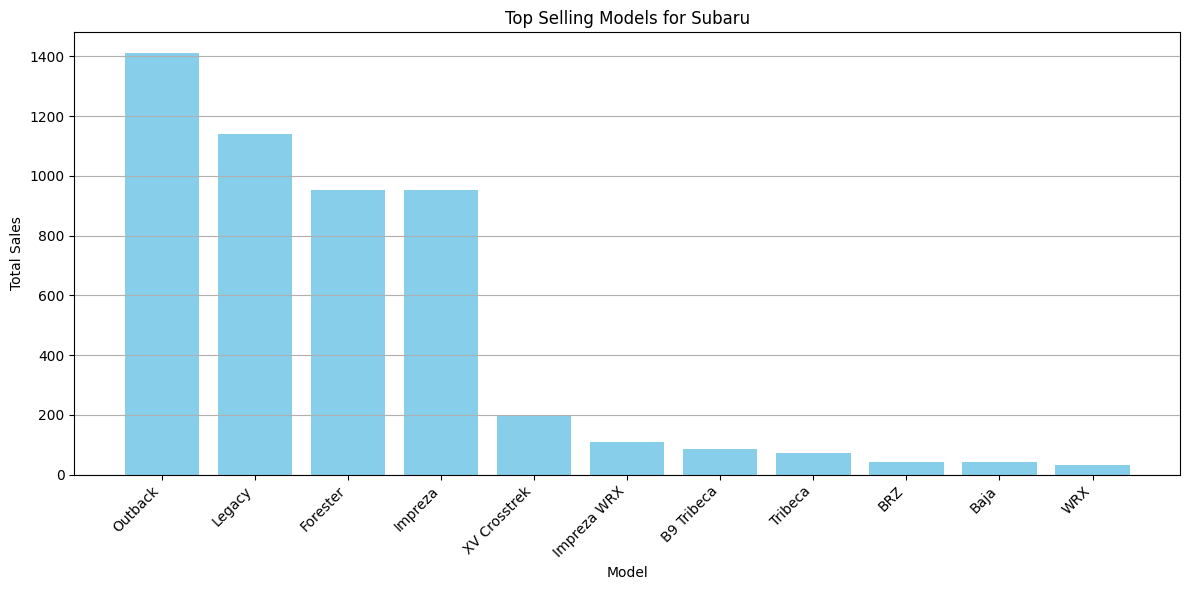

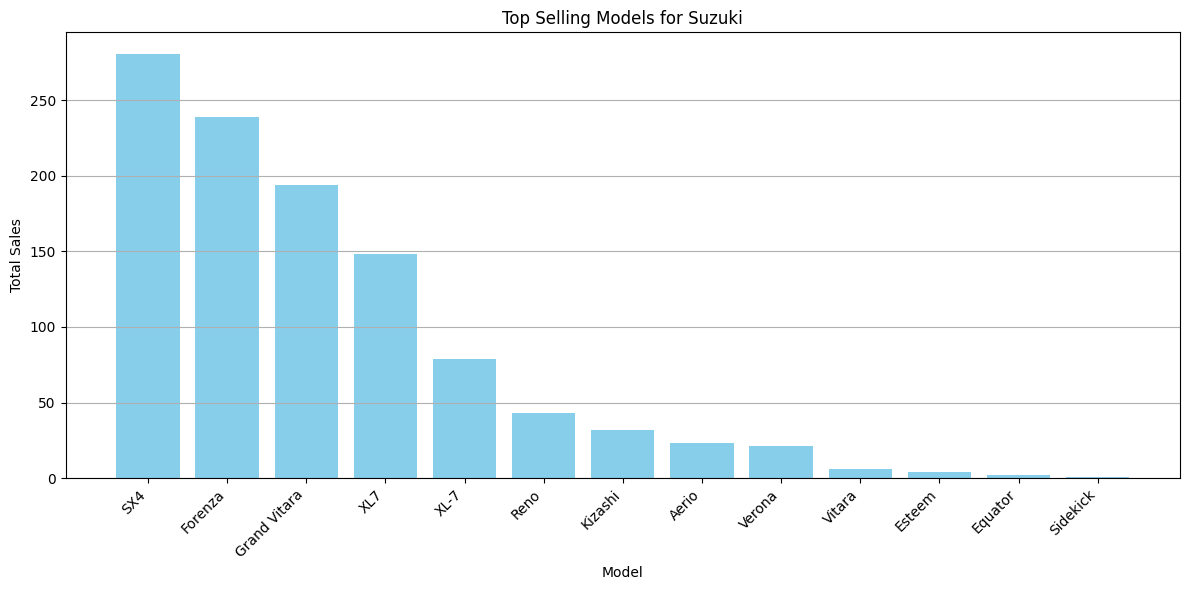

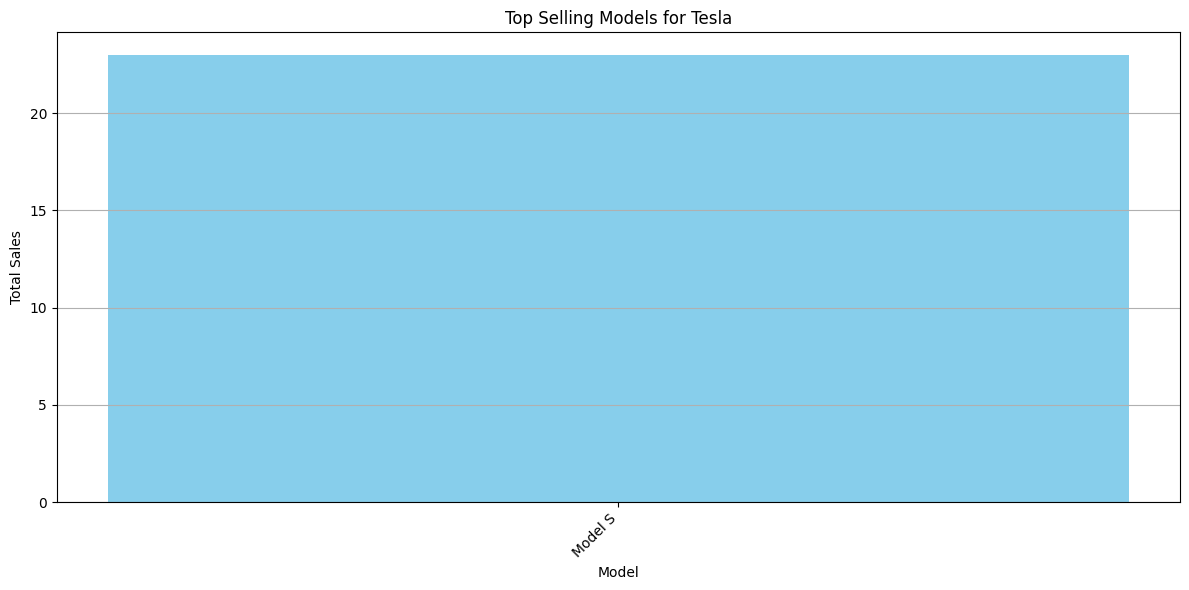

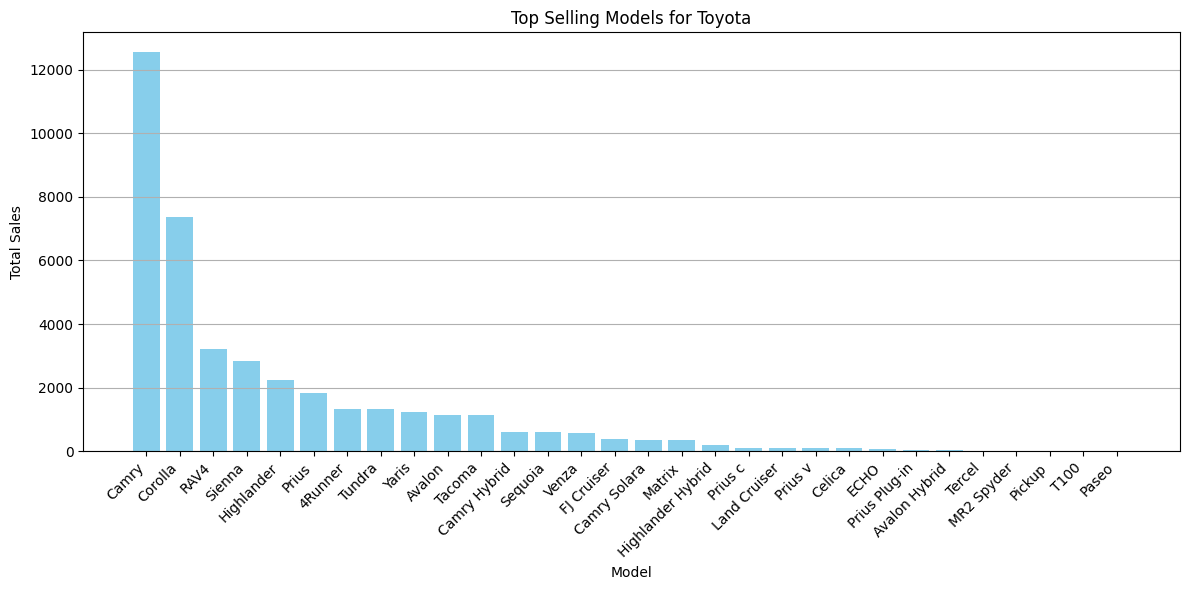

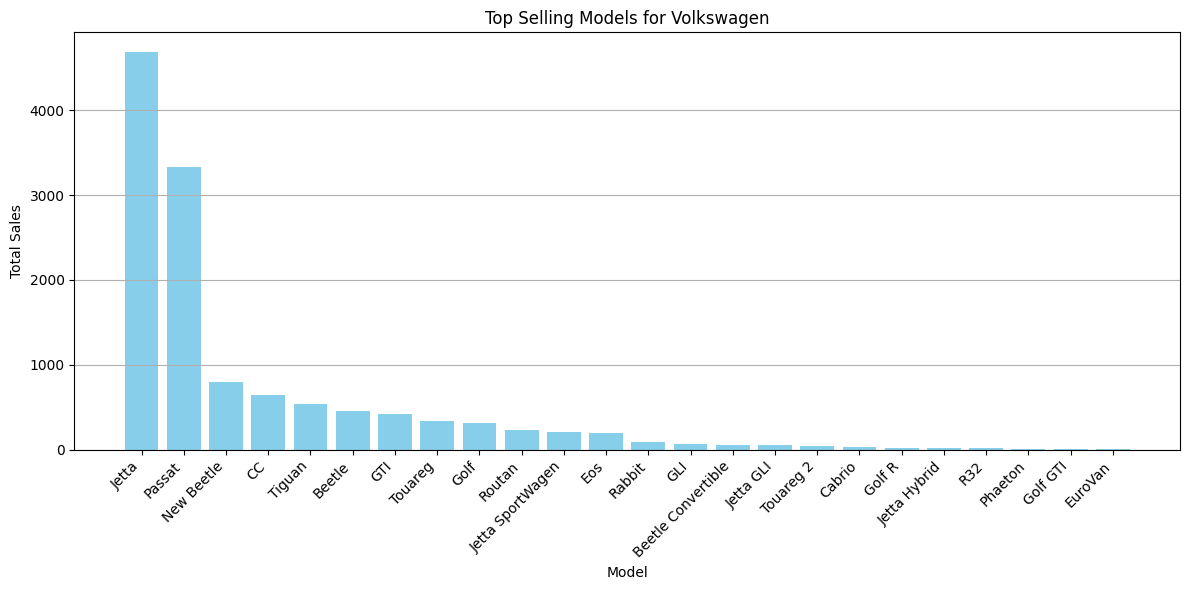

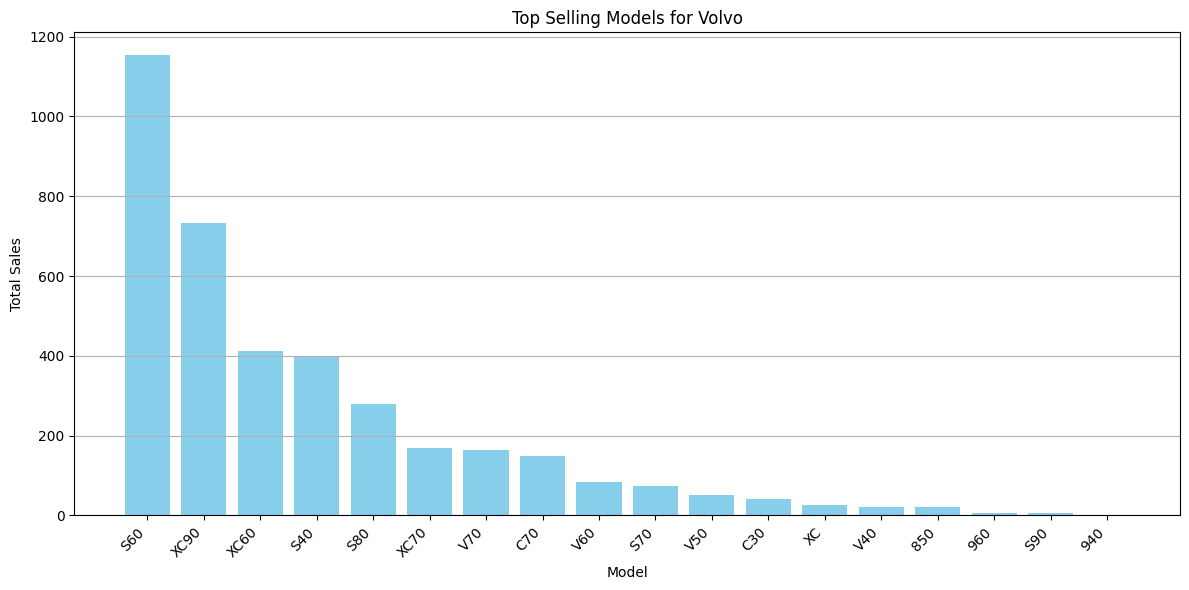

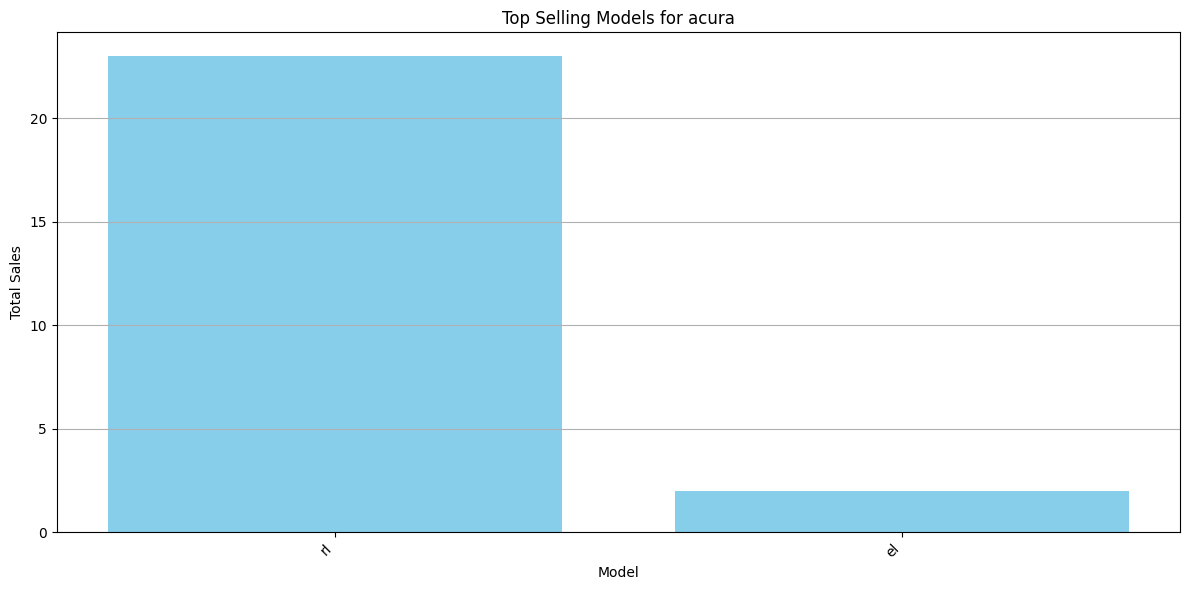

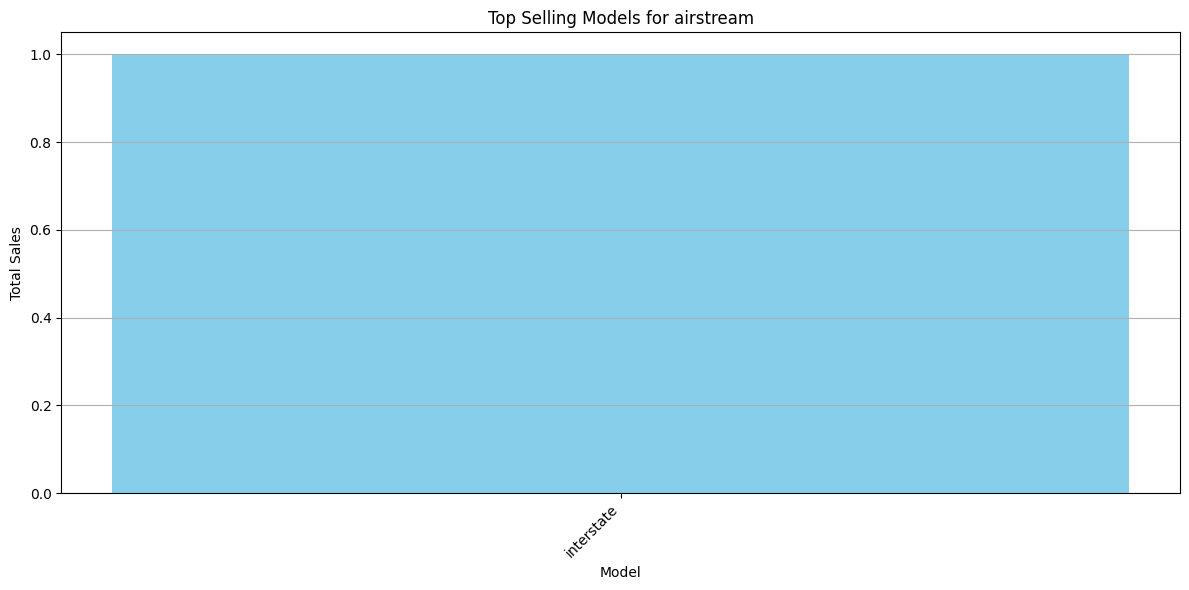

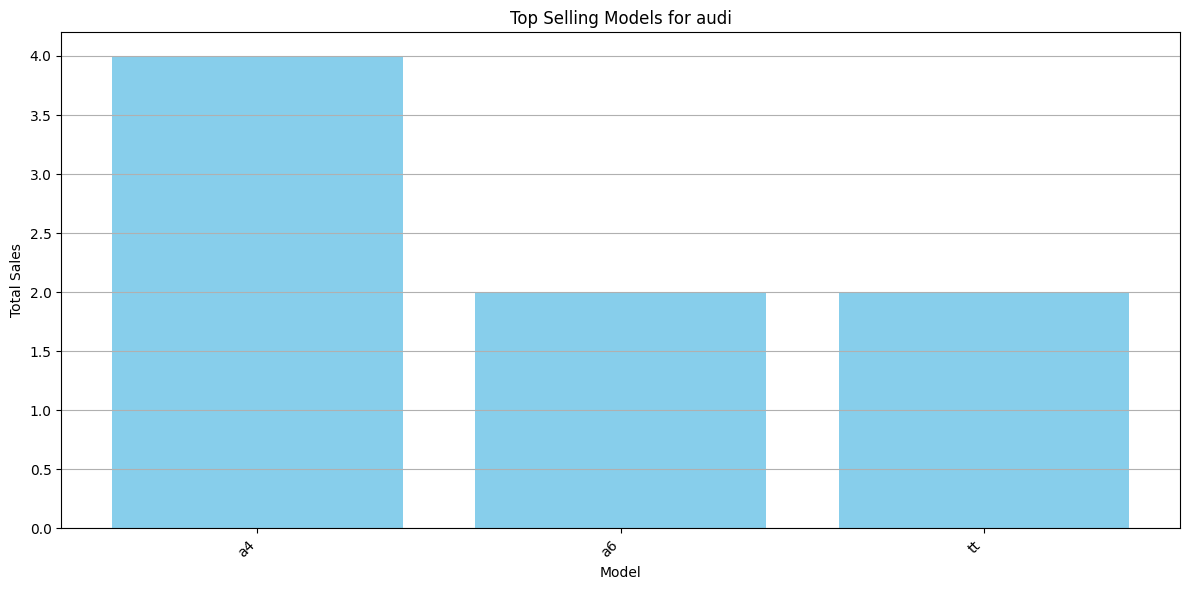

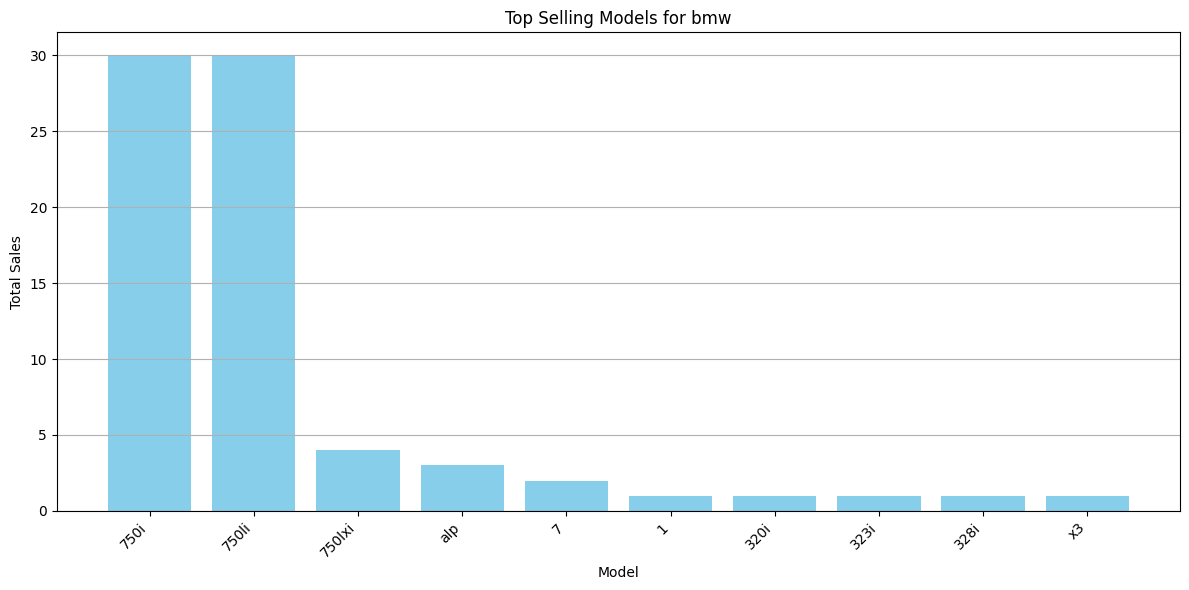

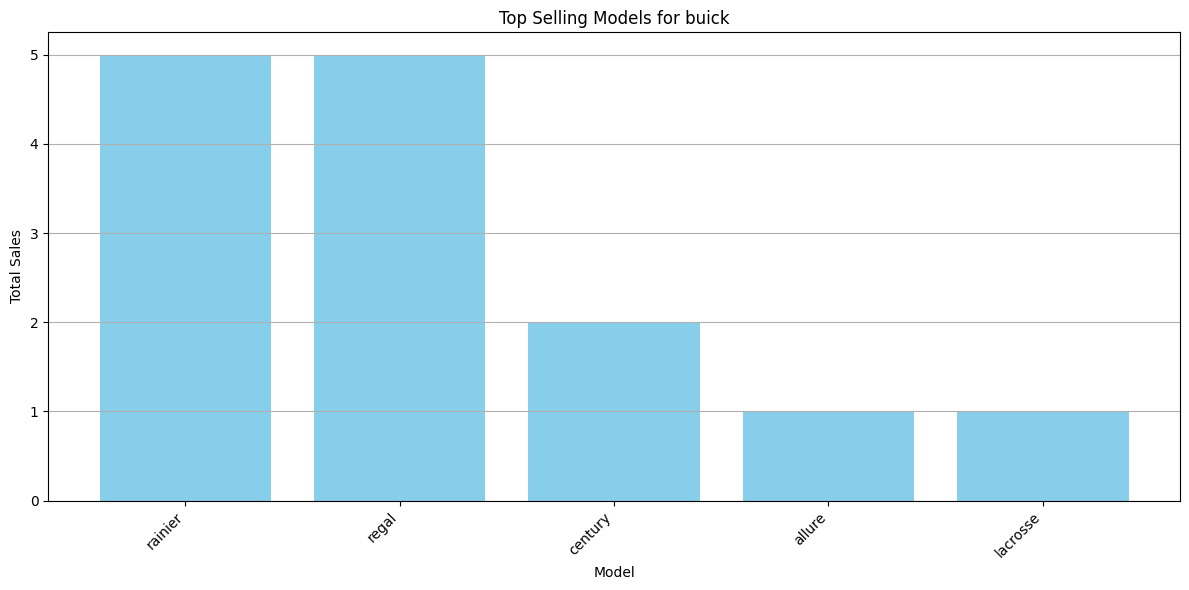

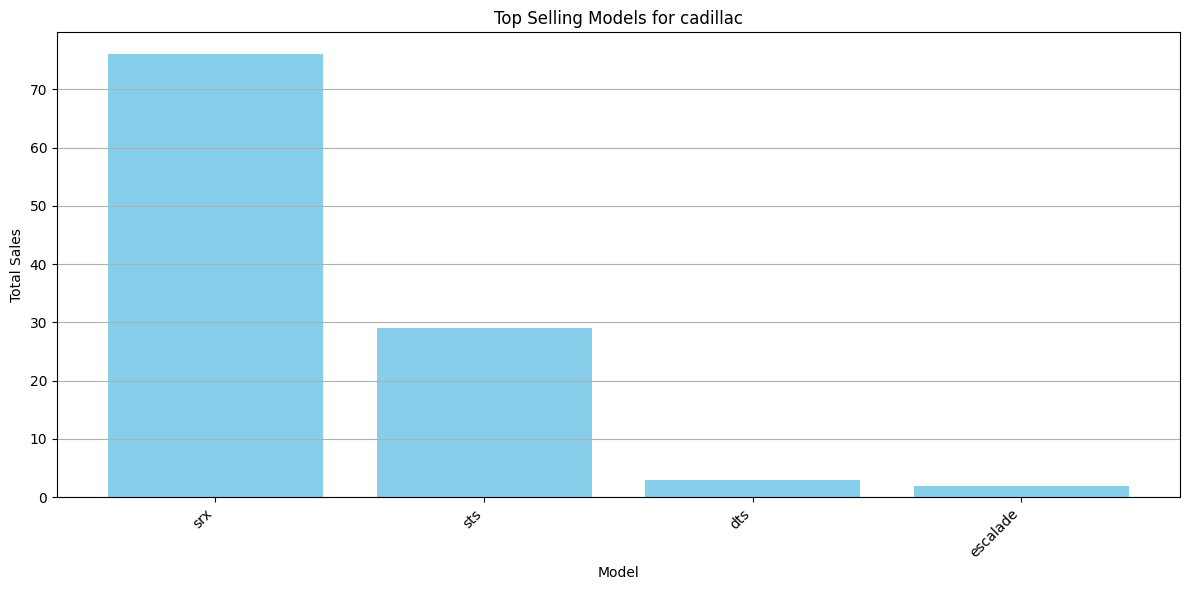

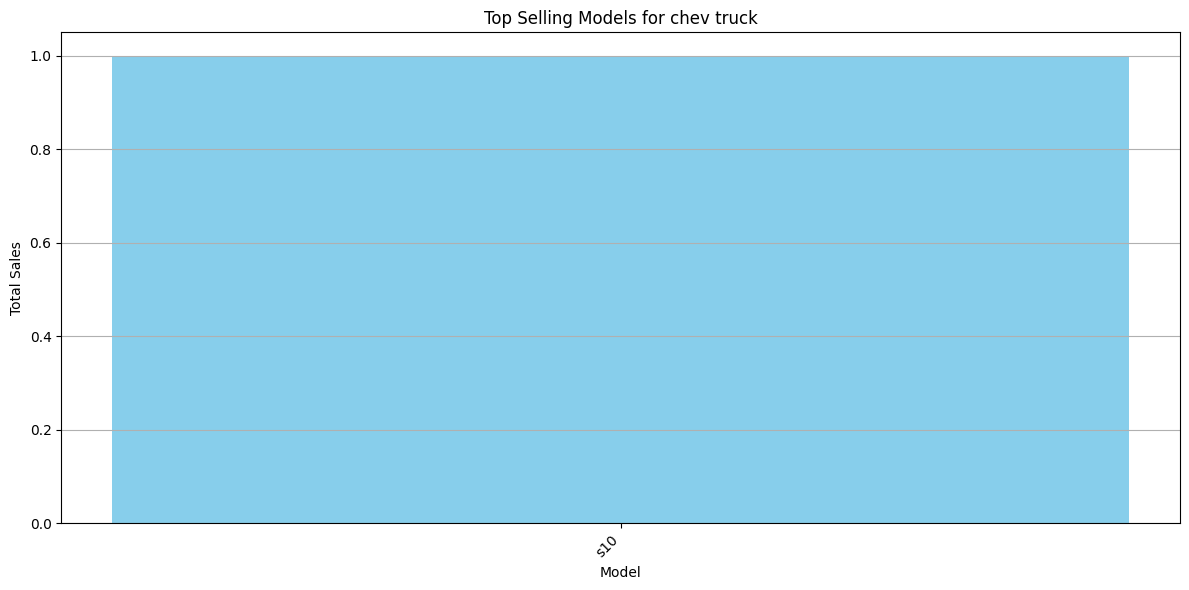

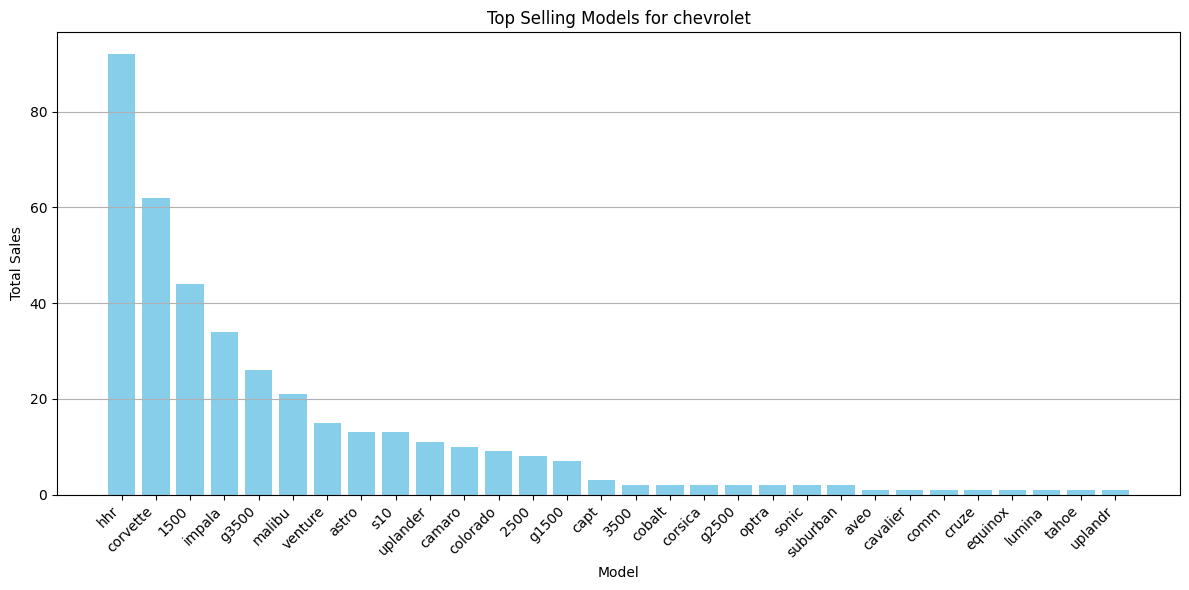

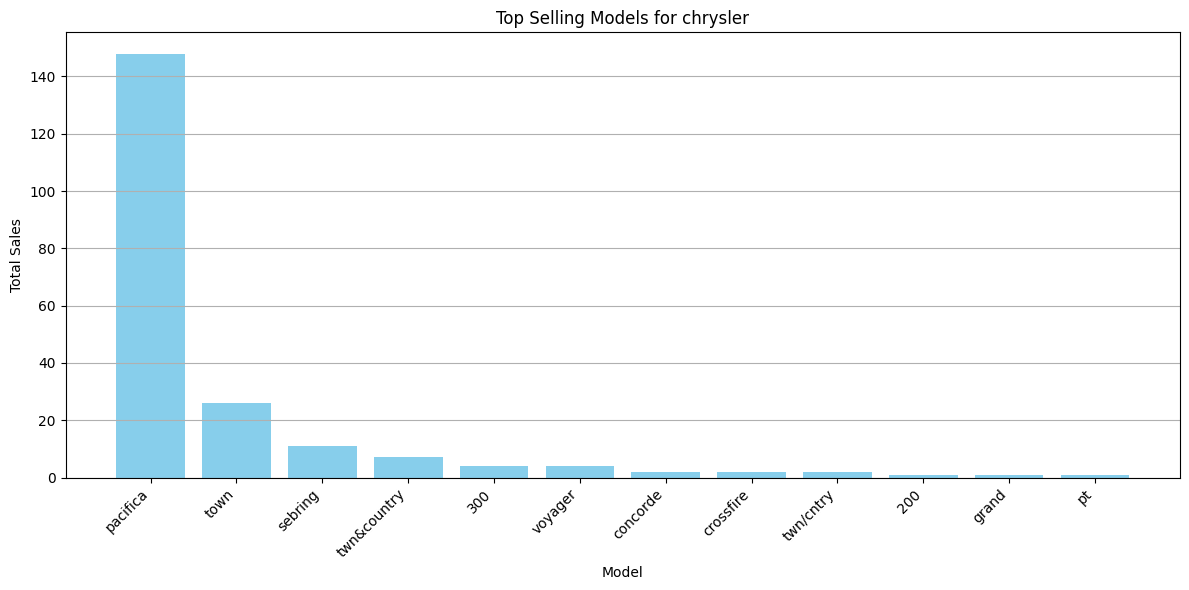

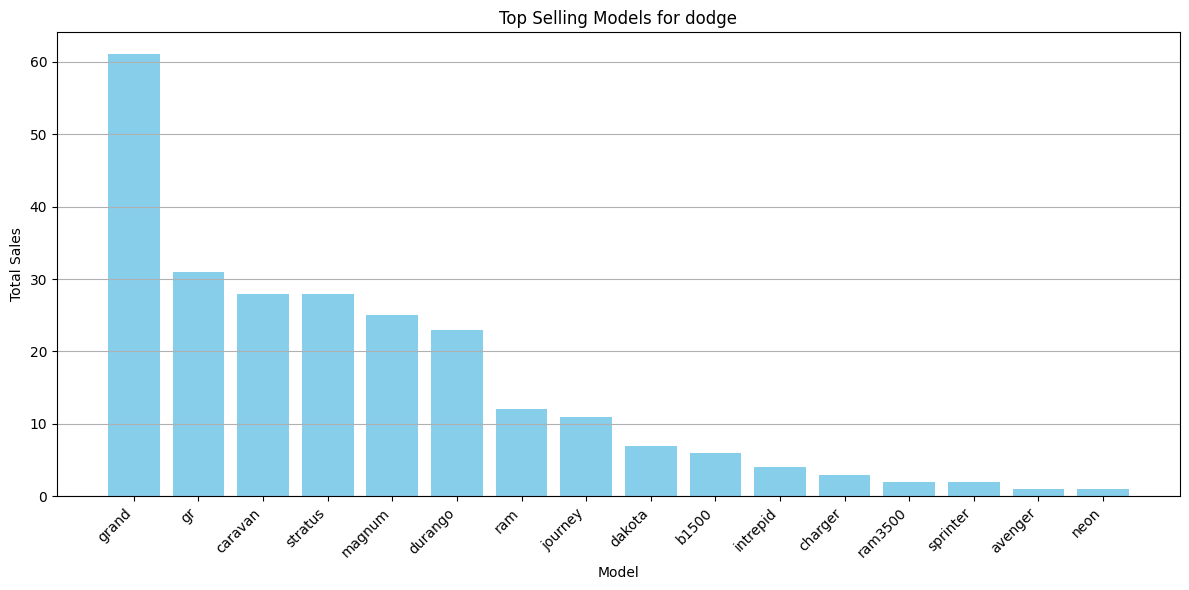

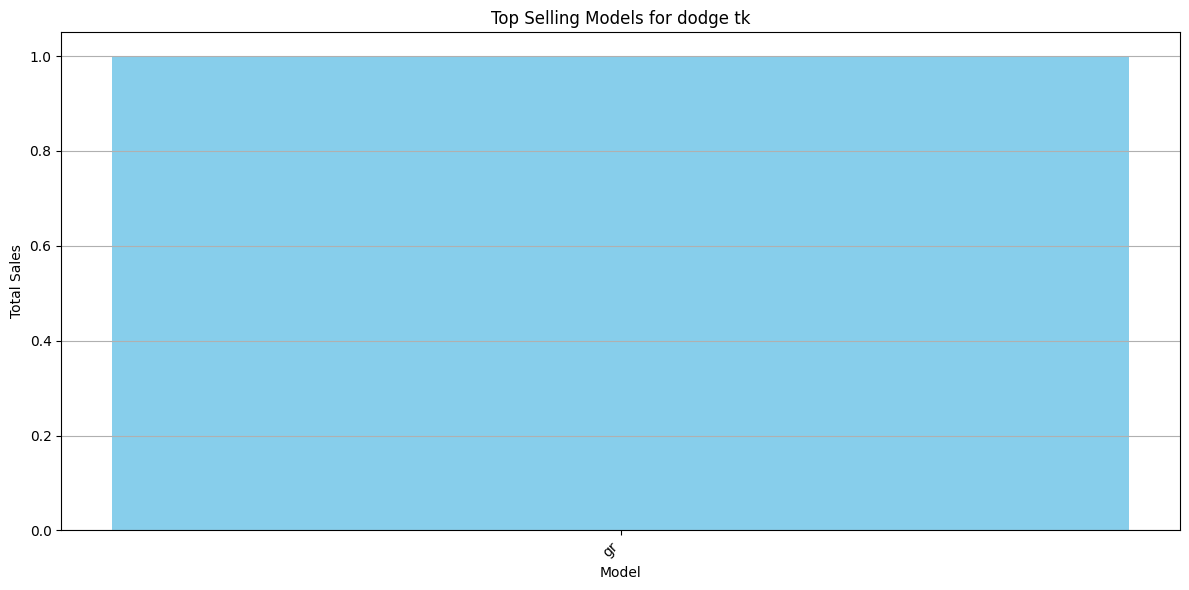

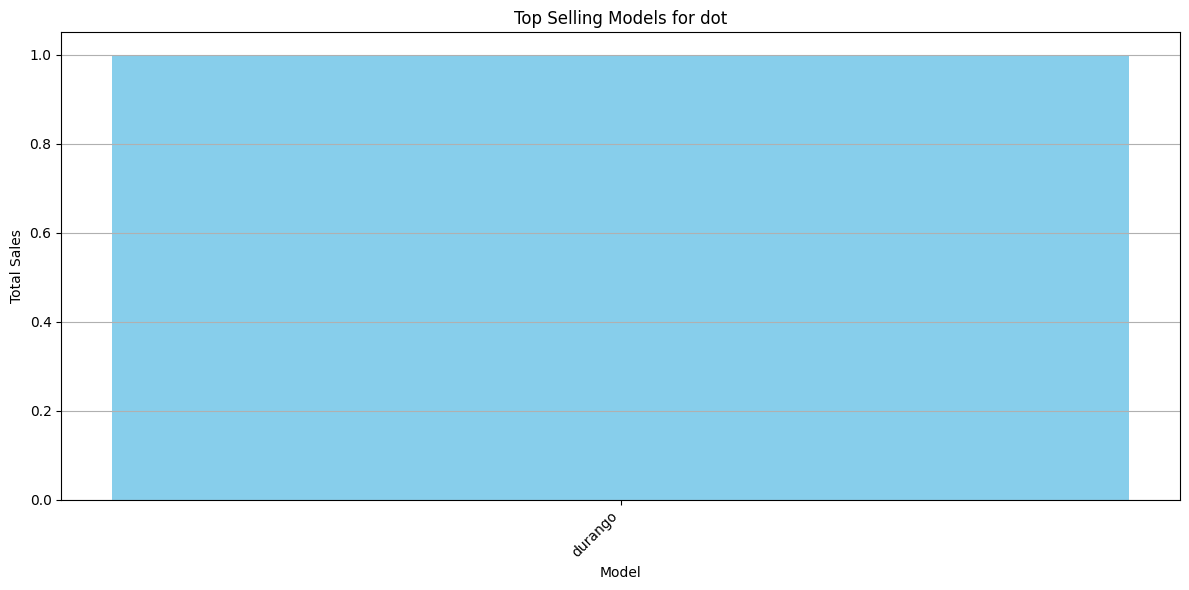

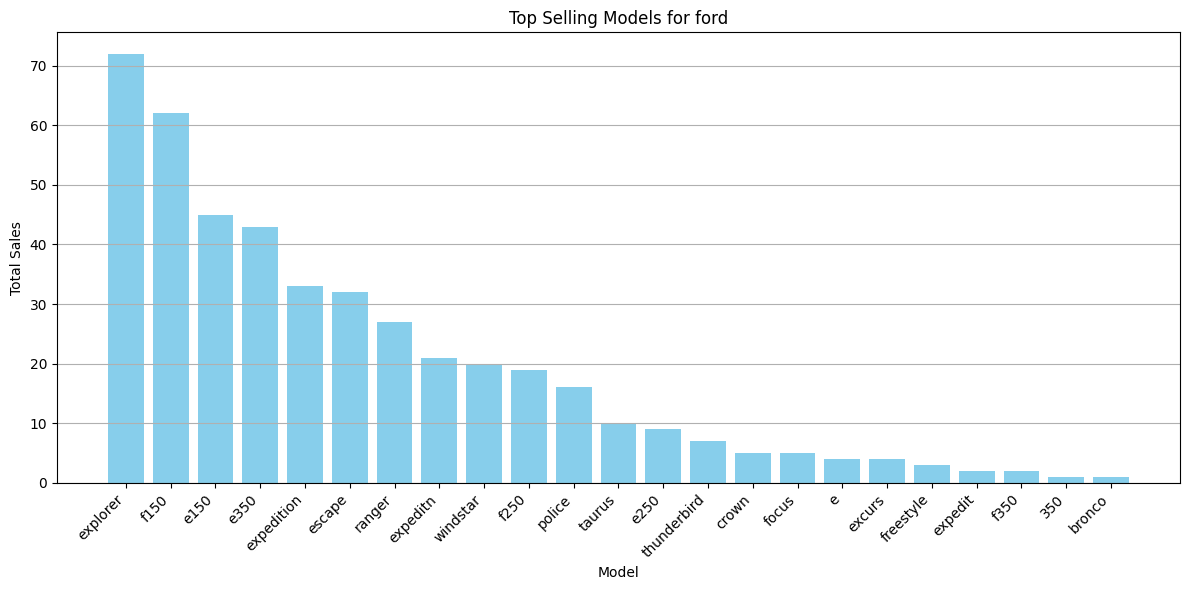

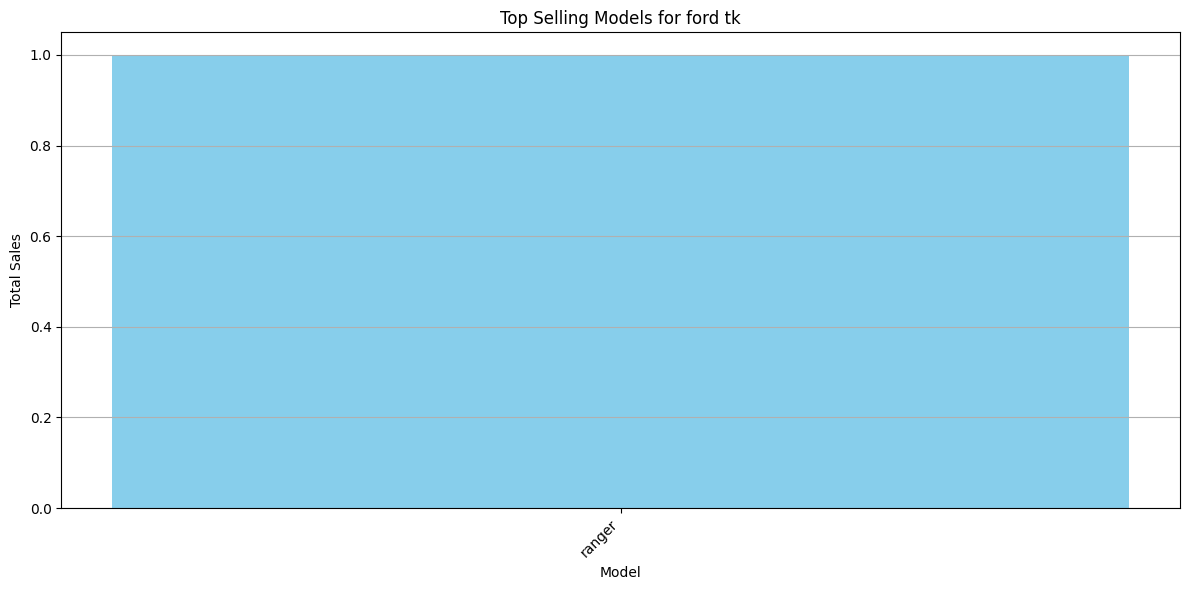

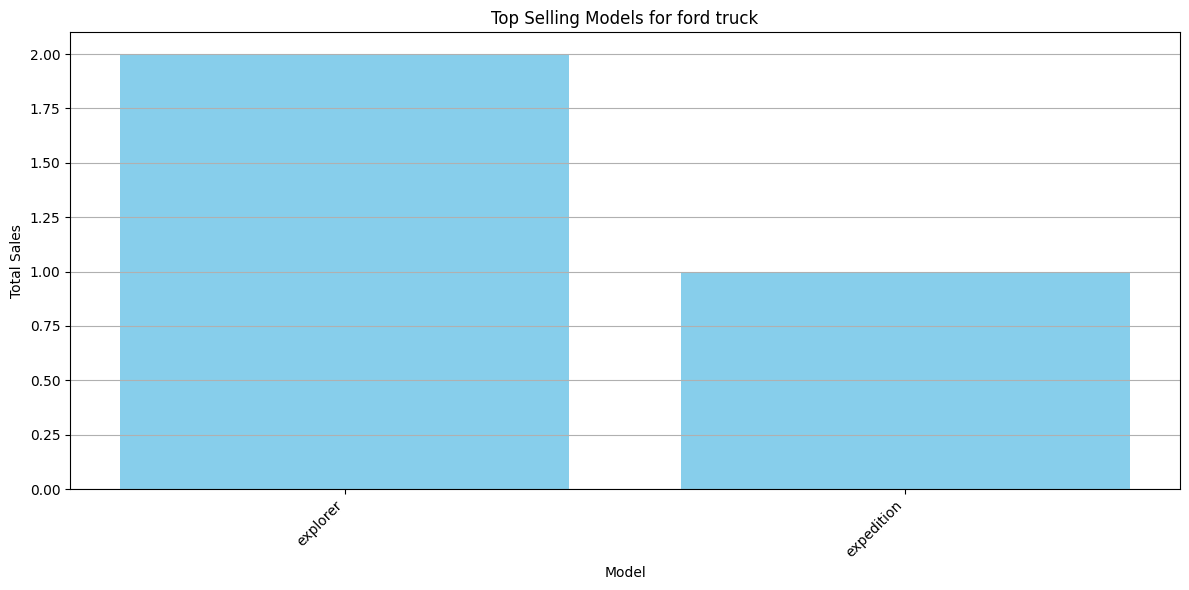

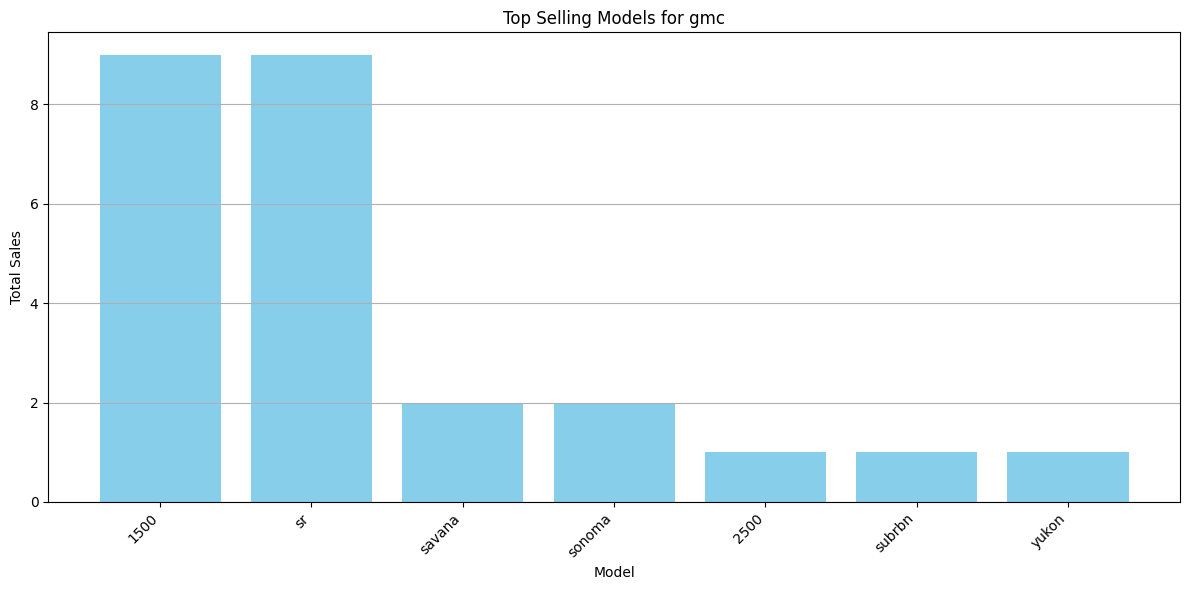

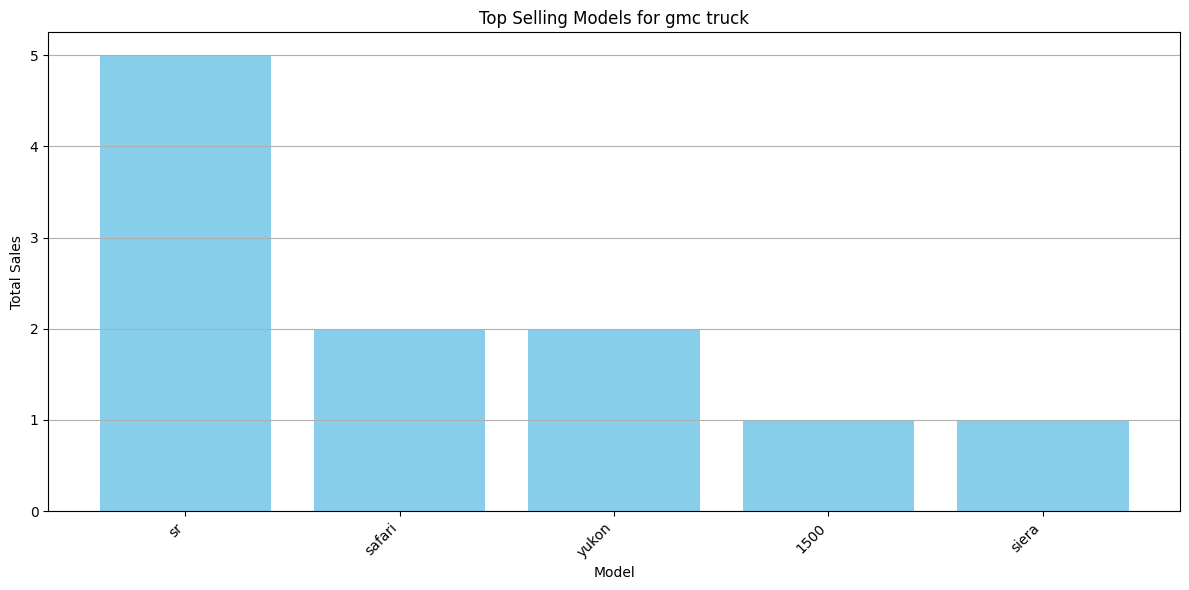

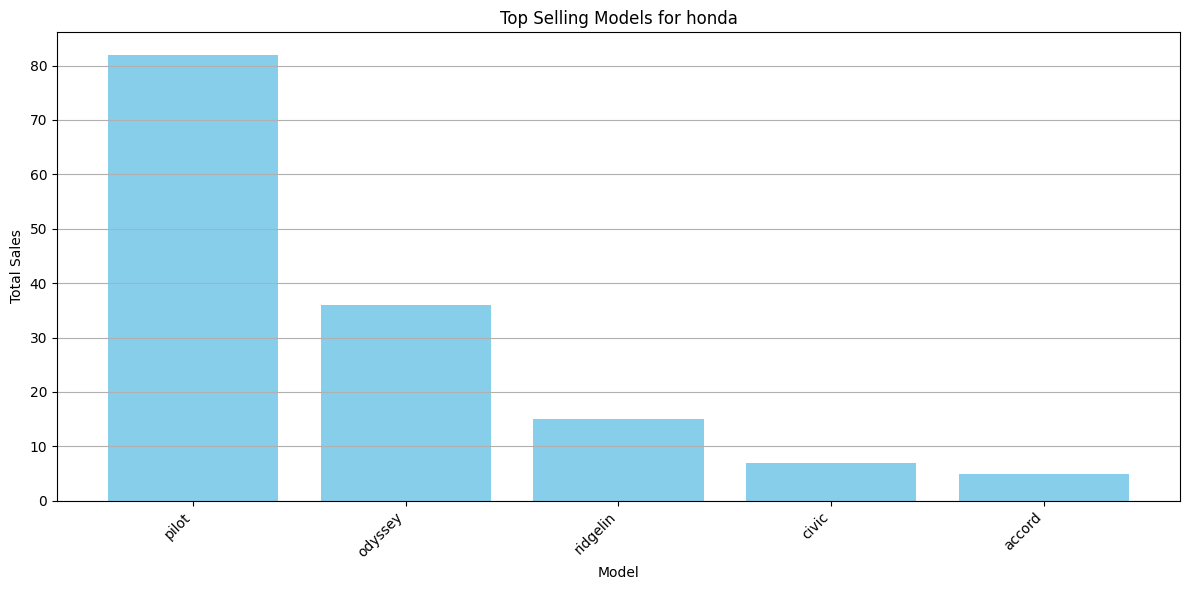

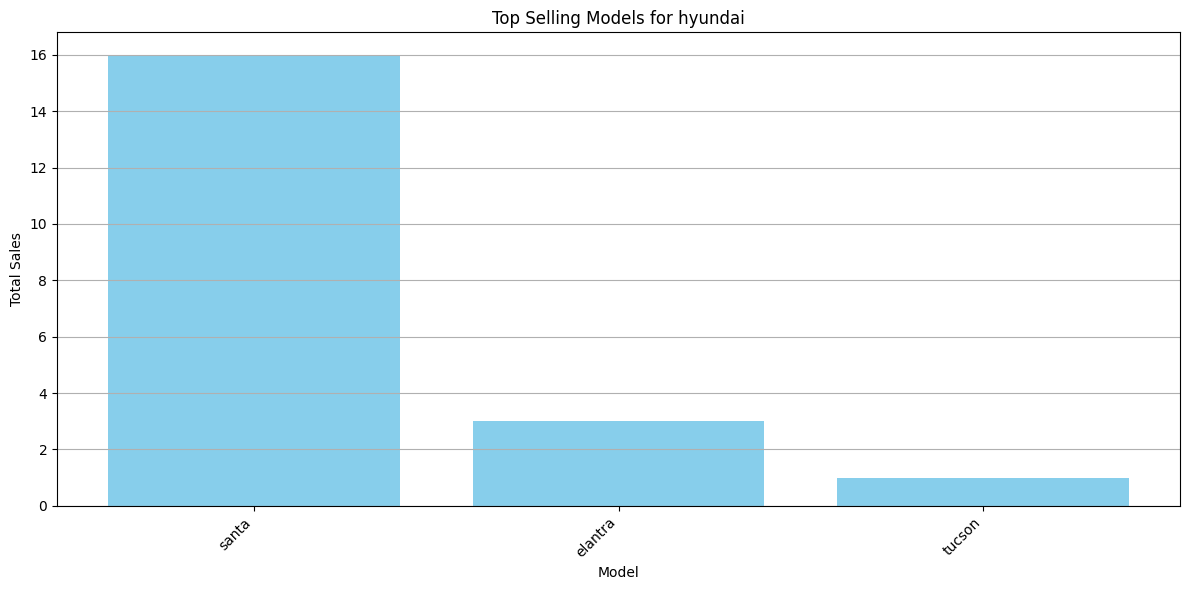

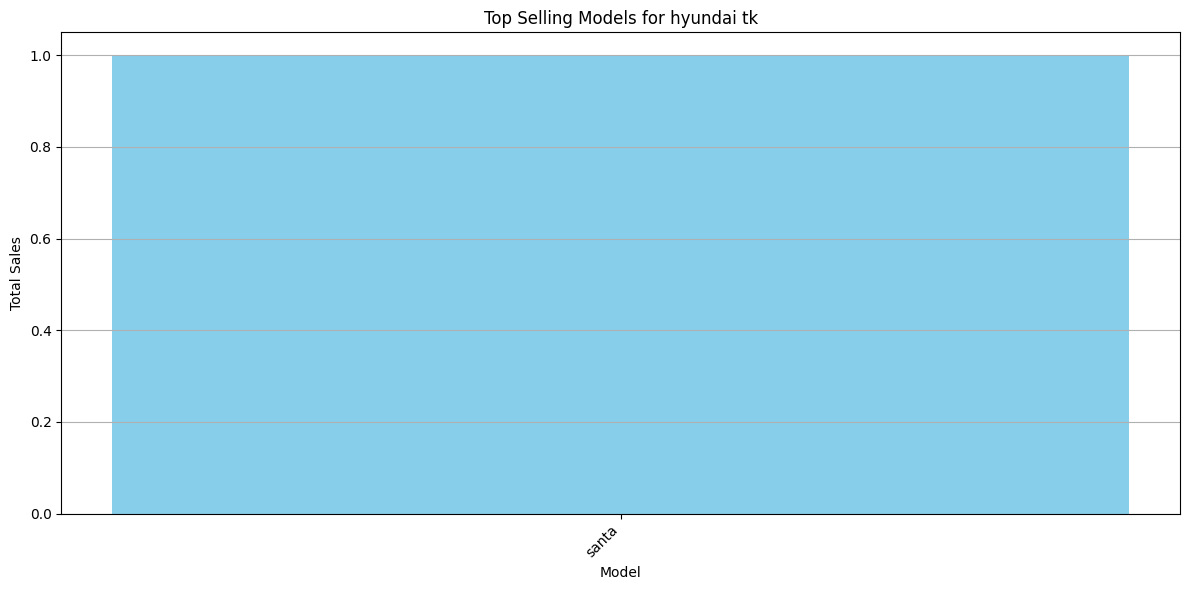

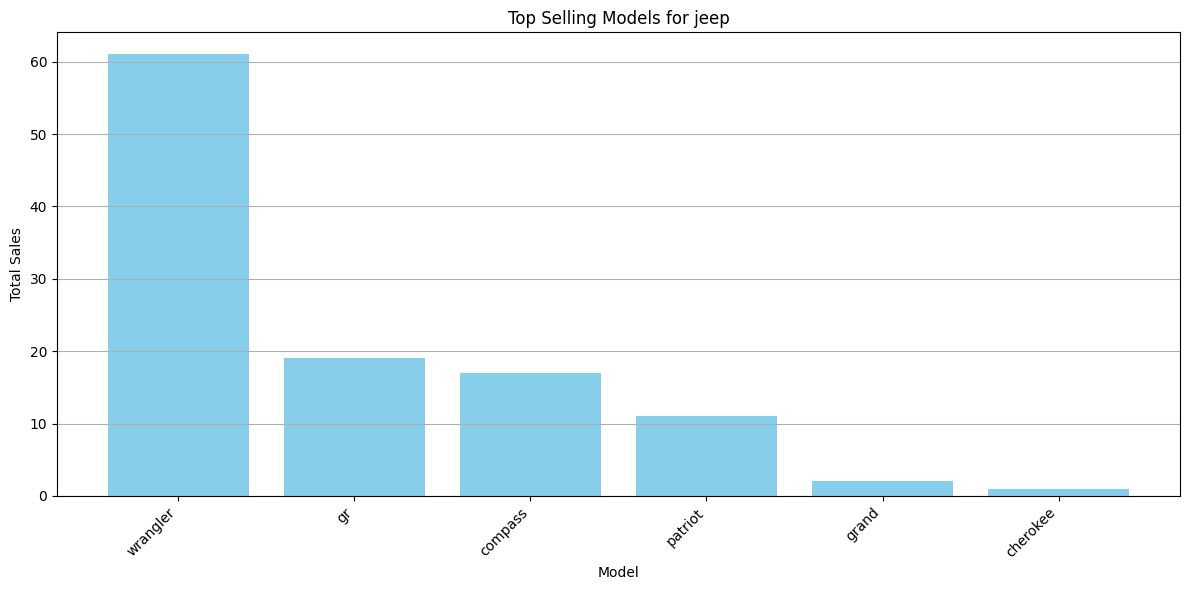

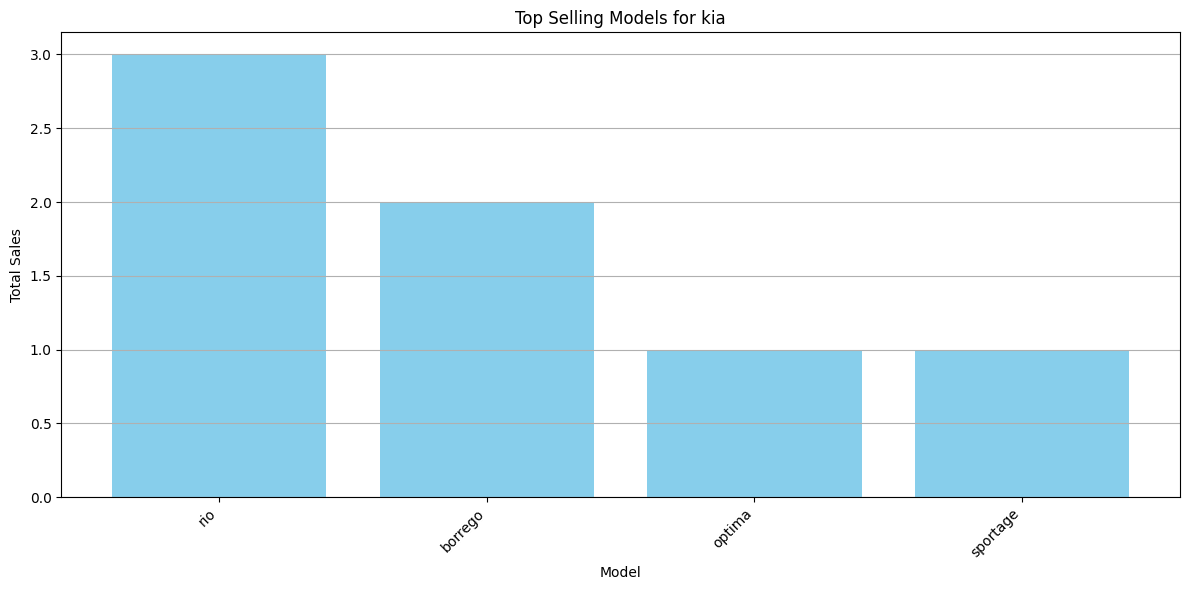

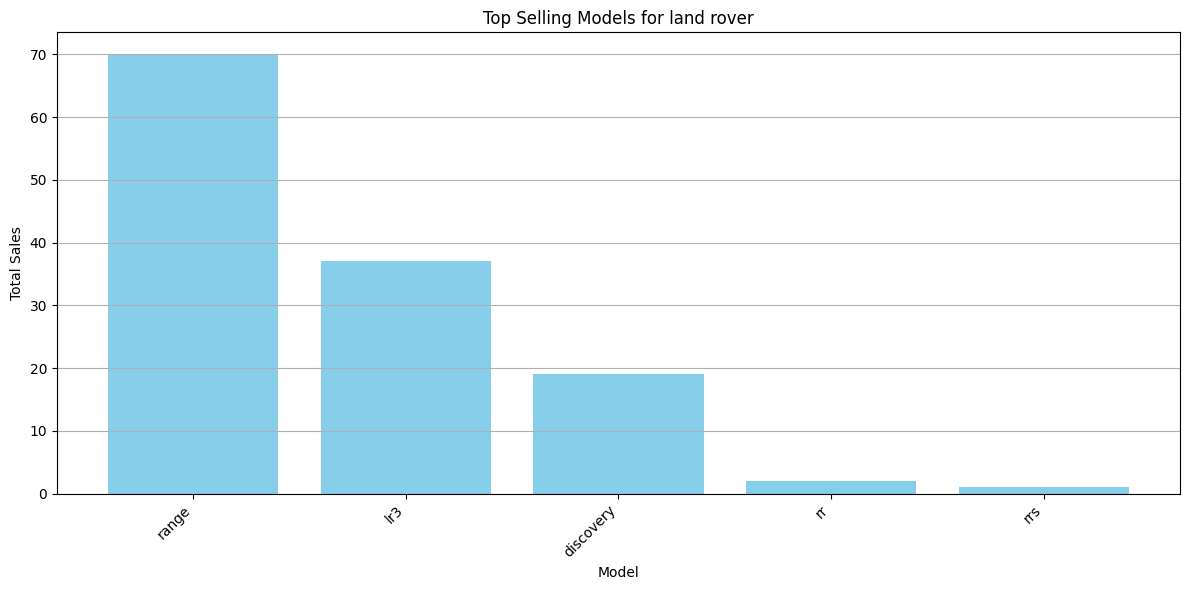

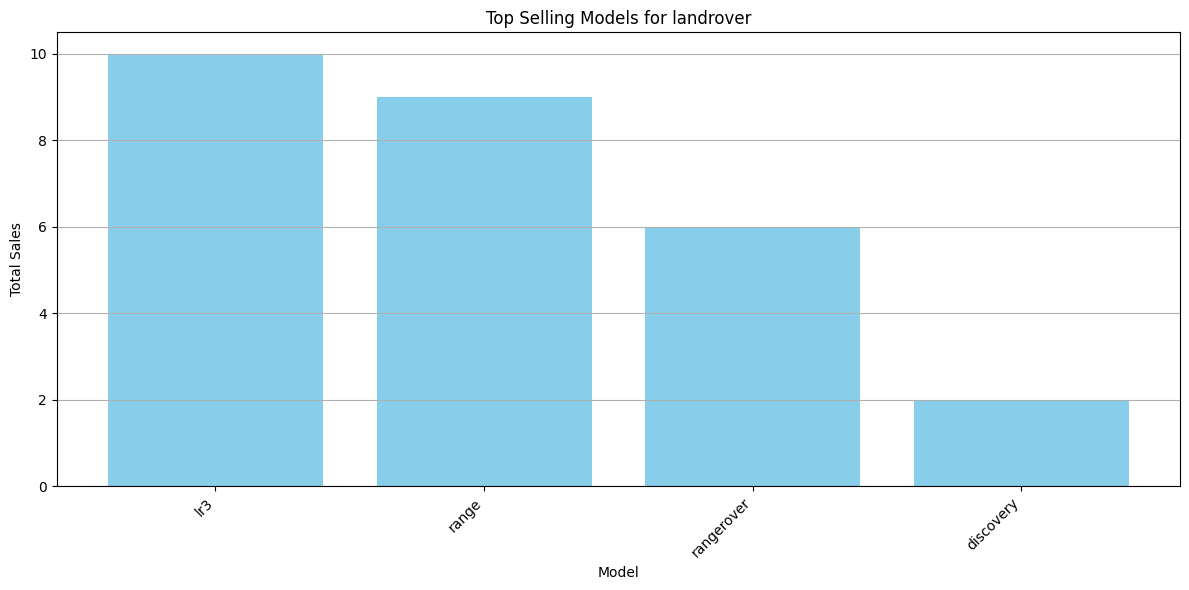

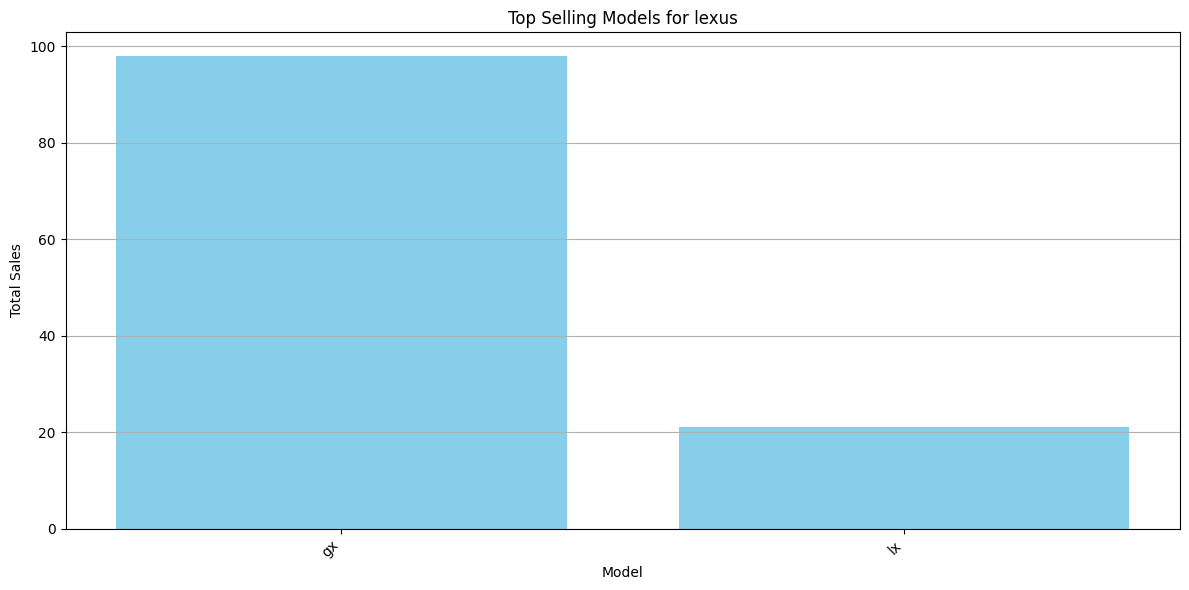

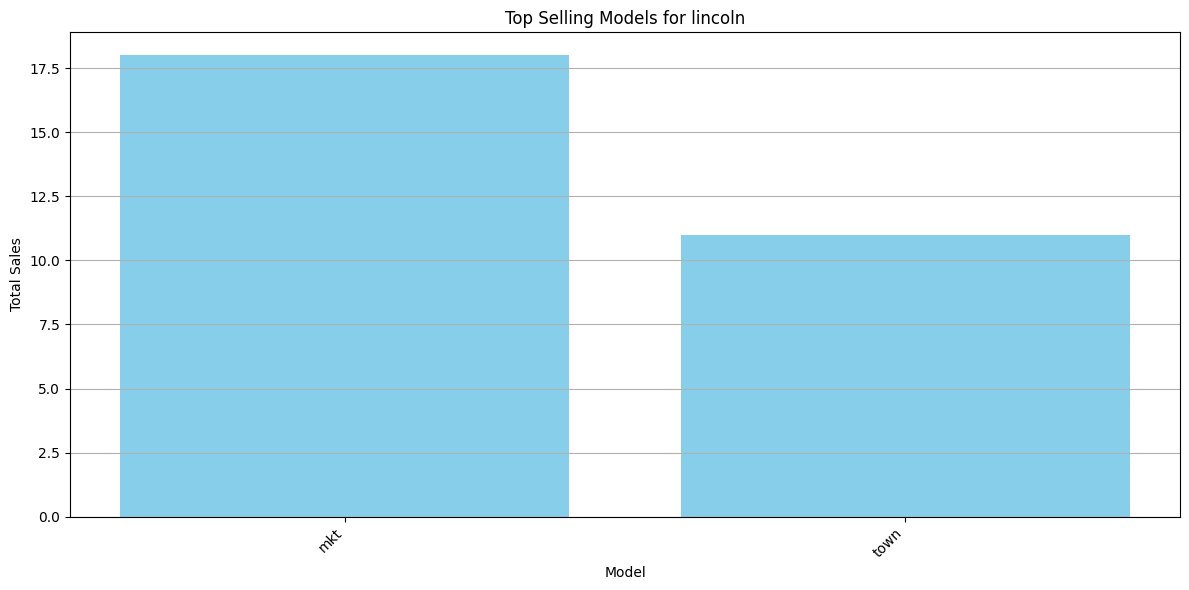

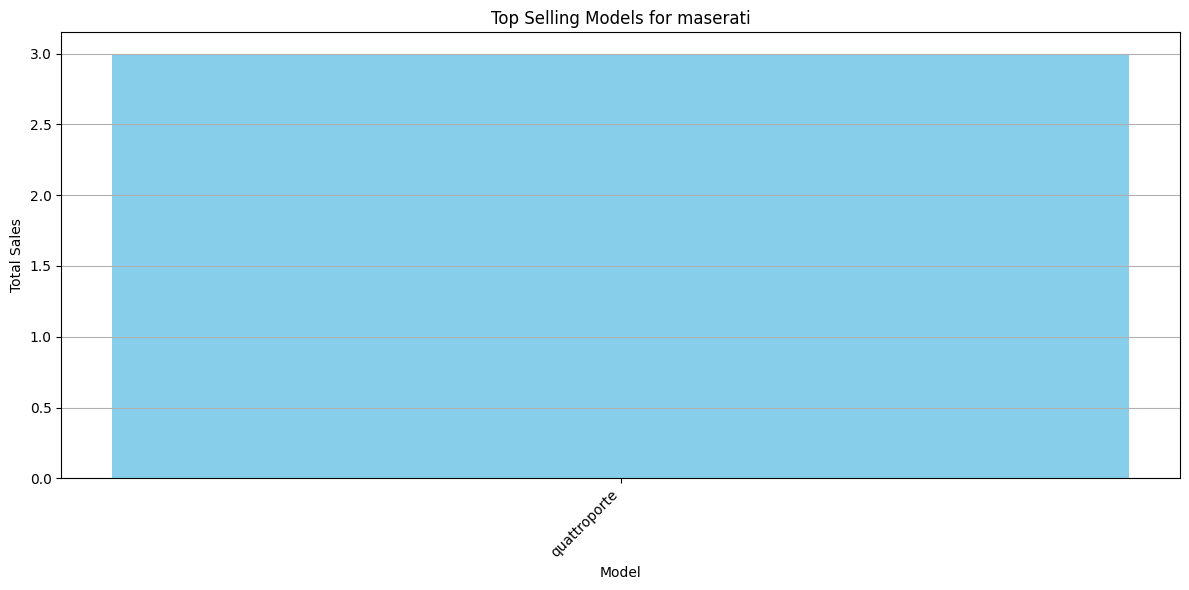

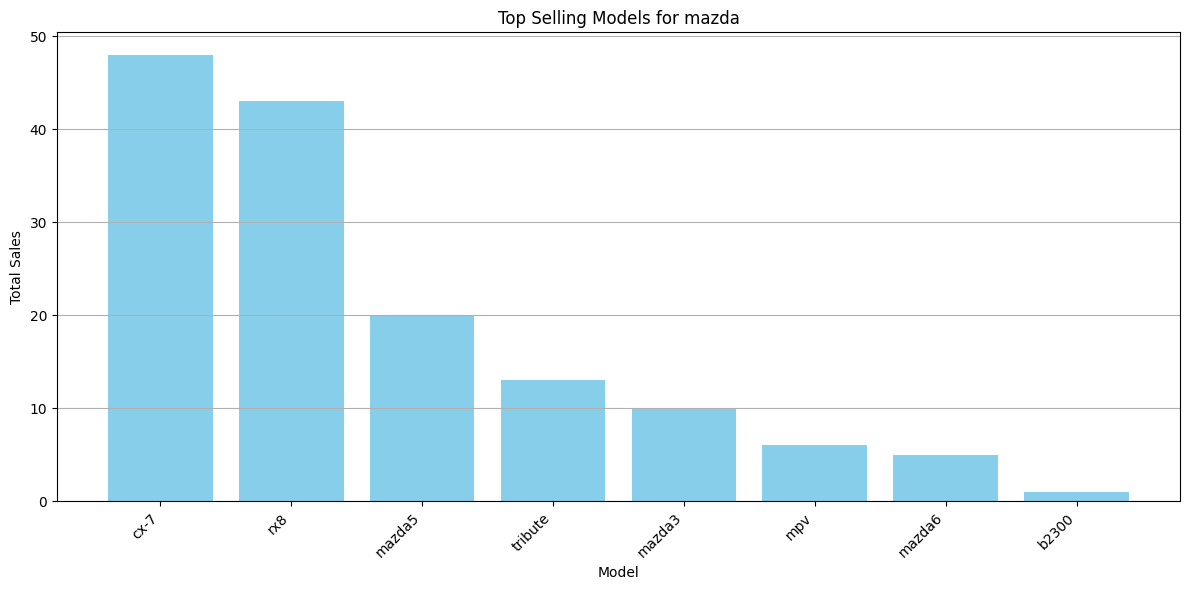

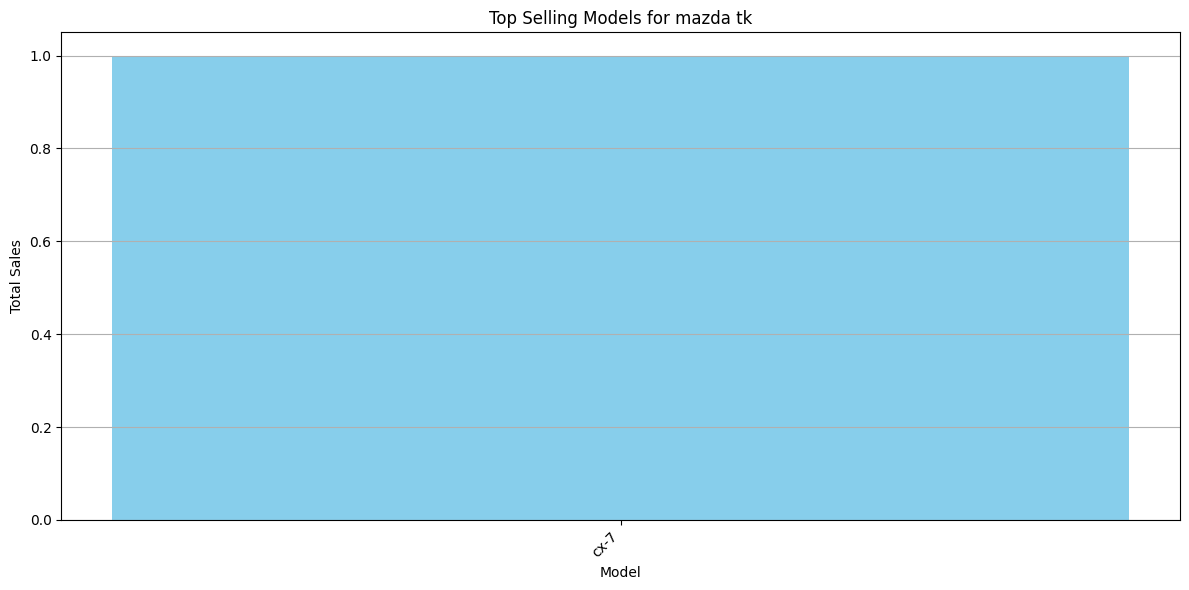

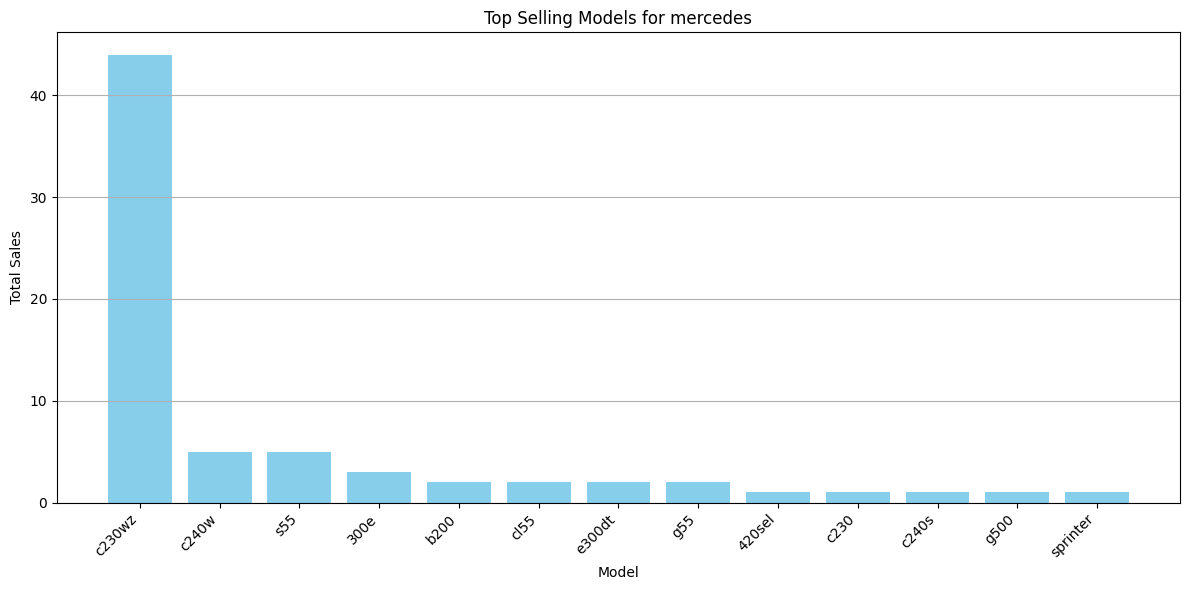

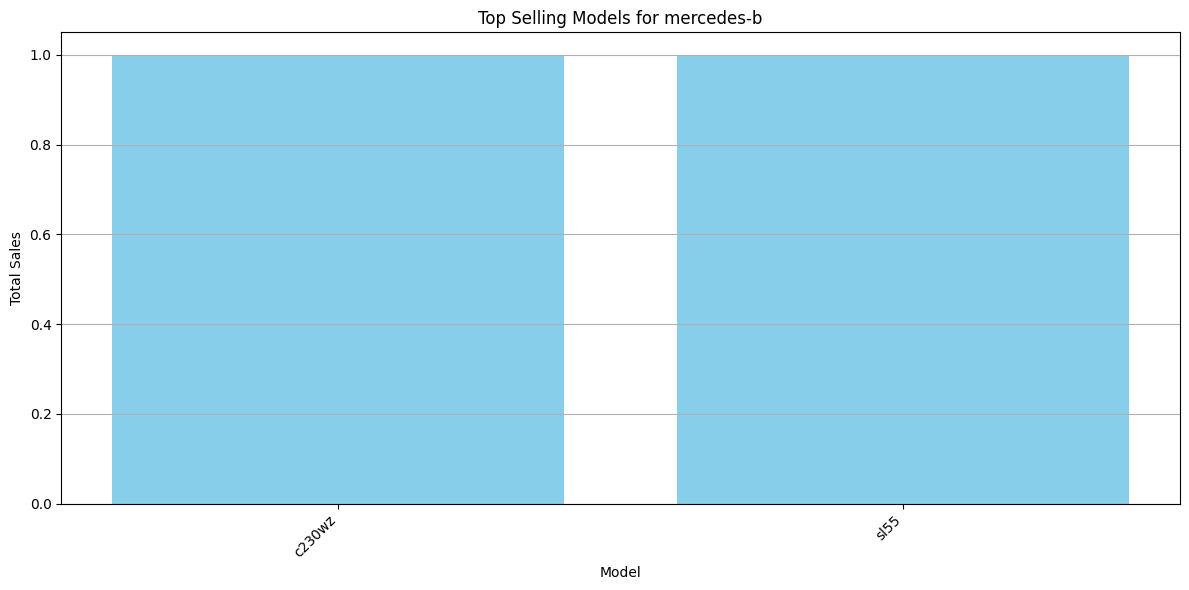

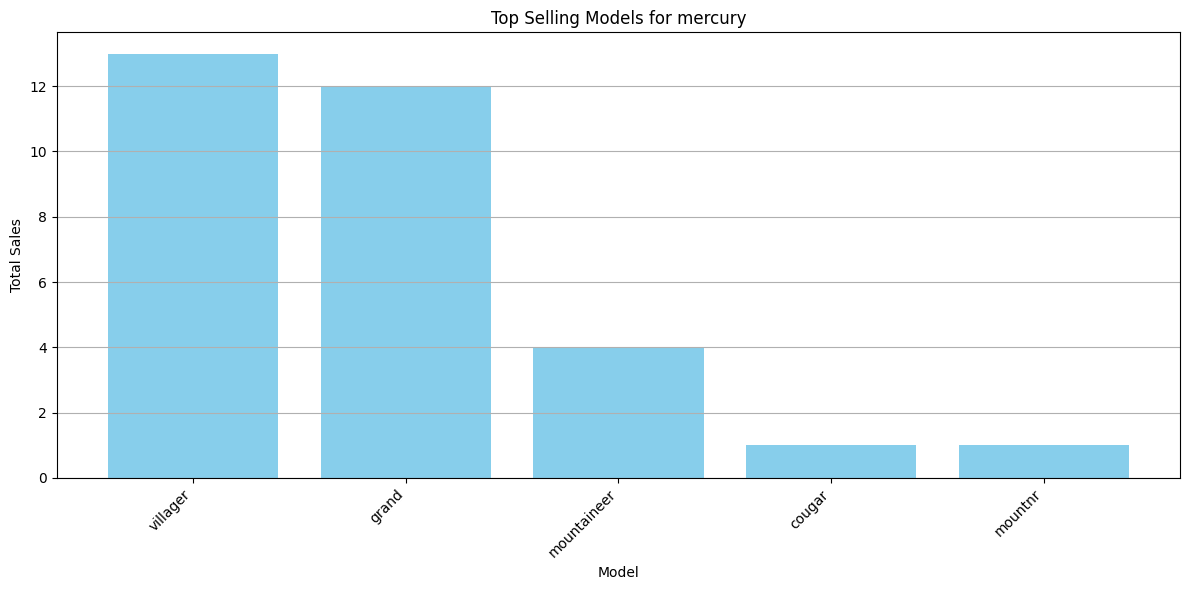

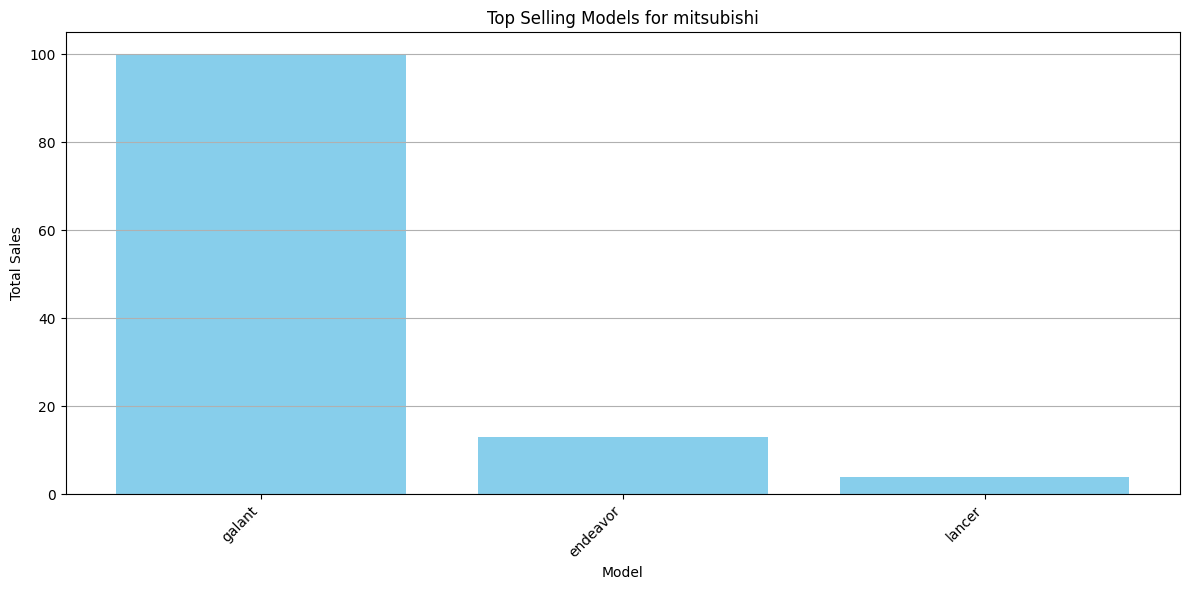

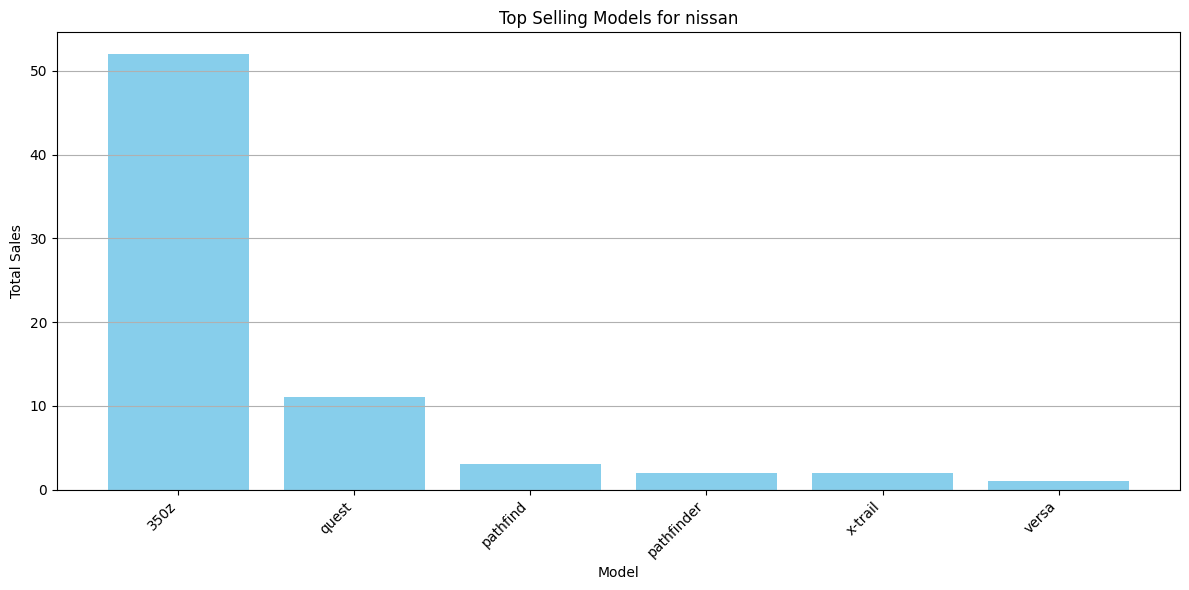

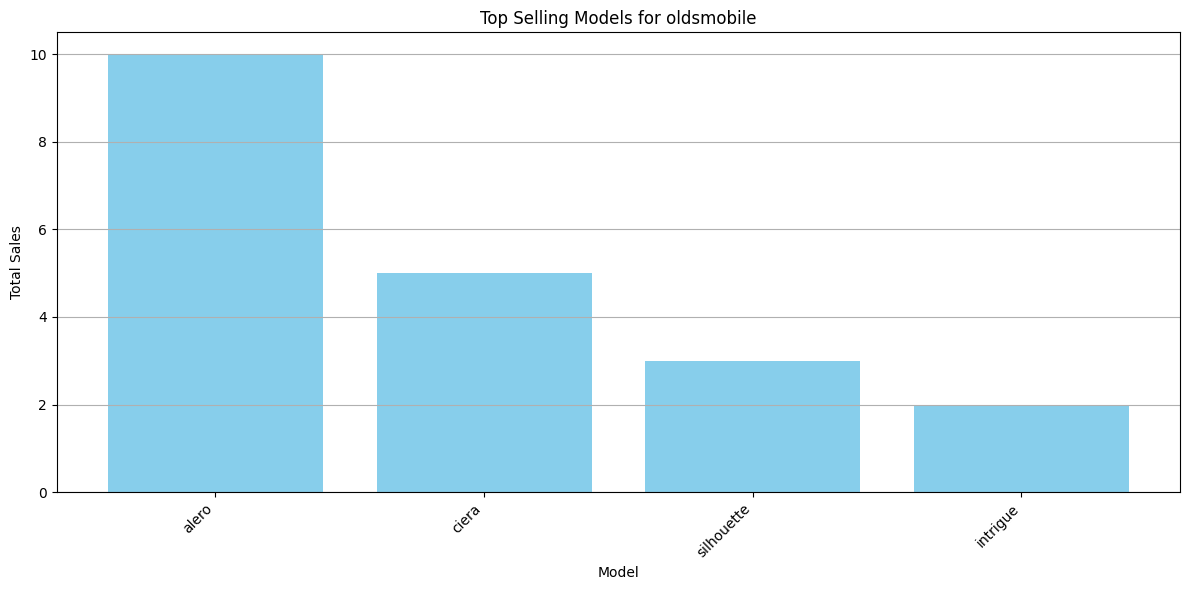

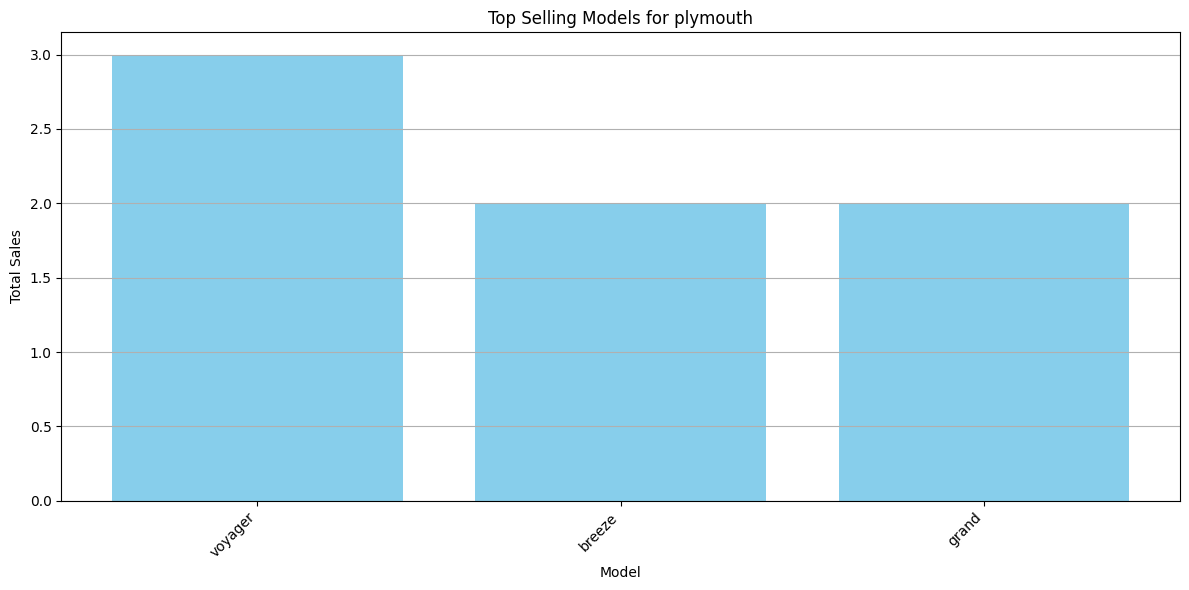

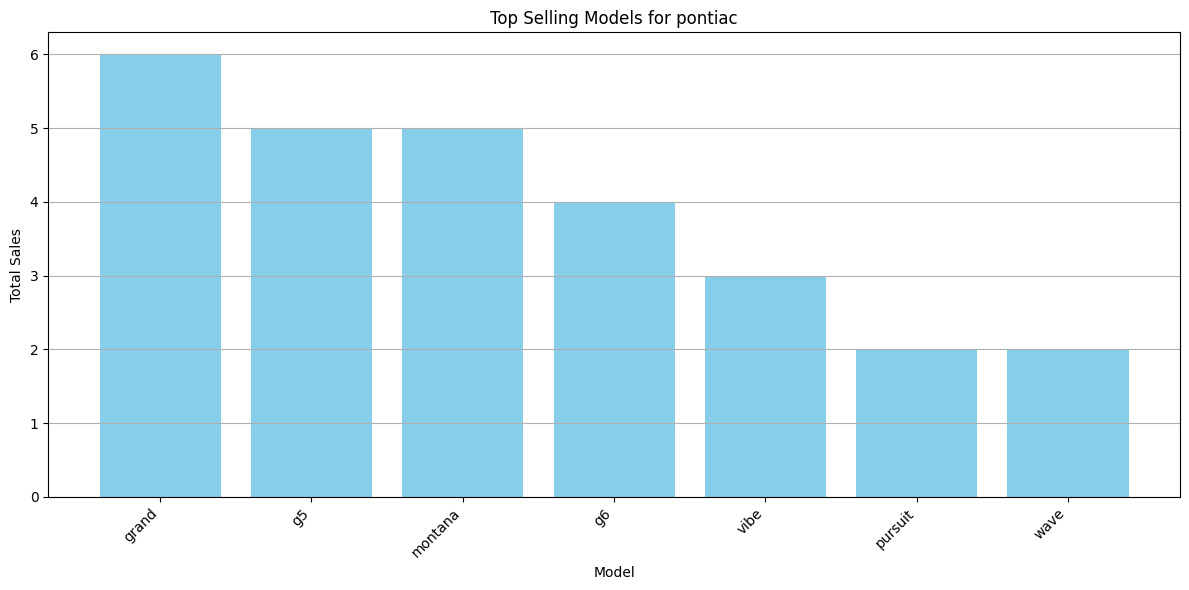

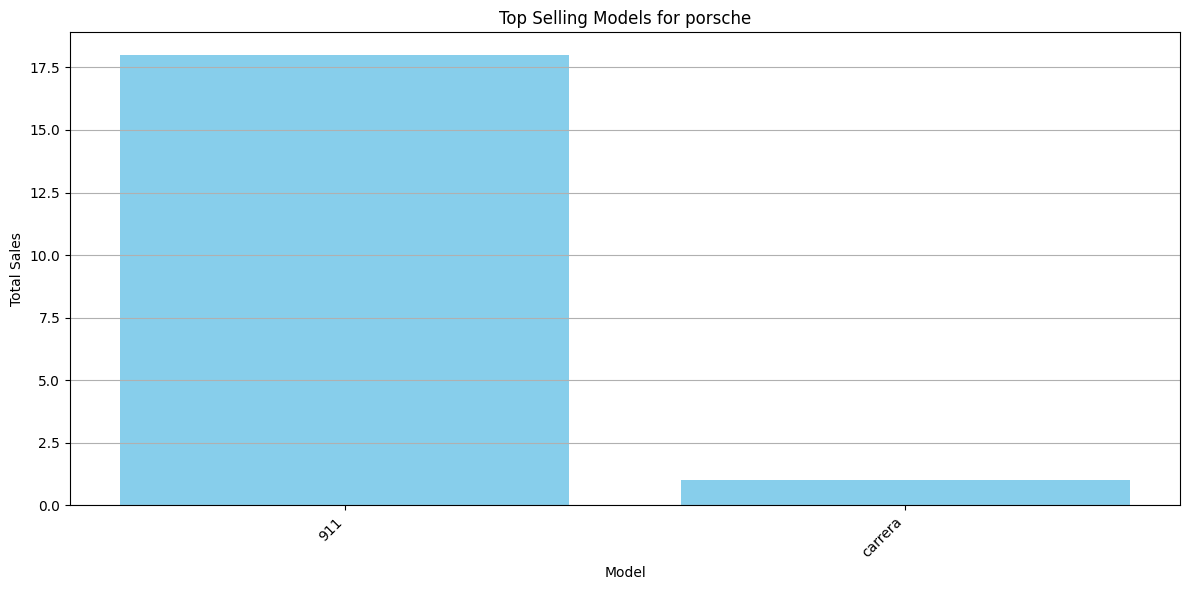

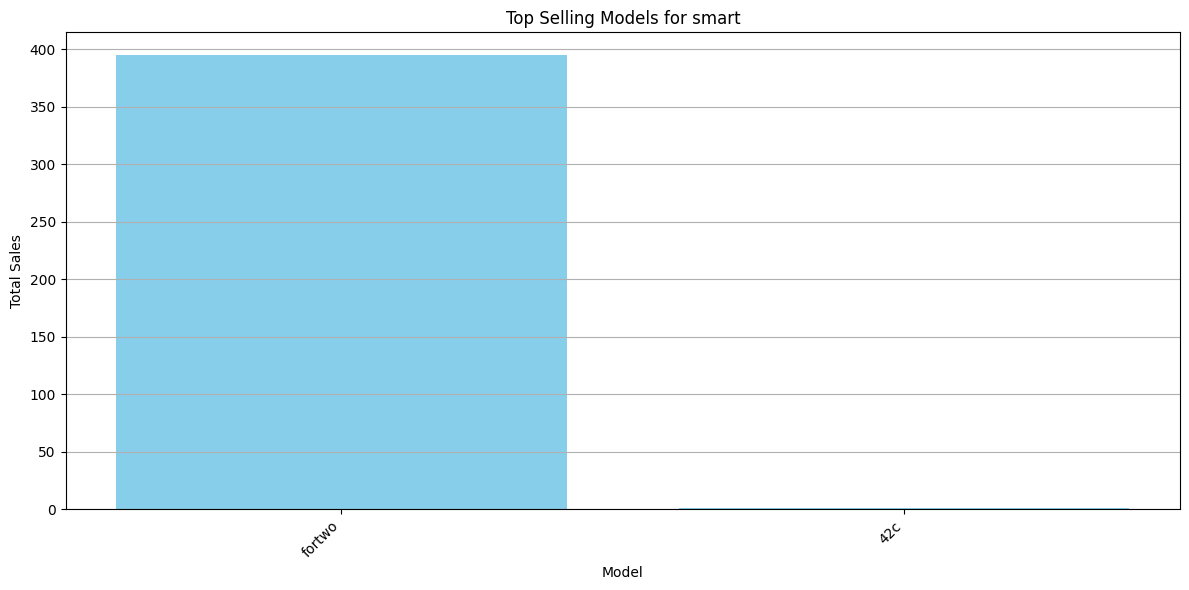

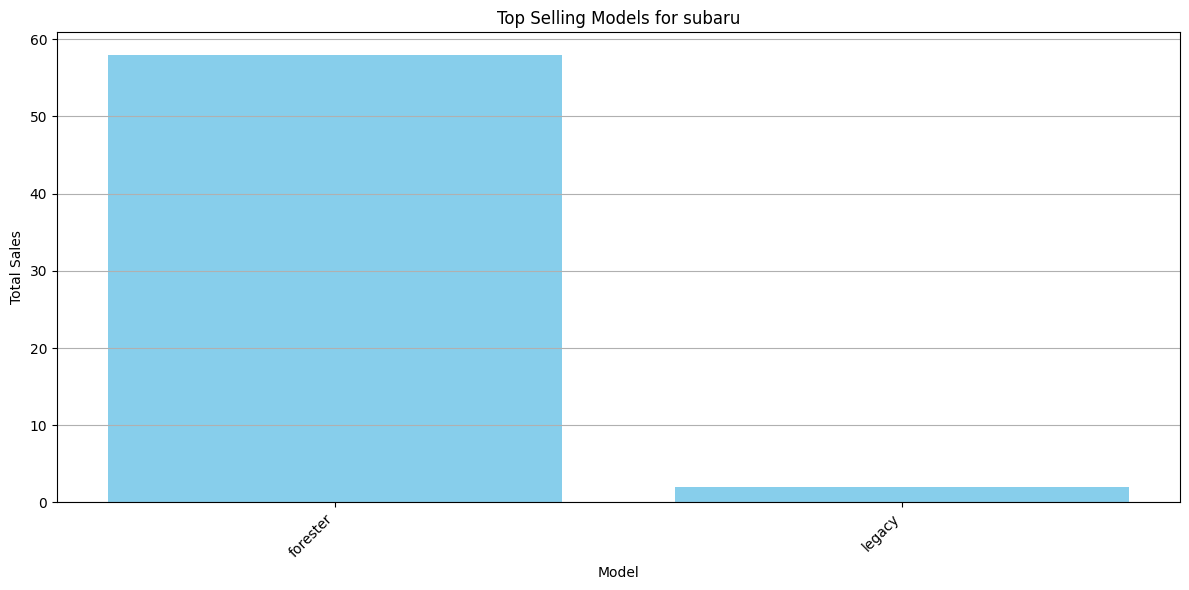

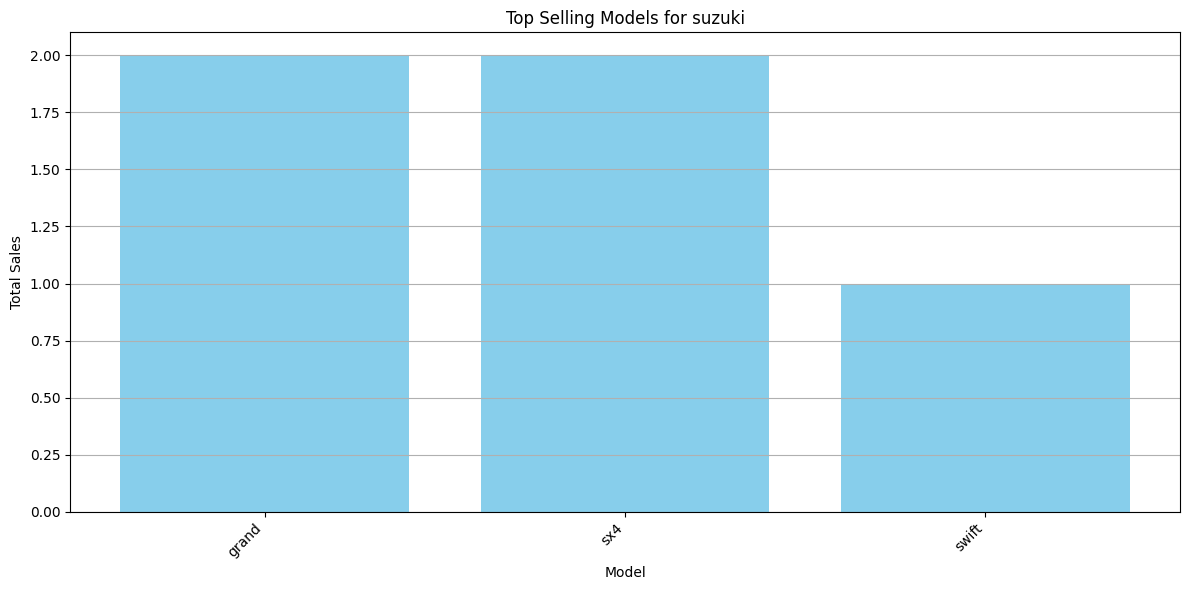

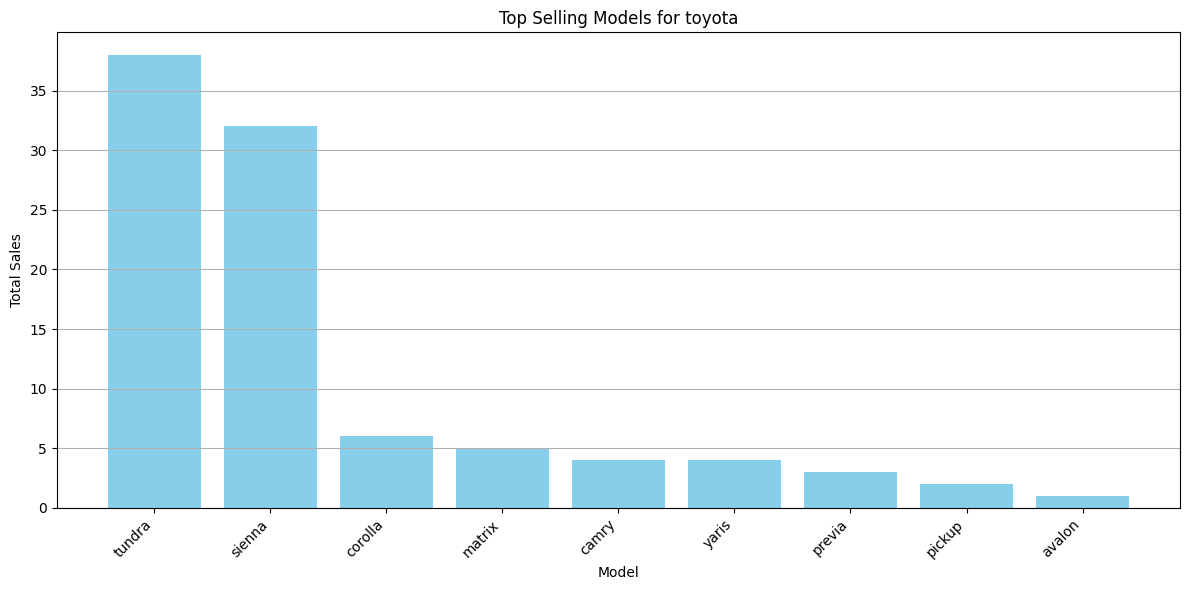

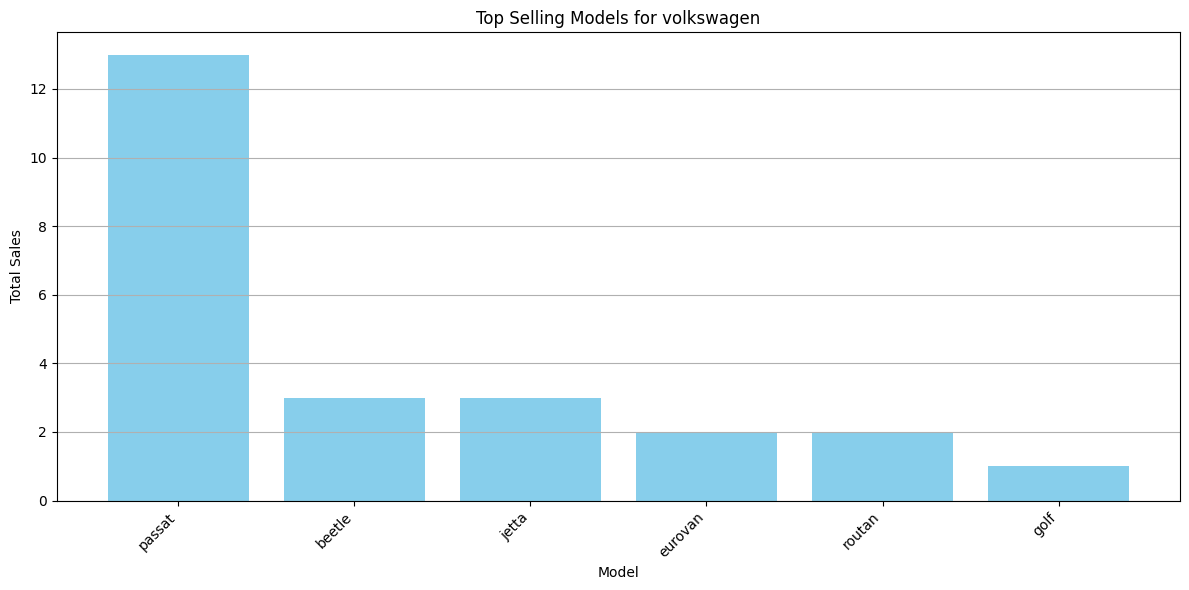

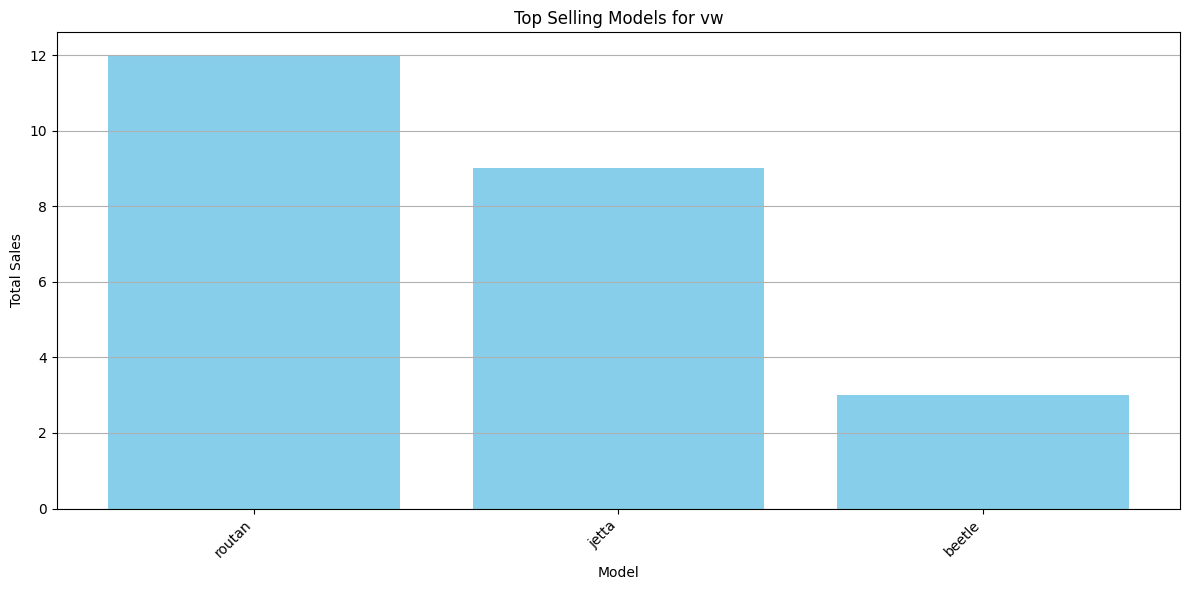

In [18]:
# Graph code for question-6

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by make and model, then count the total sales for each group
top_selling_models = df.groupby(['make', 'model']).size().reset_index(name='TotalSales')

# Sort the data by make and total sales in descending order
top_selling_models = top_selling_models.sort_values(by=['make', 'TotalSales'], ascending=[True, False])

# Get unique makes
unique_makes = top_selling_models['make'].unique()

# Plotting
for make in unique_makes:
    make_data = top_selling_models[top_selling_models['make'] == make]
    plt.figure(figsize=(12, 6))
    plt.bar(make_data['model'], make_data['TotalSales'], color='skyblue')
    plt.title(f'Top Selling Models for {make}')
    plt.xlabel('Model')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



In [19]:
# Question-7:  Identify the Top 5 States with the Highest Number of Vehicle Sales

import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by state and count the total vehicle sales for each state
vehicle_sales_by_state = df.groupby('state').size().reset_index(name='TotalSales')

# Sort the data by total sales in descending order
vehicle_sales_by_state = vehicle_sales_by_state.sort_values(by='TotalSales', ascending=False)

# Get the top 5 states
top_5_states = vehicle_sales_by_state.head(5)

# Print the top 5 states
print("Top 5 States with the Highest Number of Vehicle Sales:")
print(top_5_states)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

top_5_states.to_csv('Q7.csv', index=False)


Top 5 States with the Highest Number of Vehicle Sales:
   state  TotalSales
31    fl       82945
29    ca       73148
54    pa       53907
59    tx       45913
32    ga       34750
Start Time: 2024-04-24 20:34:20
End Time: 2024-04-24 20:34:26
Processing Time: 5.6885986328125 seconds


In [13]:
# Dictionary mapping state abbreviations to full names
import pandas as pd
import time

state_mapping = {
    'al': 'Alabama', 'ak': 'Alaska', 'az': 'Arizona', 'ar': 'Arkansas', 'ca': 'California',
    'co': 'Colorado', 'ct': 'Connecticut', 'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
    'hi': 'Hawaii', 'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana', 'ia': 'Iowa', 'ks': 'Kansas',
    'ky': 'Kentucky', 'la': 'Louisiana', 'me': 'Maine', 'md': 'Maryland', 'ma': 'Massachusetts',
    'mi': 'Michigan', 'mn': 'Minnesota', 'ms': 'Mississippi', 'mo': 'Missouri', 'mt': 'Montana',
    'ne': 'Nebraska', 'nv': 'Nevada', 'nh': 'New Hampshire', 'nj': 'New Jersey', 'nm': 'New Mexico',
    'ny': 'New York', 'nc': 'North Carolina', 'nd': 'North Dakota', 'oh': 'Ohio', 'ok': 'Oklahoma',
    'or': 'Oregon', 'pa': 'Pennsylvania', 'ri': 'Rhode Island', 'sc': 'South Carolina',
    'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas', 'ut': 'Utah', 'vt': 'Vermont',
    'va': 'Virginia', 'wa': 'Washington', 'wv': 'West Virginia', 'wi': 'Wisconsin', 'wy': 'Wyoming'
}

# Record start time
start_time = time.time()

# Read the data into a DataFrame
df = pd.read_csv('output.csv')

# Group the data by state and count the total vehicle sales for each state
vehicle_sales_by_state = df.groupby('state').size().reset_index(name='TotalSales')

# Convert state column to lowercase for case insensitivity
vehicle_sales_by_state['state'] = vehicle_sales_by_state['state'].str.lower()

# Sort the data by total sales in descending order
vehicle_sales_by_state = vehicle_sales_by_state.sort_values(by='TotalSales', ascending=False)

# Replace state abbreviations with full names
vehicle_sales_by_state['state'] = vehicle_sales_by_state['state'].map(state_mapping)

# Get the top 5 states
top_5_states = vehicle_sales_by_state.head(5)

# Print the top 5 states
print("Top 5 States with the Highest Number of Vehicle Sales:")
print(top_5_states)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

top_5_states.to_csv('Q7.csv', index=False)


Top 5 States with the Highest Number of Vehicle Sales:
           state  TotalSales
31       Florida       82945
29    California       73148
54  Pennsylvania       53907
59         Texas       45913
32       Georgia       34750
Start Time: 2024-04-24 14:54:49
End Time: 2024-04-24 14:54:53
Processing Time: 3.996584177017212 seconds


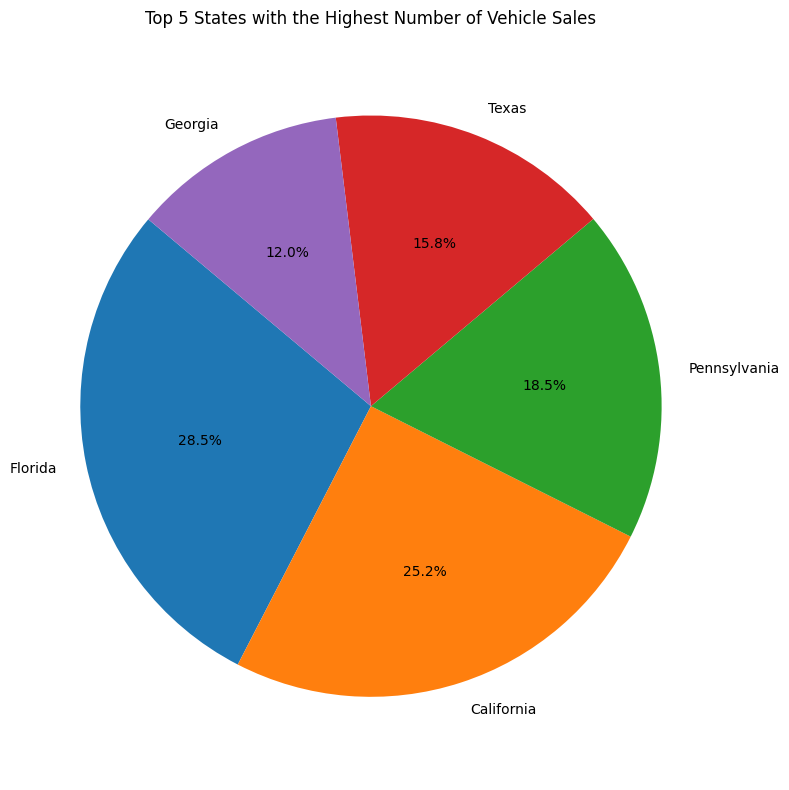

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by state and count the total vehicle sales for each state
vehicle_sales_by_state = df.groupby('state').size().reset_index(name='TotalSales')

# Sort the data by total sales in descending order
vehicle_sales_by_state = vehicle_sales_by_state.sort_values(by='TotalSales', ascending=False)

# Get the top 5 states
top_5_states = vehicle_sales_by_state.head(5)

# Mapping of state abbreviations to full names
state_mapping = {
    'ca': 'California',
    'tx': 'Texas',
    'fl': 'Florida',
    'ga': 'Georgia',
    'pa': 'Pennsylvania'
}

# Replace state abbreviations with full names
top_5_states_copy = top_5_states.copy()  # Create a copy of the DataFrame slice
top_5_states_copy['state'] = top_5_states_copy['state'].map(state_mapping)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(top_5_states_copy['TotalSales'], labels=top_5_states_copy['state'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 States with the Highest Number of Vehicle Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [25]:
# Question-8: Identify the Average MMR Value by Make and Model.

import pandas as pd
import time

# Record start time
start_time = time.time()

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by make and calculate the average MMR value for each make
average_mmr_by_make = df.groupby('make')['mmr'].mean()

# Convert the Series to a DataFrame, reset the index, and rename the columns
average_mmr_by_make_df = average_mmr_by_make.reset_index()
average_mmr_by_make_df.columns = ['Make', 'AvgMMR']
print(average_mmr_by_make_df)

# Record end time
end_time = time.time()

# Calculate processing time
processing_time = end_time - start_time

print("Start Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time)))
print("End Time:", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time)))
print("Processing Time:", processing_time, "seconds")

# Write the output to a CSV file
average_mmr_by_make_df.to_csv('Q8.csv', index=False)



            Make        AvgMMR
0          Acura  14076.813252
1   Aston Martin  53560.000000
2           Audi  20080.213835
3            BMW  21575.547806
4        Bentley  75928.448276
..           ...           ...
91        subaru   3911.666667
92        suzuki   4805.000000
93        toyota   7367.631579
94    volkswagen   5984.375000
95            vw  13847.916667

[96 rows x 2 columns]
Start Time: 2024-04-24 20:41:51
End Time: 2024-04-24 20:41:57
Processing Time: 5.195480108261108 seconds


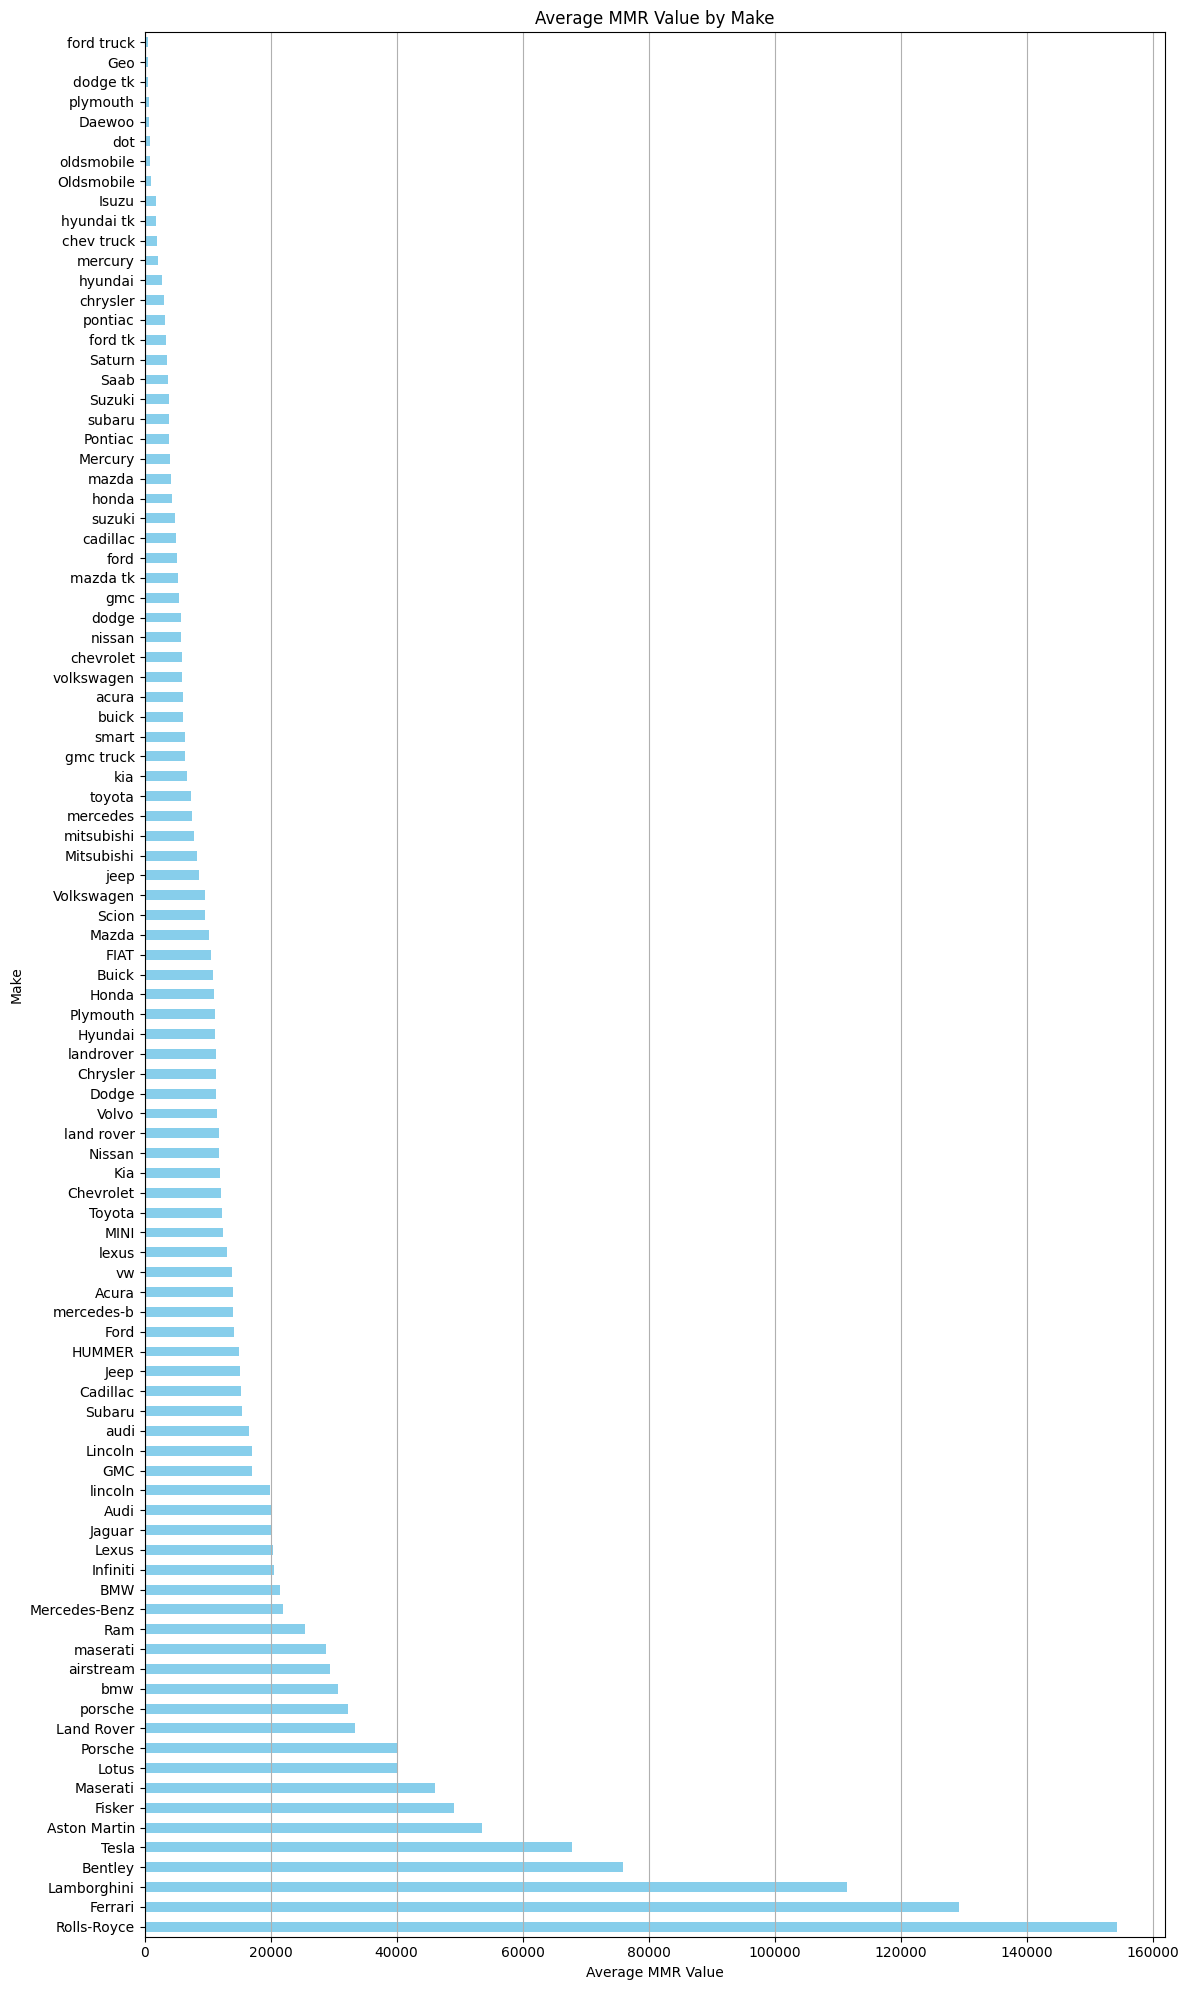

In [24]:
# Graph Code for Question-8

import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
# Replace 'output.csv' with the actual path to your data file
df = pd.read_csv('output.csv')

# Group the data by make and calculate the average MMR value for each make
average_mmr_by_make = df.groupby('make')['mmr'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 20))
average_mmr_by_make.plot(kind='barh', color='skyblue')  # Change kind to 'barh' for horizontal bar plot
plt.title('Average MMR Value by Make')
plt.xlabel('Average MMR Value')
plt.ylabel('Make')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
